# **EDA**

In [611]:
import pandas as pd

## Dataset Overview

In [612]:
df = pd.read_csv("train_storming_round.csv")
df.head()

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   455ca878         45         2/1/2021                9/1/2023   
1       2   c823ce77         48         4/1/2022                2/1/2024   
2       3   62154055         53         5/1/2020                9/1/2023   
3       4   c58bfa6e         44         7/1/2019                3/1/2022   
4       5   b1e5f770         20         9/1/2020                2/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   1/1/2023                             3                              6   
1   1/1/2023                             1                              4   
2   1/1/2023                             3                              5   
3   1/1/2023                             1                              0   
4   1/1/2023                             0                              6   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                              2               12  ...                  9   
1                             12               21  ...                 14   
2                              5               17  ...                 14   
3                             12               17  ...                 11   
4                             10               17  ...                 13   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             3                              4   
1                             4                              3   
2                             3                              7   
3                             2                              2   
4                             3                             10   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              8                15                 0   
1                             10                17                25   
2                             11                21                26   
3                              9                13                18   
4                              6                19                20   

   ANBP_value  net_income  number_of_policy_holders  \
0           0       93313                        30   
1     1071450      164804                         0   
2     1601210      426690                        84   
3      283230       47793                        39   
4     1957680      562239                        19   

   number_of_cash_payment_policies  
0                              162  
1                              175  
2                               78  
3                              144  
4                               40  

[5 rows x 23 columns]

In [613]:
df.describe(include="all")

row_id agent_code     agent_age agent_join_month  \
count   15308.000000      15308  15308.000000            15308   
unique           NaN        905           NaN               64   
top              NaN   e97ec0e0           NaN         5/1/2019   
freq             NaN         20           NaN              520   
mean     7654.500000        NaN     40.585772              NaN   
std      4419.183296        NaN     11.688204              NaN   
min         1.000000        NaN     20.000000              NaN   
25%      3827.750000        NaN     31.000000              NaN   
50%      7654.500000        NaN     41.000000              NaN   
75%     11481.250000        NaN     51.000000              NaN   
max     15308.000000        NaN     60.000000              NaN   

       first_policy_sold_month year_month  unique_proposals_last_7_days  \
count                    15308      15308                  15308.000000   
unique                      28         20                           NaN   
top                   4/1/2024   8/1/2024                           NaN   
freq                      1305        905                           NaN   
mean                       NaN        NaN                      1.491246   
std                        NaN        NaN                      1.119554   
min                        NaN        NaN                      0.000000   
25%                        NaN        NaN                      0.000000   
50%                        NaN        NaN                      1.000000   
75%                        NaN        NaN                      2.000000   
max                        NaN        NaN                      3.000000   

        unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                    15308.000000                   15308.000000   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean                         2.991116                      10.045728   
std                          2.001613                       6.037296   
min                          0.000000                       0.000000   
25%                          1.000000                       5.000000   
50%                          3.000000                      10.000000   
75%                          5.000000                      15.000000   
max                          6.000000                      20.000000   

        unique_proposal  ...  unique_quotations  unique_customers_last_7_days  \
count      15308.000000  ...       15308.000000                  15308.000000   
unique              NaN  ...                NaN                           NaN   
top                 NaN  ...                NaN                           NaN   
freq                NaN  ...                NaN                           NaN   
mean          17.516527  ...          13.922394                      2.995493   
std            6.616954  ...           4.663777                      1.644117   
min            1.000000  ...           1.000000                      0.000000   
25%           12.000000  ...          11.000000                      2.000000   
50%           17.000000  ...          14.000000                      3.000000   
75%           23.000000  ...          17.000000                      4.000000   
max           34.000000  ...          32.000000                      6.000000   

        unique_customers_last_15_days  unique_customers_last_21_days  \
count                    15308.000000                   15308.000000   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean                         4.997714                       7.500523   
std                          2.438918             

In [614]:
df.dtypes

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

### Data cleaning - datetime

In [615]:
date_columns = ['agent_join_month', 'first_policy_sold_month', 'year_month']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='mixed', dayfirst=False, errors='coerce')

df['year_month'].value_counts()

year_month
2024-08-01    905
2024-07-01    892
2024-06-01    871
2024-05-01    851
2024-04-01    842
2024-03-01    822
2024-02-01    806
2024-01-01    792
2023-12-01    775
2023-11-01    763
2023-10-01    755
2023-09-01    745
2023-08-01    730
2023-07-01    716
2023-06-01    699
2023-05-01    688
2023-04-01    677
2023-03-01    670
2023-02-01    659
2023-01-01    650
Name: count, dtype: int64

In [616]:
df.shape

(15308, 23)

In [617]:
df.dtypes

row_id                                      int64
agent_code                                 object
agent_age                                   int64
agent_join_month                   datetime64[ns]
first_policy_sold_month            datetime64[ns]
year_month                         datetime64[ns]
unique_proposals_last_7_days                int64
unique_proposals_last_15_days               int64
unique_proposals_last_21_days               int64
unique_proposal                             int64
unique_quotations_last_7_days               int64
unique_quotations_last_15_days              int64
unique_quotations_last_21_days              int64
unique_quotations                           int64
unique_customers_last_7_days                int64
unique_customers_last_15_days               int64
unique_customers_last_21_days               int64
unique_customers                            int64
new_policy_count                            int64
ANBP_value                                  int64
net_income                                  int64
number_of_policy_holders                    int64
number_of_cash_payment_policies             int64
dtype: object

## Data exploration


In [618]:
import matplotlib.pyplot as plt
import seaborn as sns

### Destribution of all the features

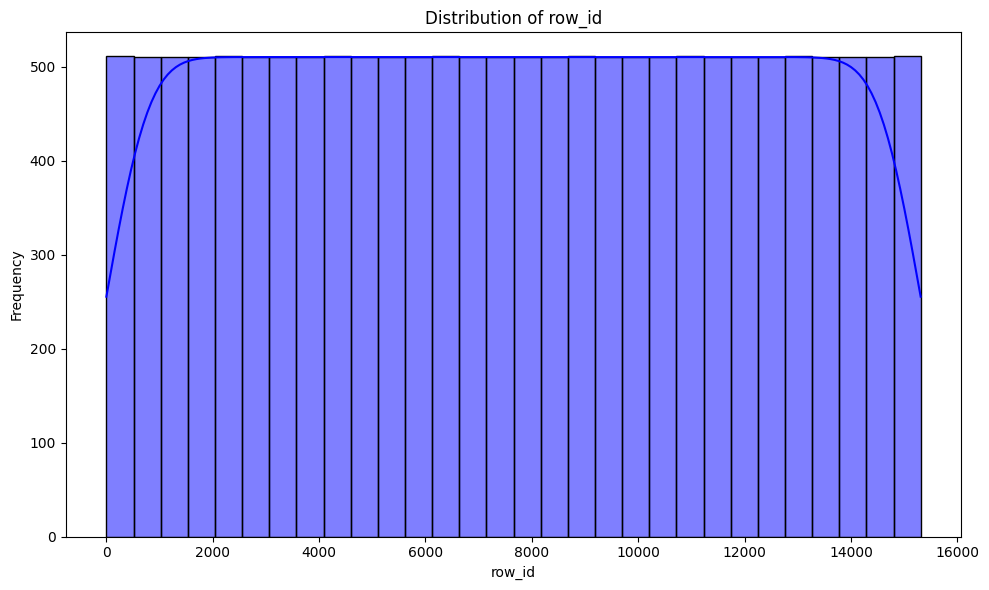

<ipython-input-619-4319bbd06180>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, palette='Set2', order=df[column].value_counts().index)


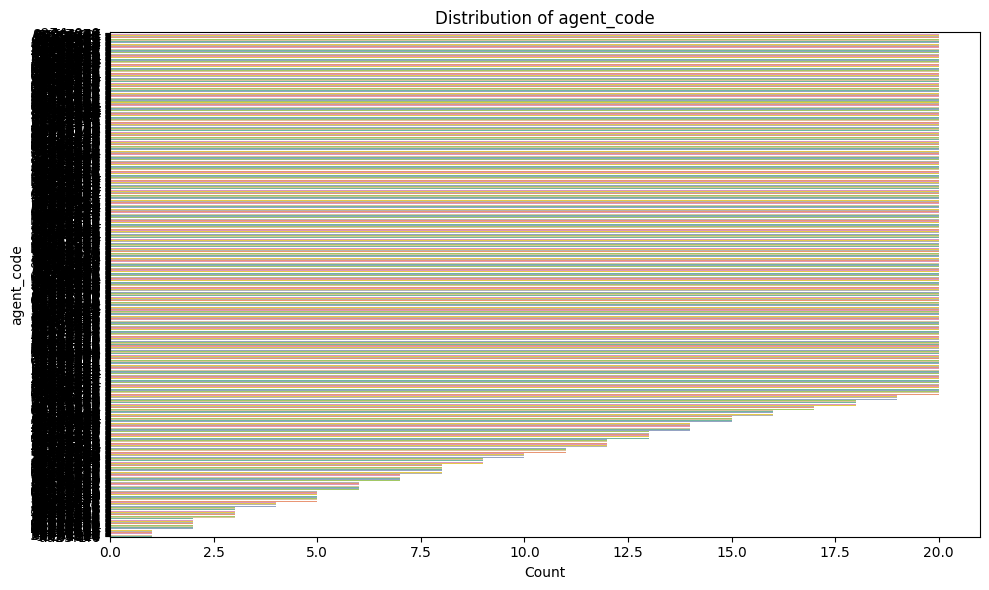

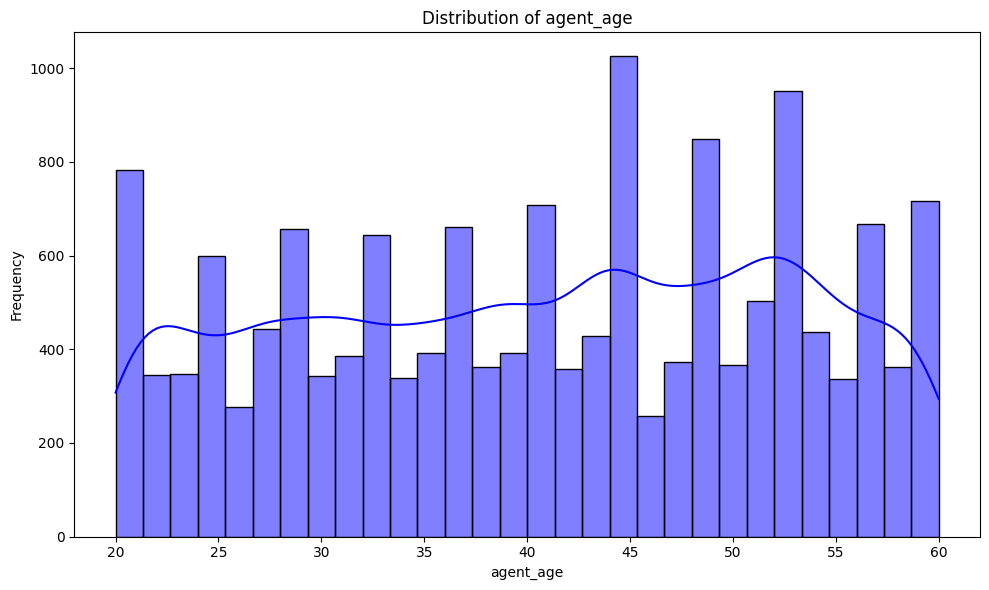

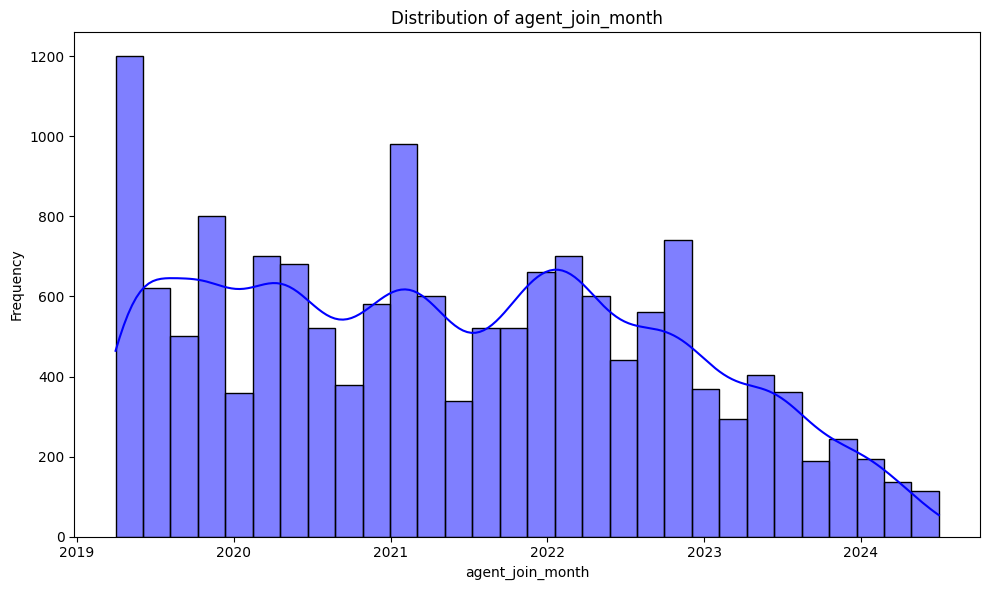

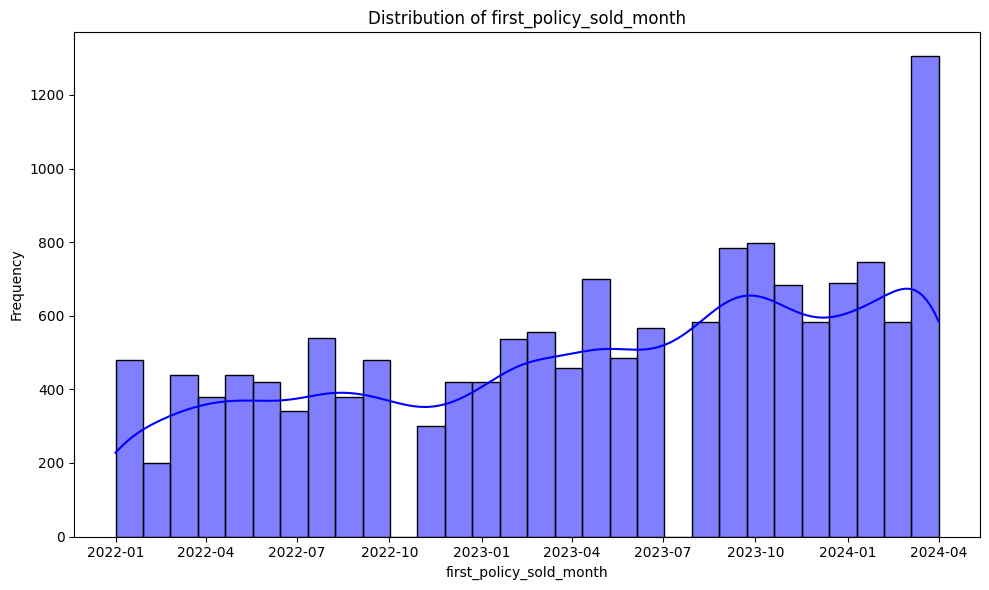

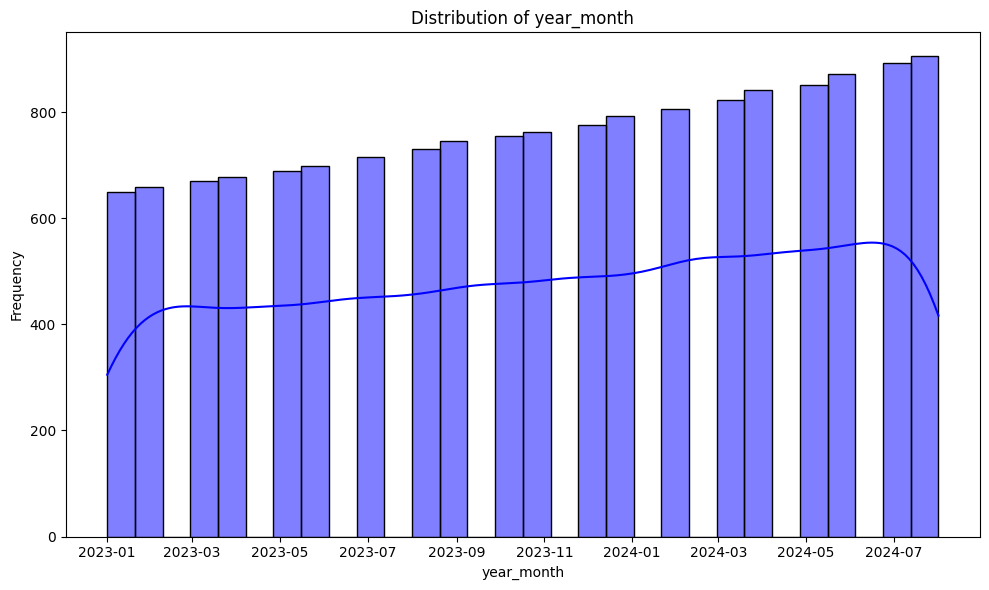

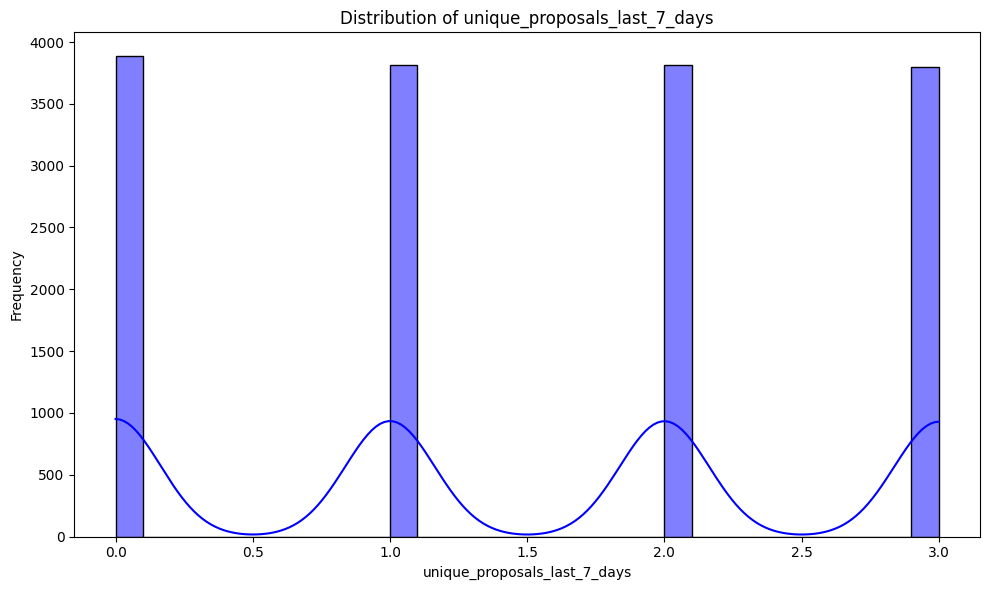

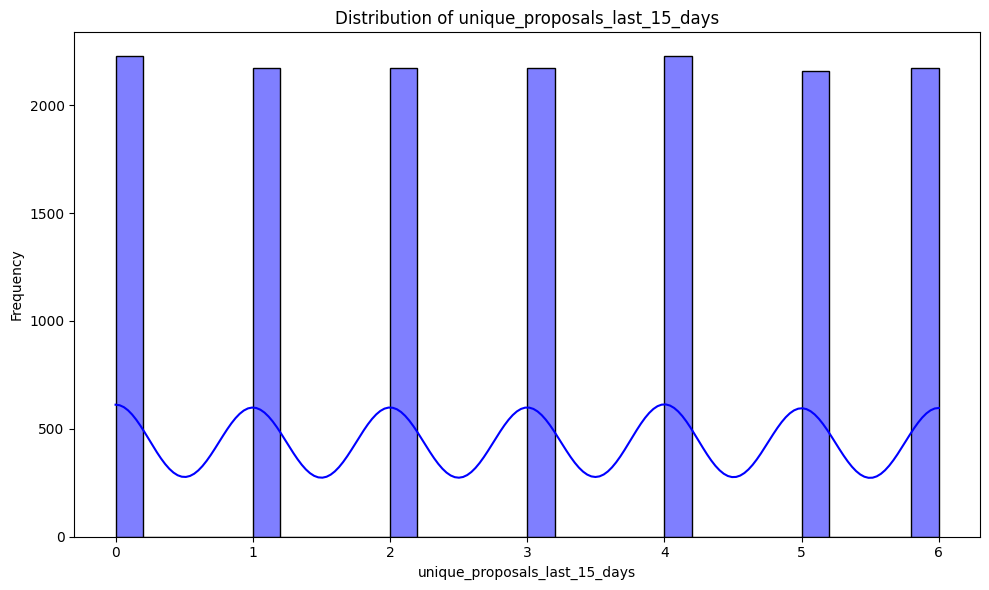

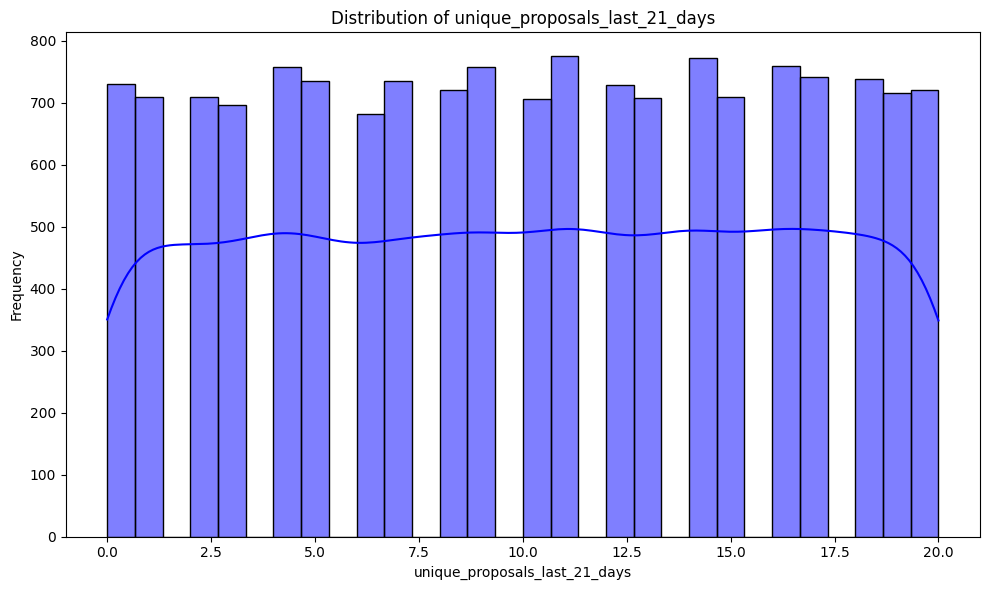

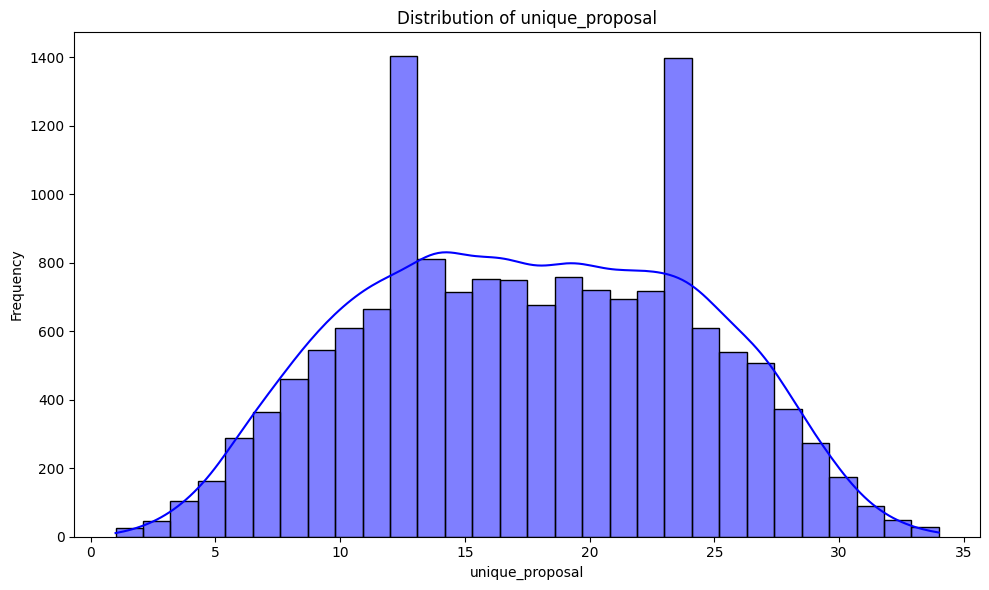

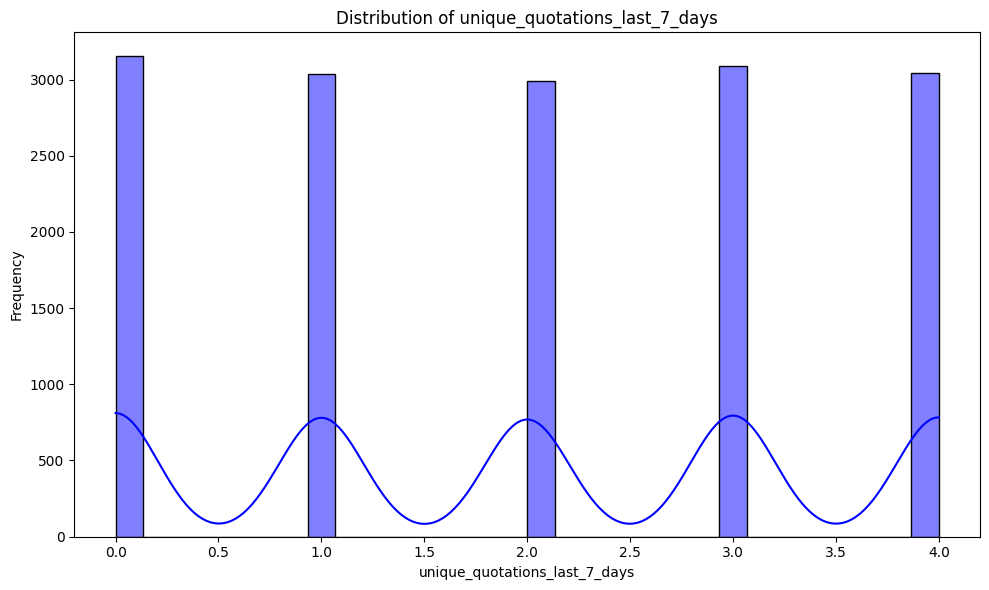

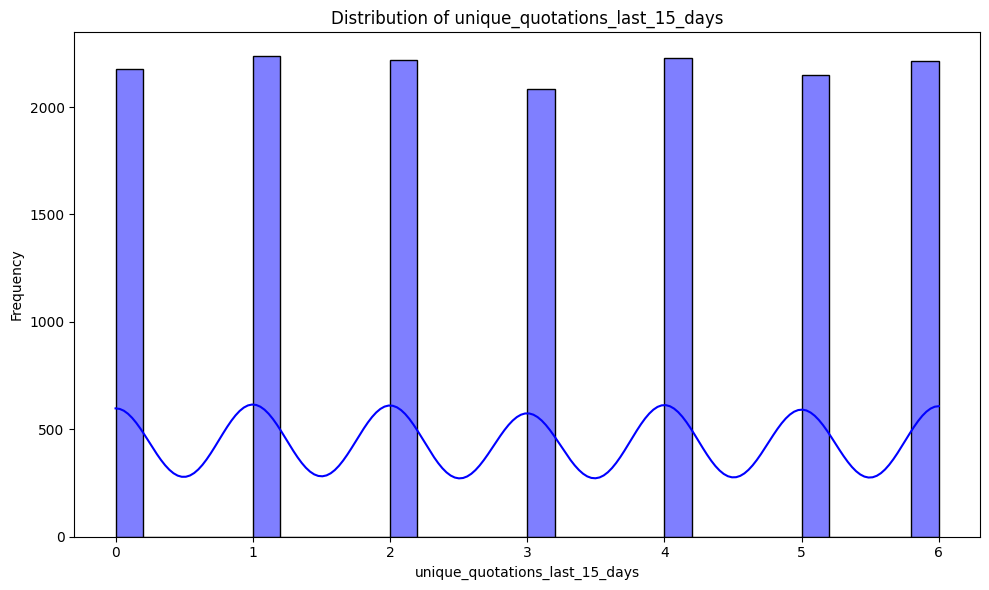

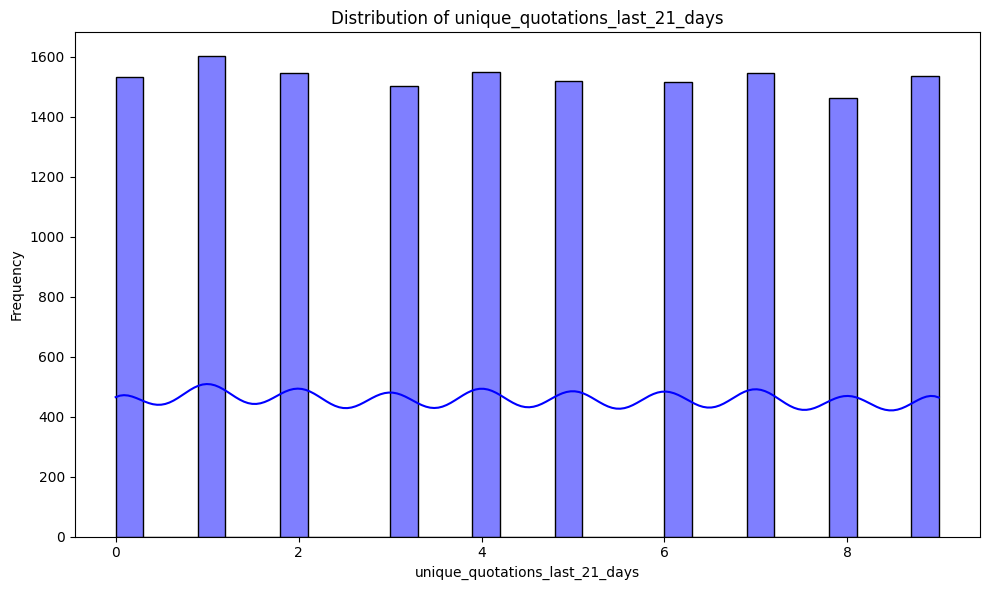

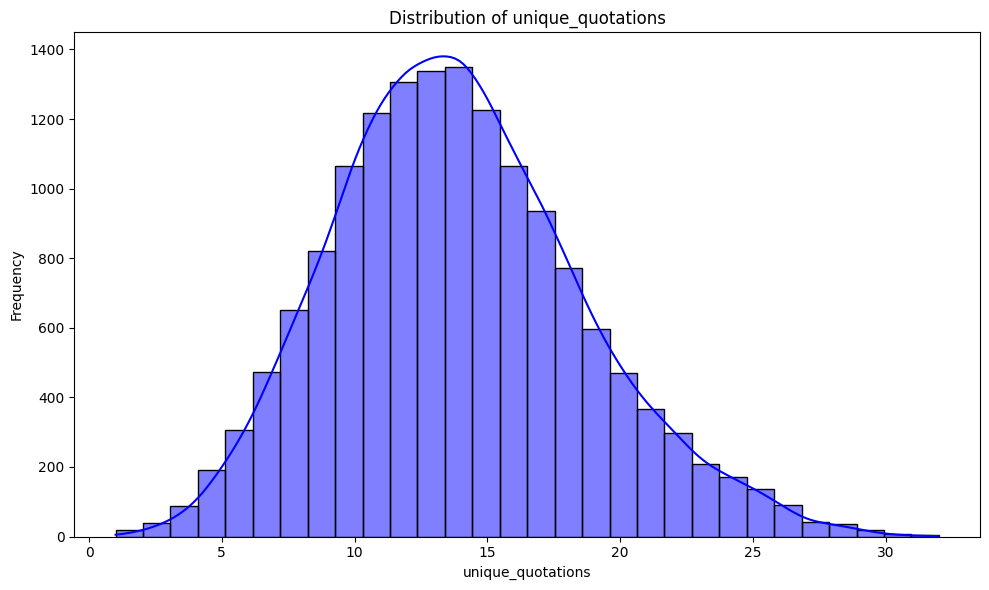

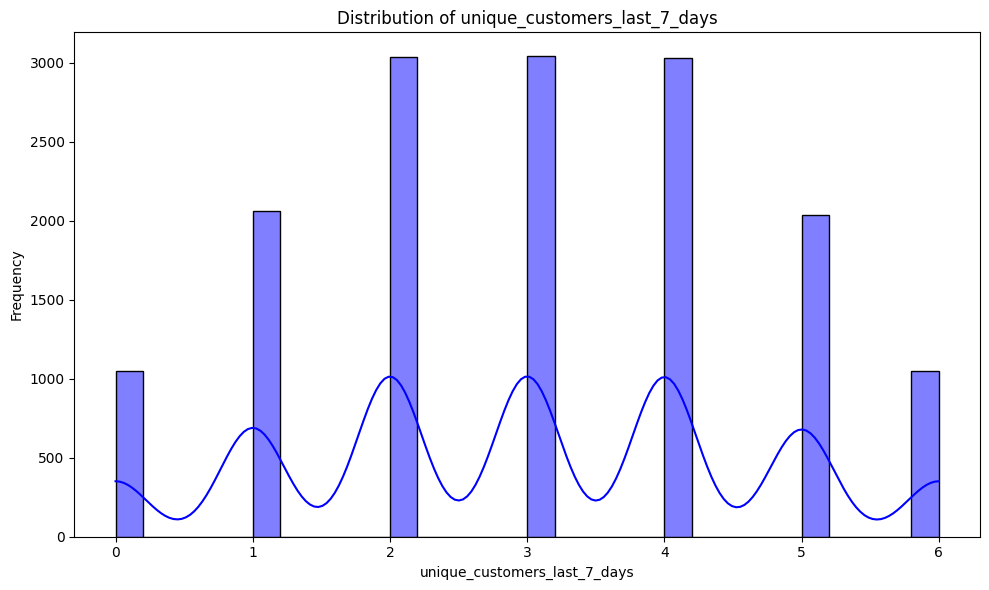

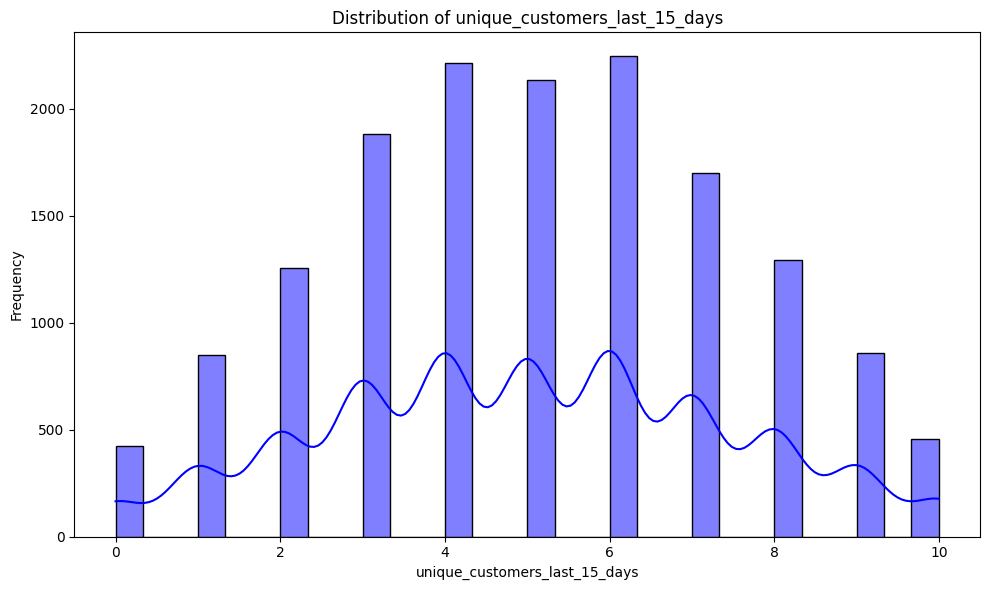

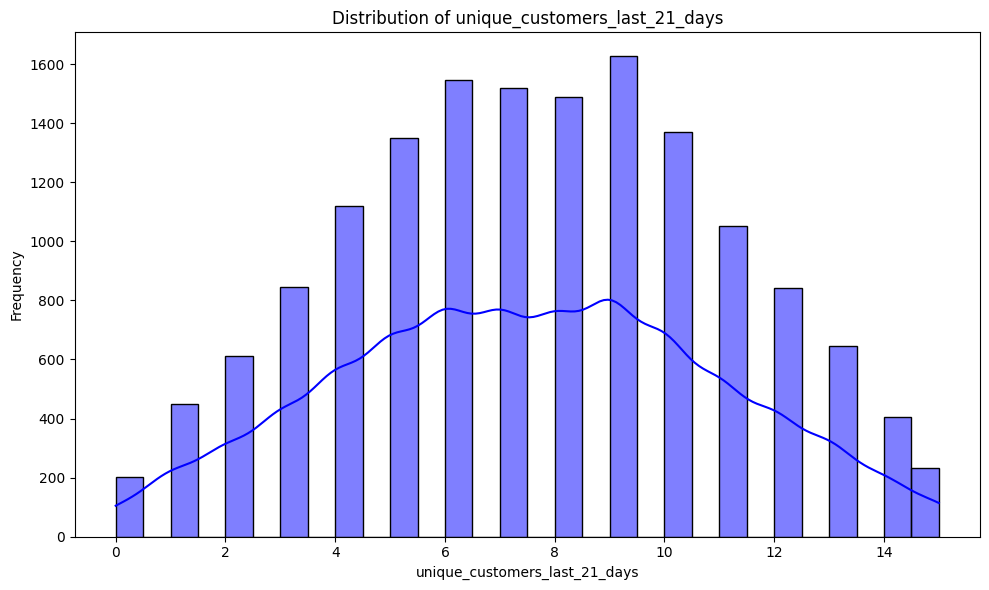

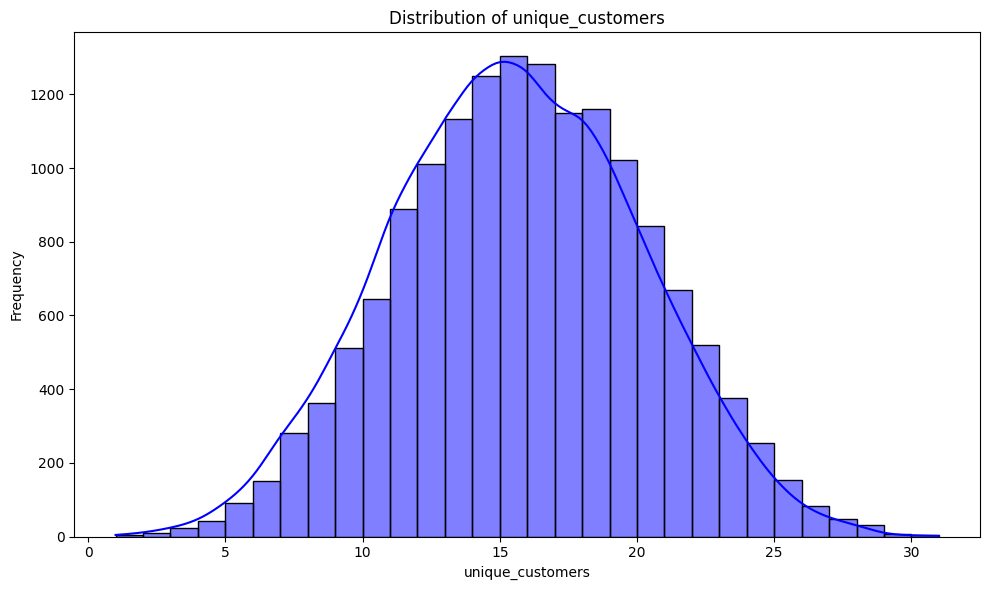

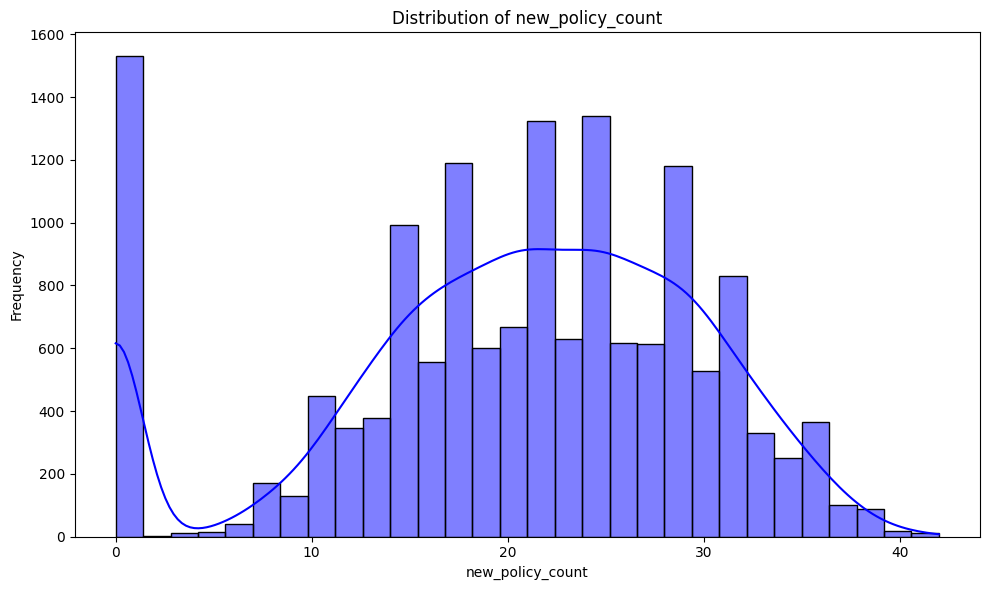

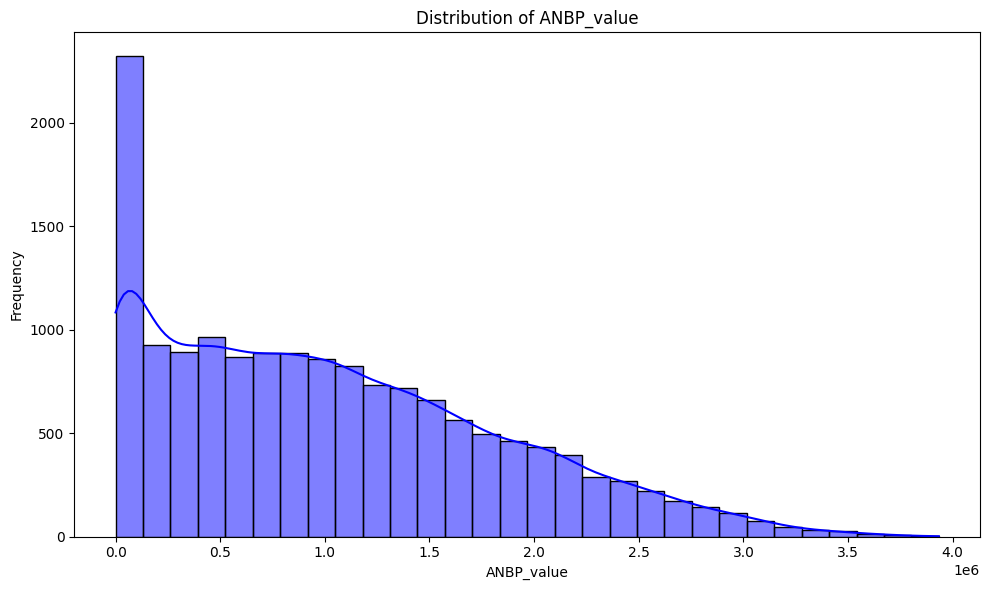

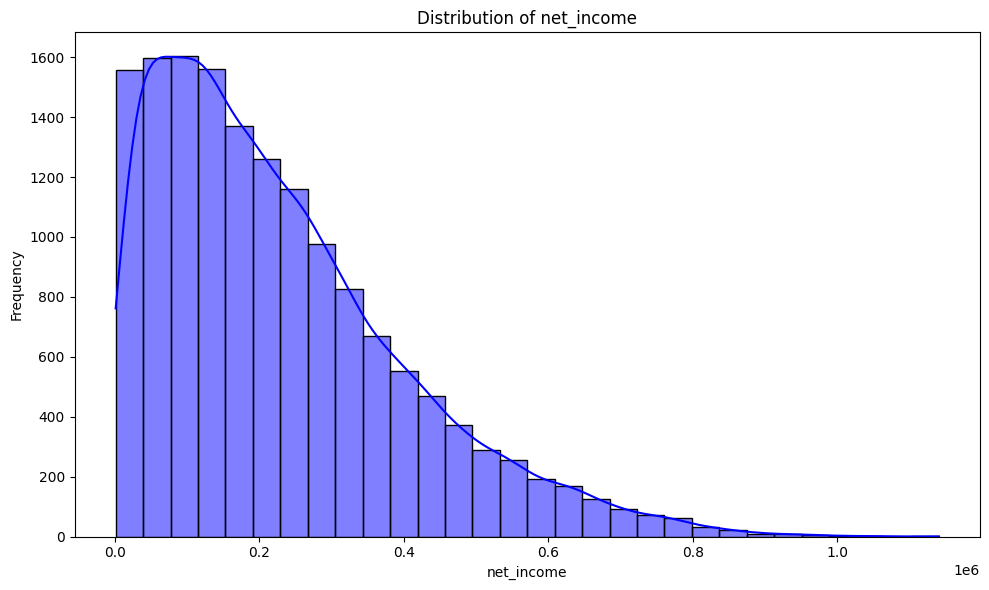

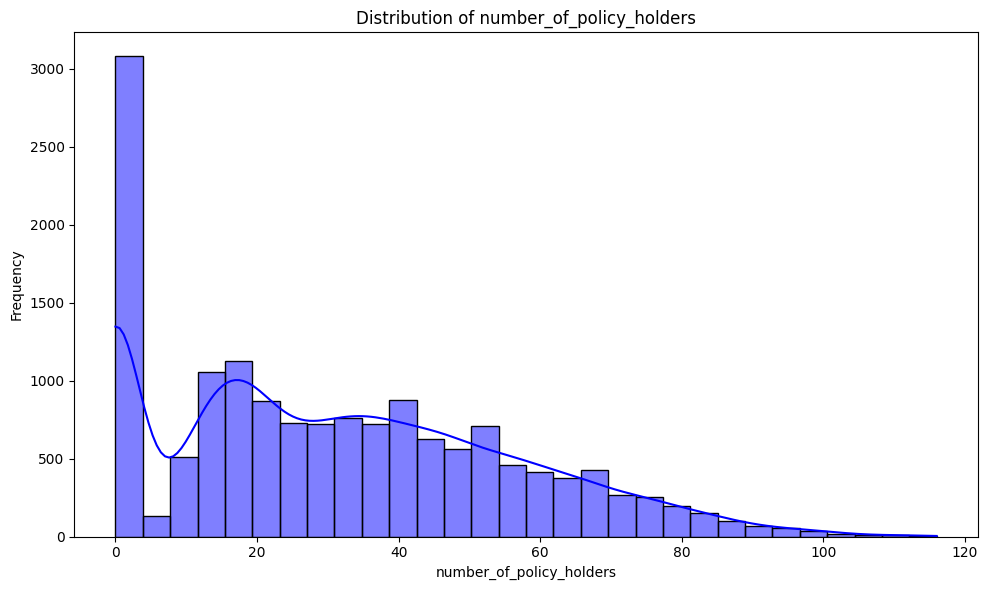

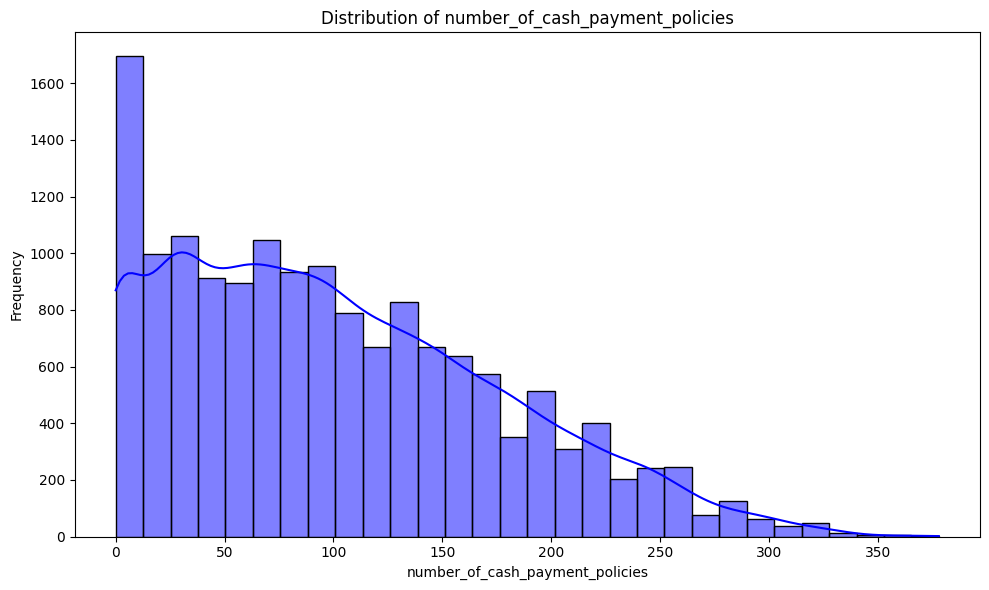

In [619]:
# Visualize the distribution of all features
for column in df.columns:
    plt.figure(figsize=(10, 6))
    if df[column].dtype == 'object':
        # Bar plot for categorical features
        sns.countplot(y=column, data=df, palette='Set2', order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
    else:
        # Histogram for numerical features
        sns.histplot(df[column], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

From the analysis above, it is evident that certain features exhibit positive skewness and contain outliers. Features such as `ANBP_value`, `net_income`, `number_of_policy_holders`, and `number_of_cash_payment_policies` are positively skewed. To address this, these features should be normalized using a logarithmic scale to reduce skewness and improve the distribution.

### Policies sold - monthwise

<ipython-input-620-39043289ffe1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month', y='new_policy_count', data=monthly_policy_sales, palette='Set2')


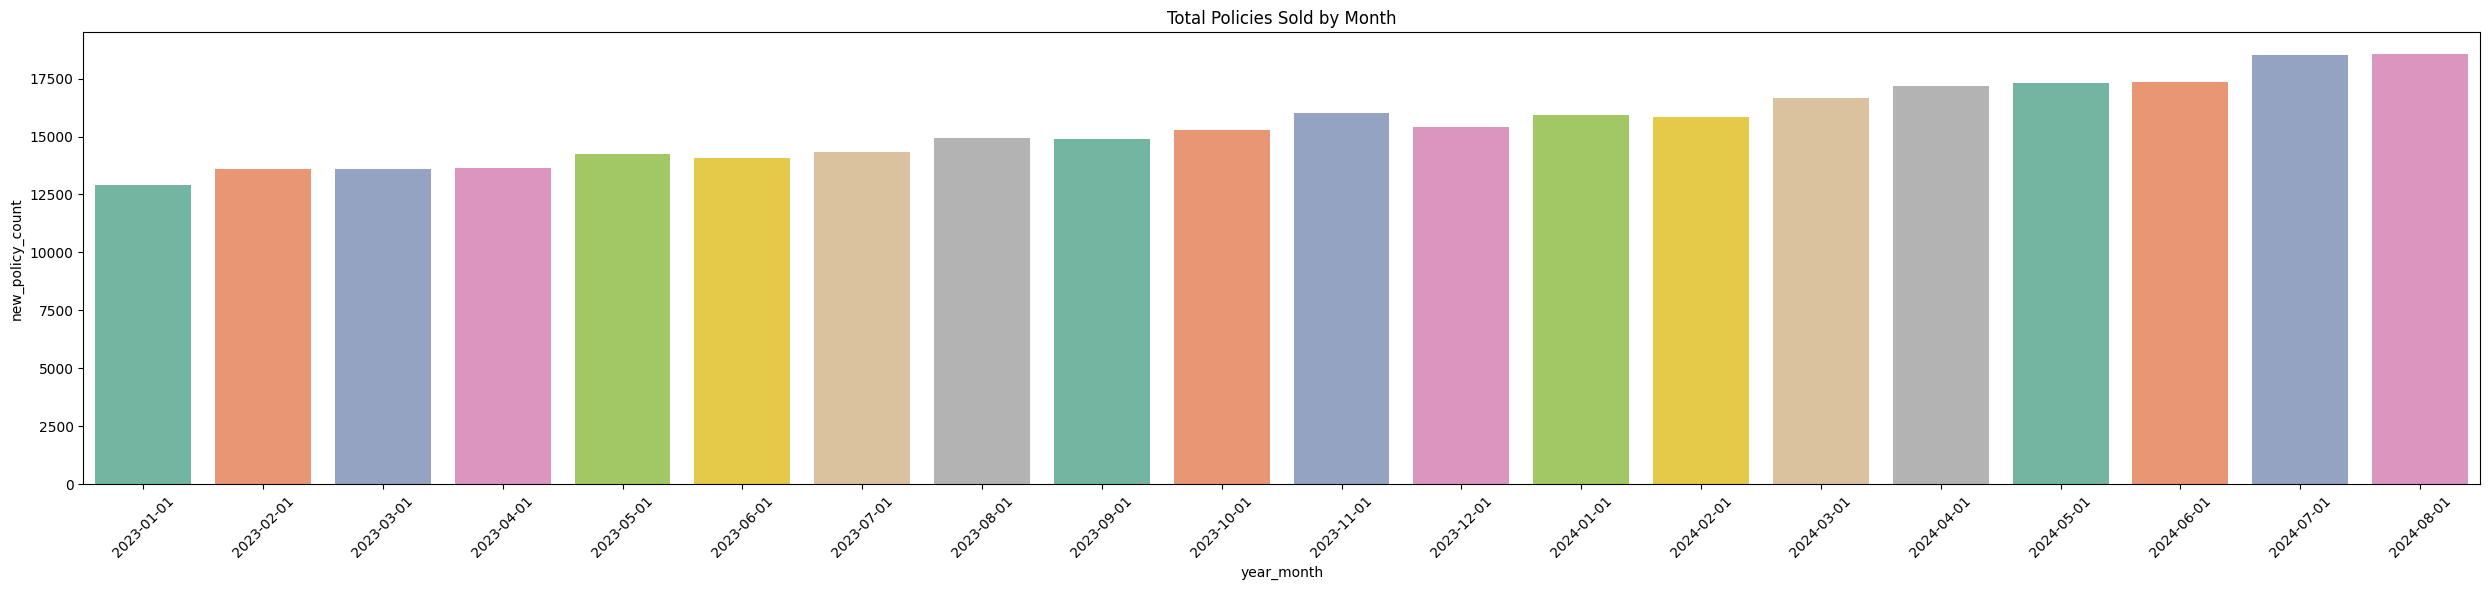

In [620]:
monthly_policy_sales = df.groupby('year_month')['new_policy_count'].sum().reset_index()

plt.figure(figsize=(25, 6))
sns.barplot(x='year_month', y='new_policy_count', data=monthly_policy_sales, palette='Set2')
plt.title('Total Policies Sold by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The analysis indicates a consistent month-over-month increase in the number of policies sold.

### Correlation heatmap of all the feataures

Text(0.5, 1.0, 'Correlation Heatmap')

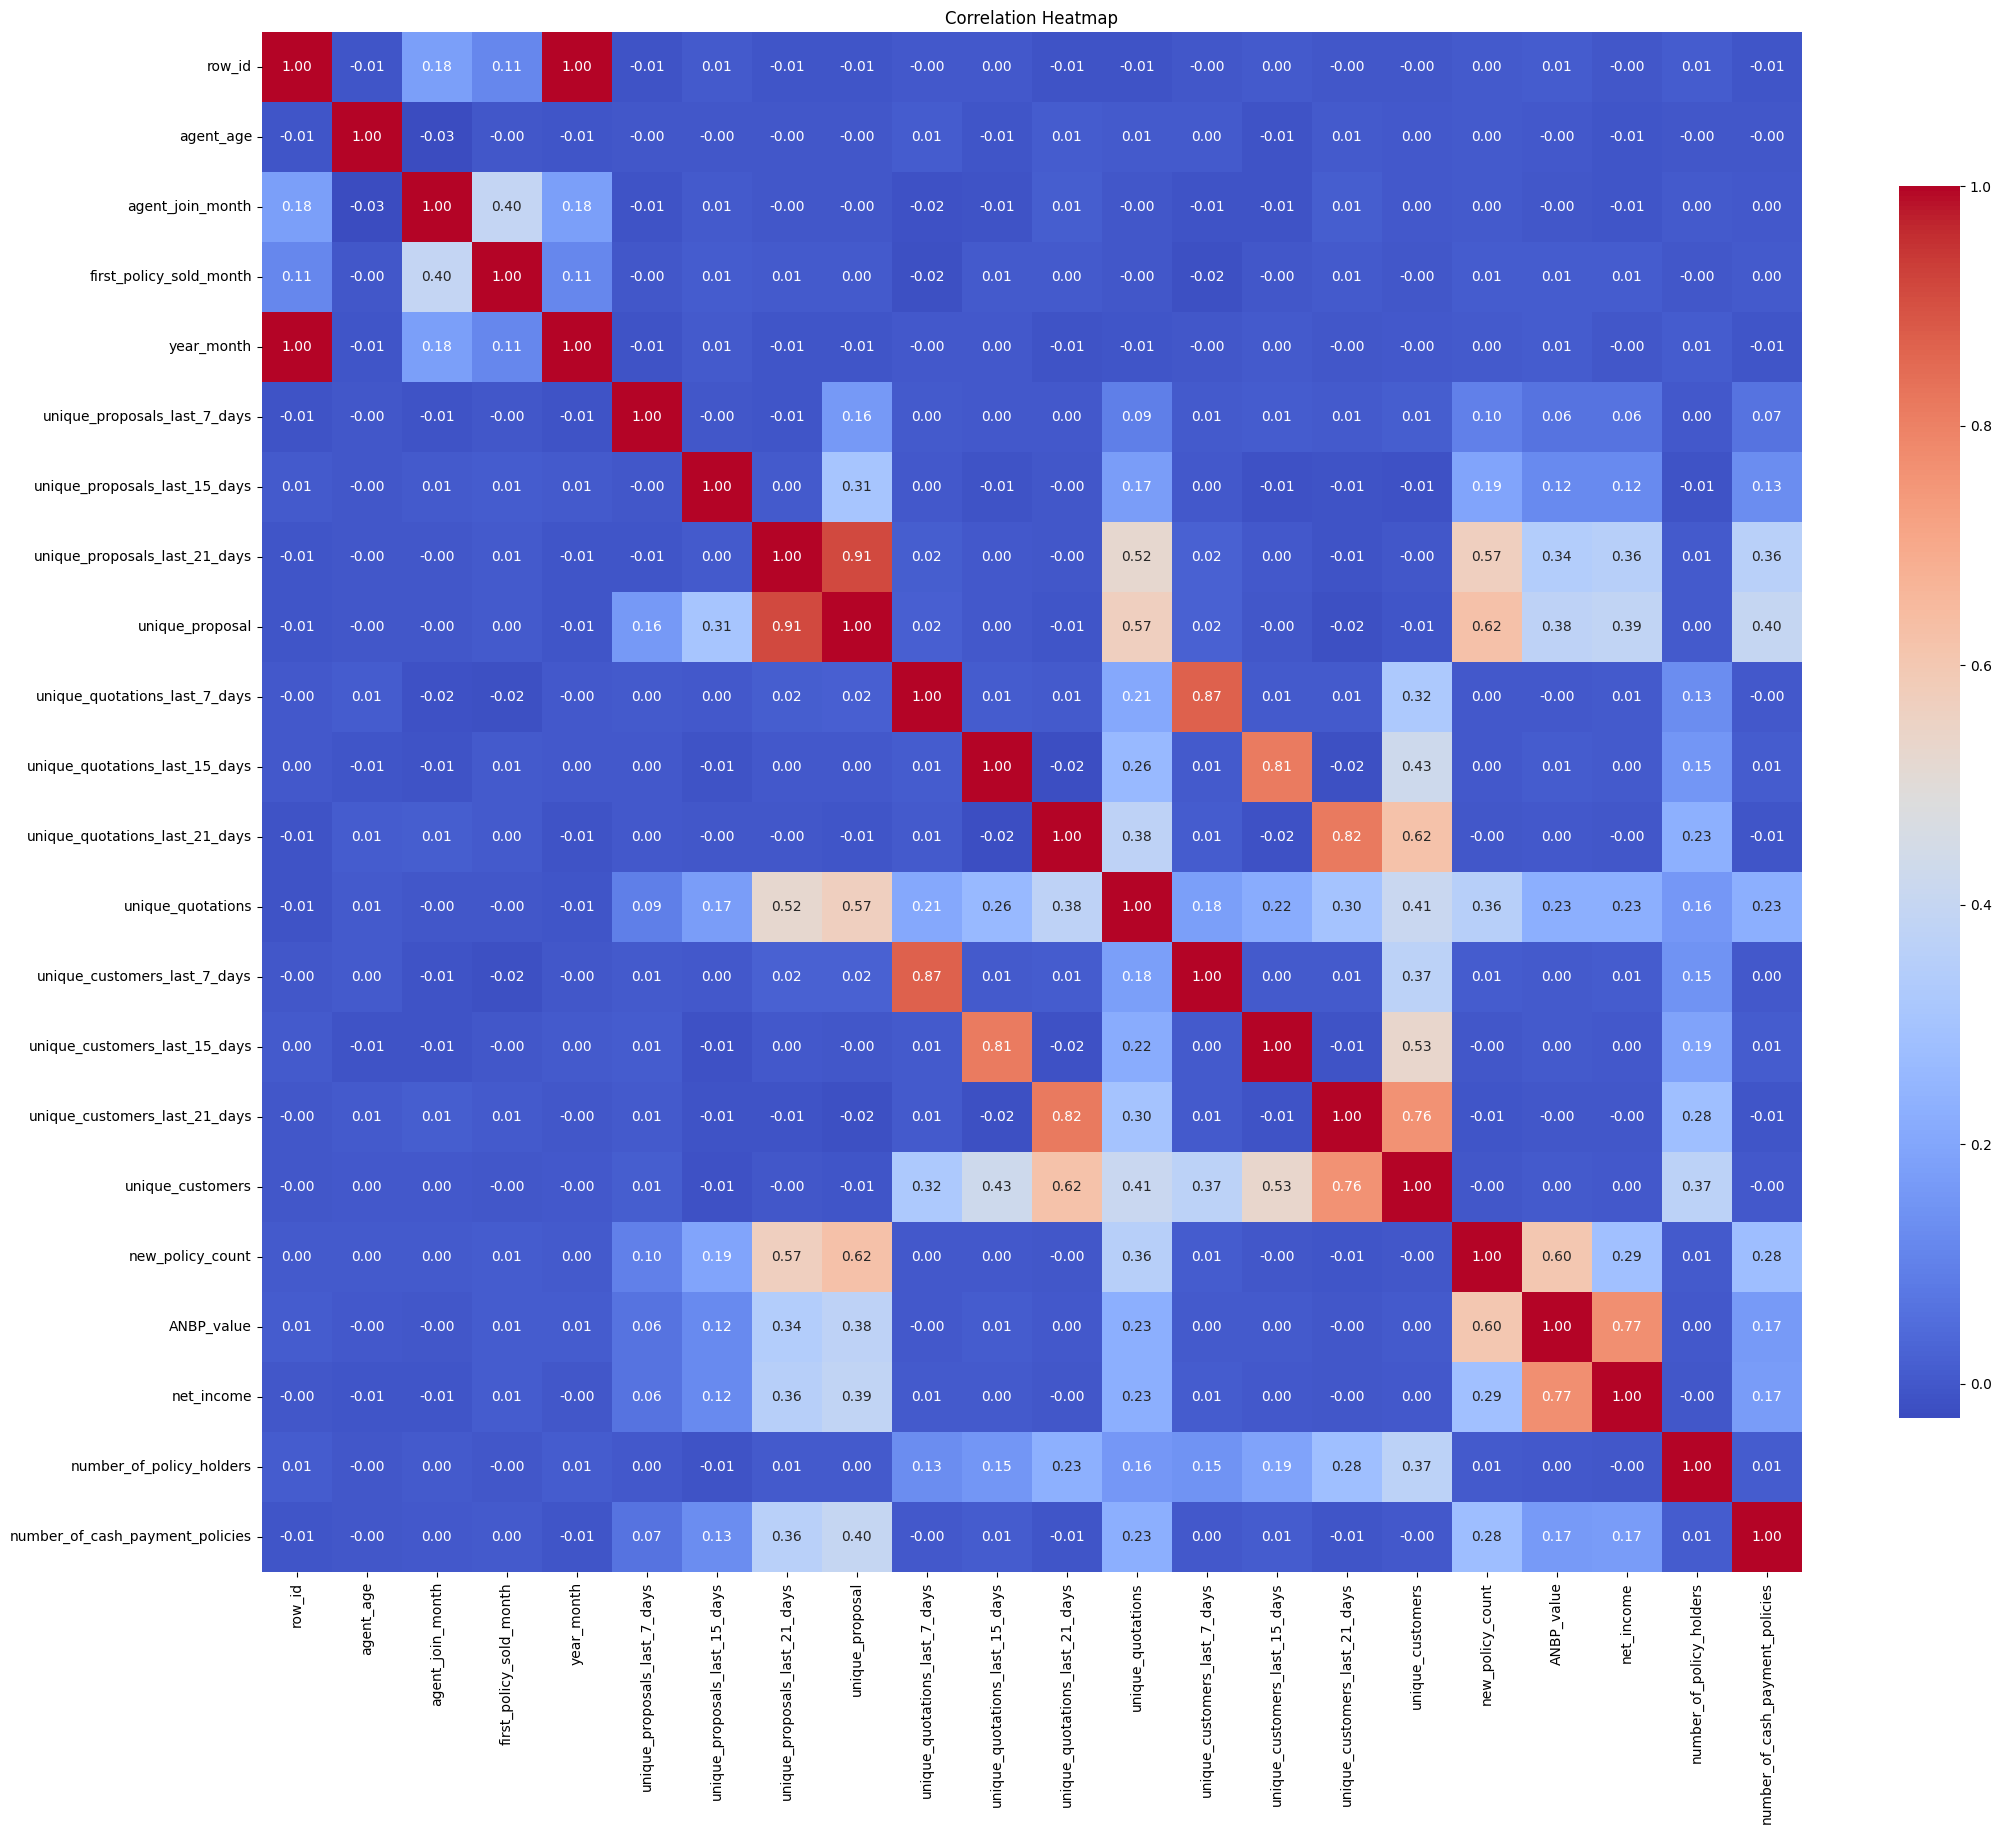

In [621]:
df_corr = df.drop("agent_code", axis=1)
corr = df_corr.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')

Demographic features appear to have minimal influence on the outcomes. Key factors contributing to the results include `net_income`, `new_policy_count`, `ANBP_value`, and `unique_customers_last_21_days`. This observation was derived from the correlation heatmap analysis.


In [622]:
df.dtypes

row_id                                      int64
agent_code                                 object
agent_age                                   int64
agent_join_month                   datetime64[ns]
first_policy_sold_month            datetime64[ns]
year_month                         datetime64[ns]
unique_proposals_last_7_days                int64
unique_proposals_last_15_days               int64
unique_proposals_last_21_days               int64
unique_proposal                             int64
unique_quotations_last_7_days               int64
unique_quotations_last_15_days              int64
unique_quotations_last_21_days              int64
unique_quotations                           int64
unique_customers_last_7_days                int64
unique_customers_last_15_days               int64
unique_customers_last_21_days               int64
unique_customers                            int64
new_policy_count                            int64
ANBP_value                                  int64
net_income                                  int64
number_of_policy_holders                    int64
number_of_cash_payment_policies             int64
dtype: object

### Comparison of Best and Worst agents on new_policy_count.
combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `new_policy_count` between the top-performing and least-performing agents.

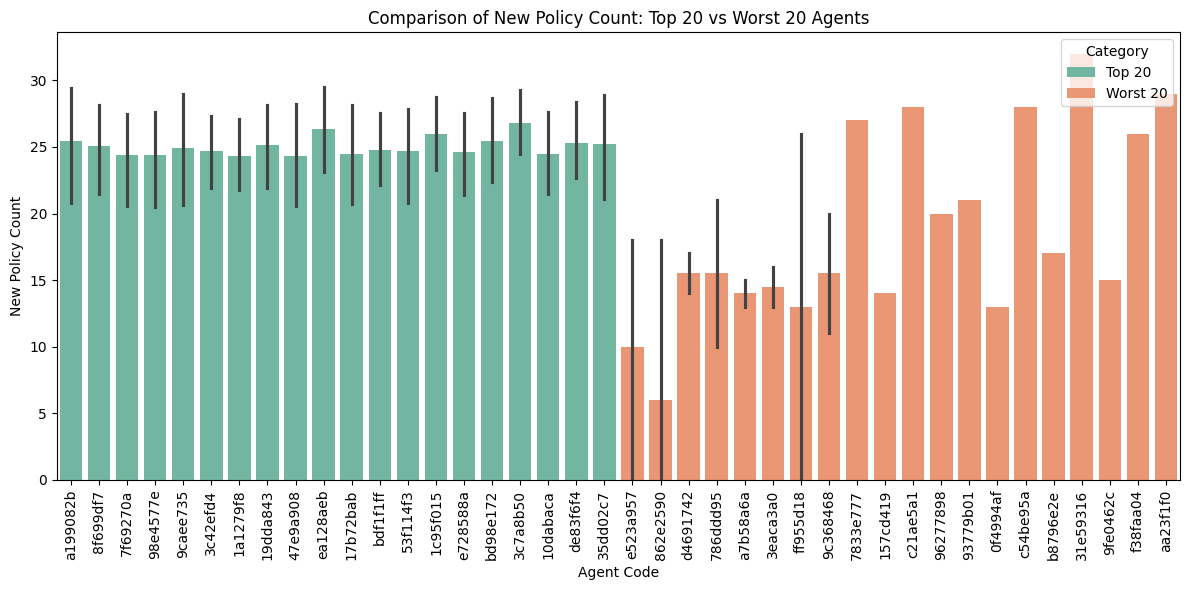

In [623]:
top_20_agents = df.groupby('agent_code')['new_policy_count'].sum().reset_index().sort_values(by='new_policy_count', ascending=False).head(20)


worst_20_agents = df.groupby('agent_code')['new_policy_count'].sum().reset_index().sort_values(by='new_policy_count', ascending=False).tail(20)

top_20_agents = df[df['agent_code'].isin(top_20_agents['agent_code'])]
worst_20_agents = df[df['agent_code'].isin(worst_20_agents['agent_code'])]



# Combine top 20 and worst 20 agents into one DataFrame
combined_agents = pd.concat([top_20_agents, worst_20_agents])

# Add a label column to distinguish between top and worst agents
combined_agents['Category'] = ['Top 20'] * len(top_20_agents) + ['Worst 20'] * len(worst_20_agents)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_code', y='new_policy_count', hue='Category', data=combined_agents, palette='Set2')
plt.title('Comparison of New Policy Count: Top 20 vs Worst 20 Agents')
plt.xlabel('Agent Code')
plt.ylabel('New Policy Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


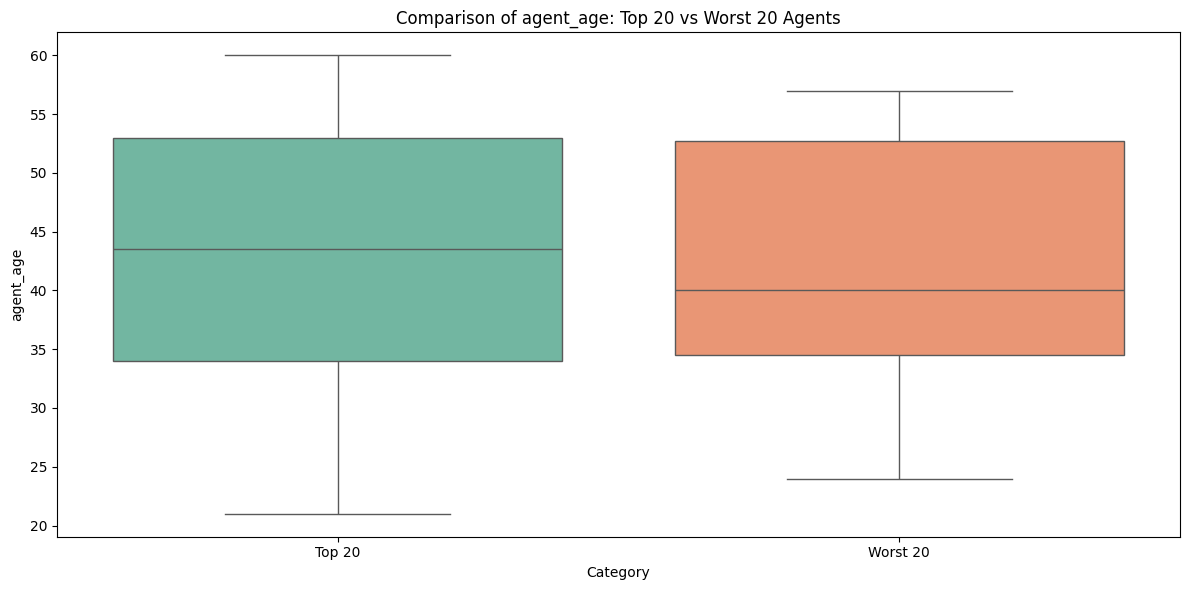

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


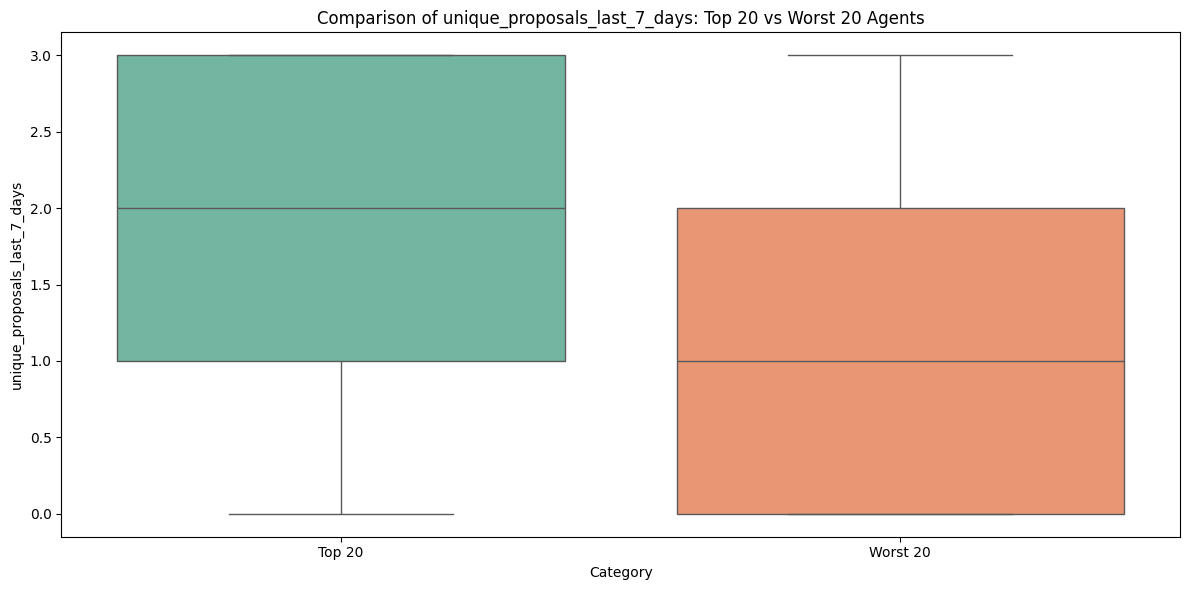

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


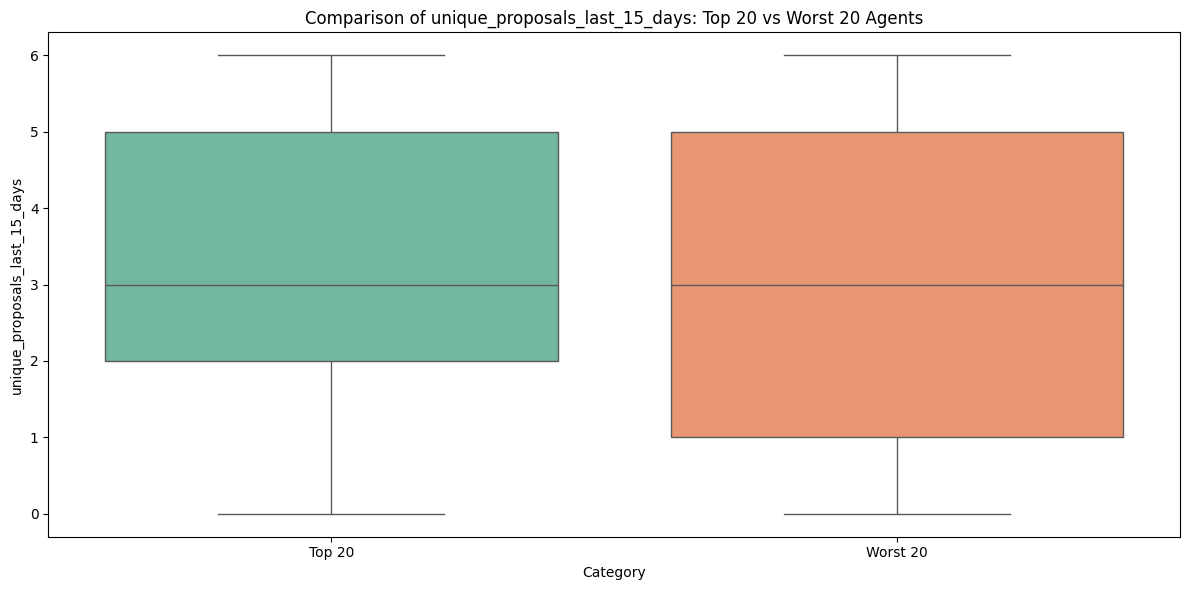

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


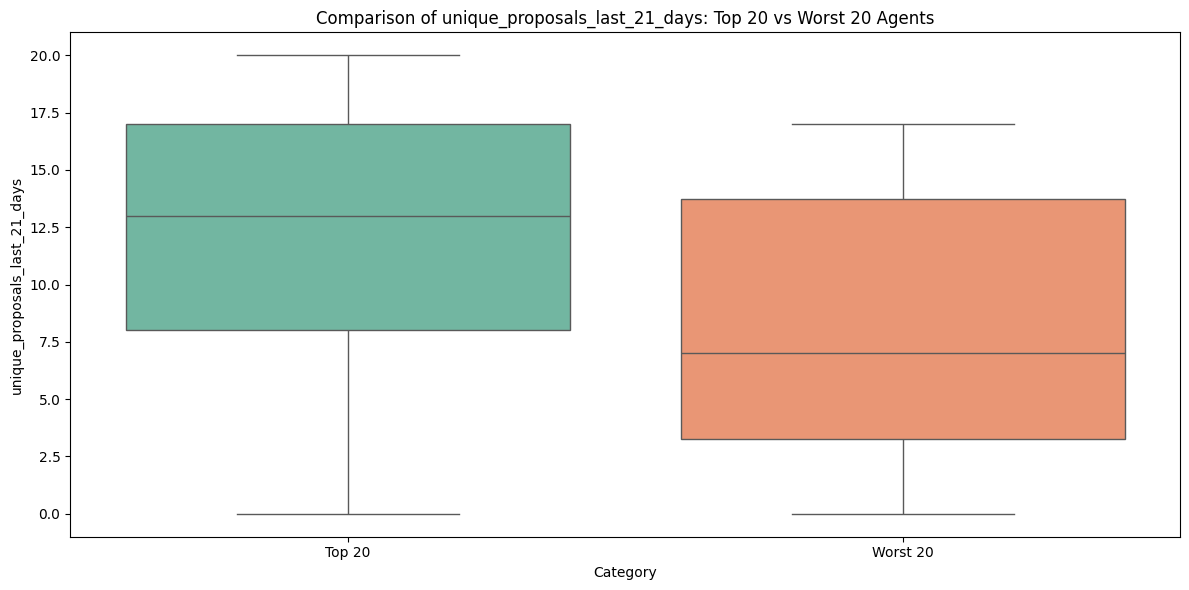

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


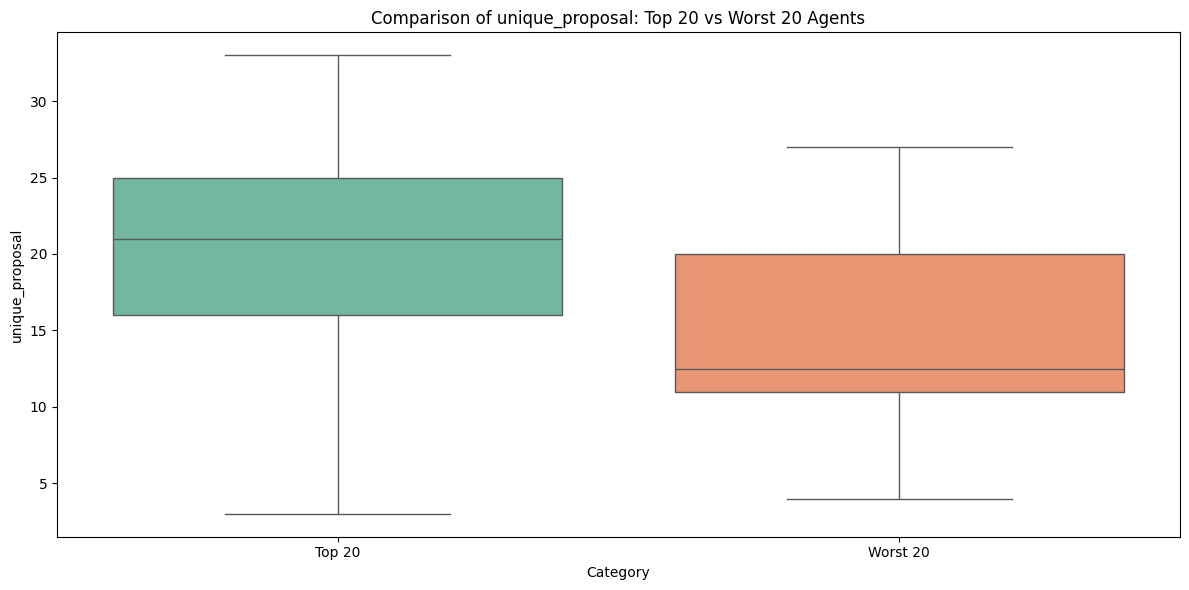

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


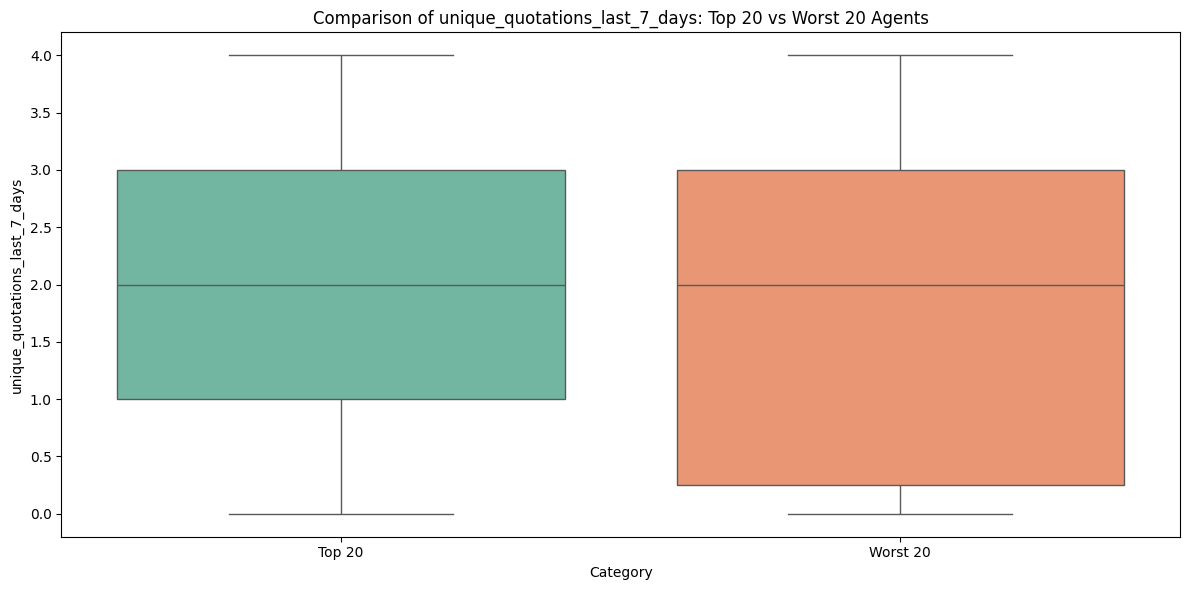

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


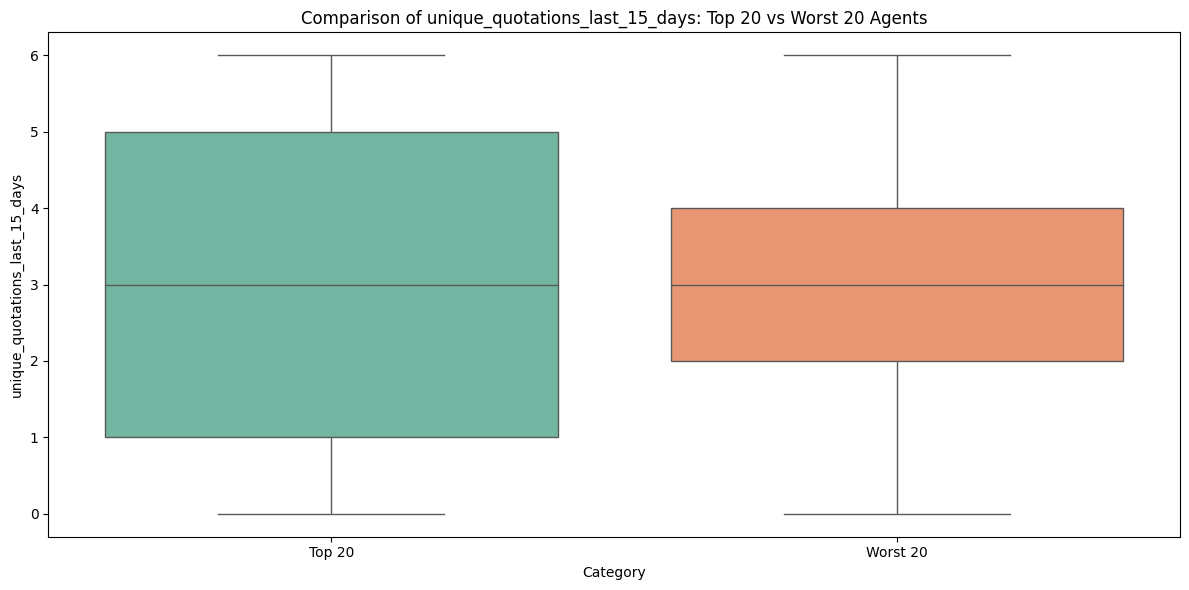

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


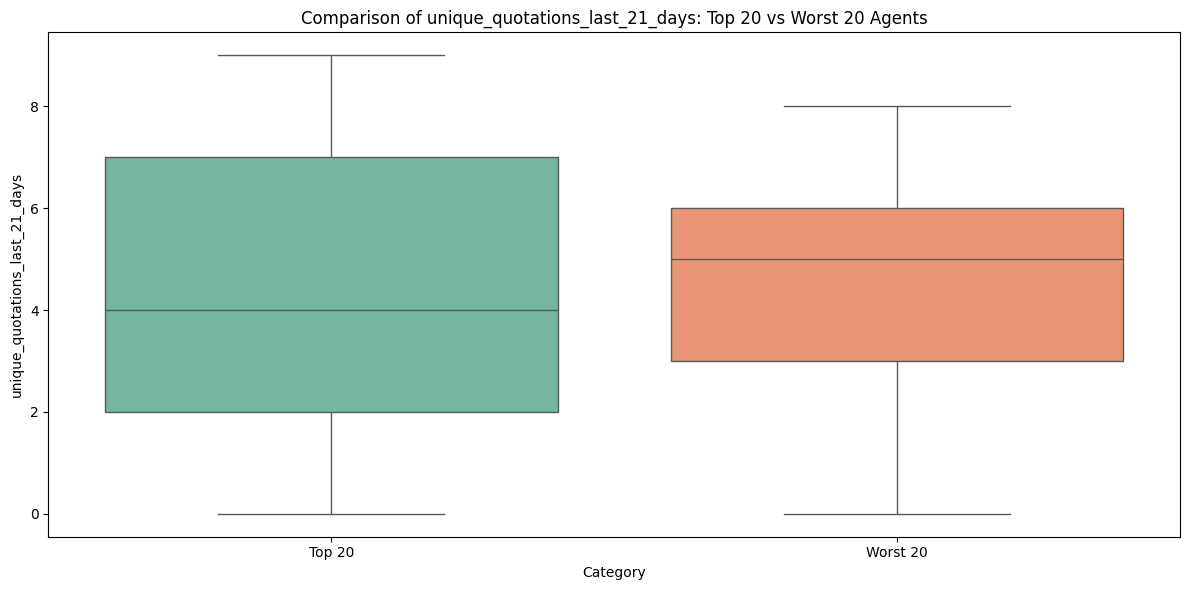

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


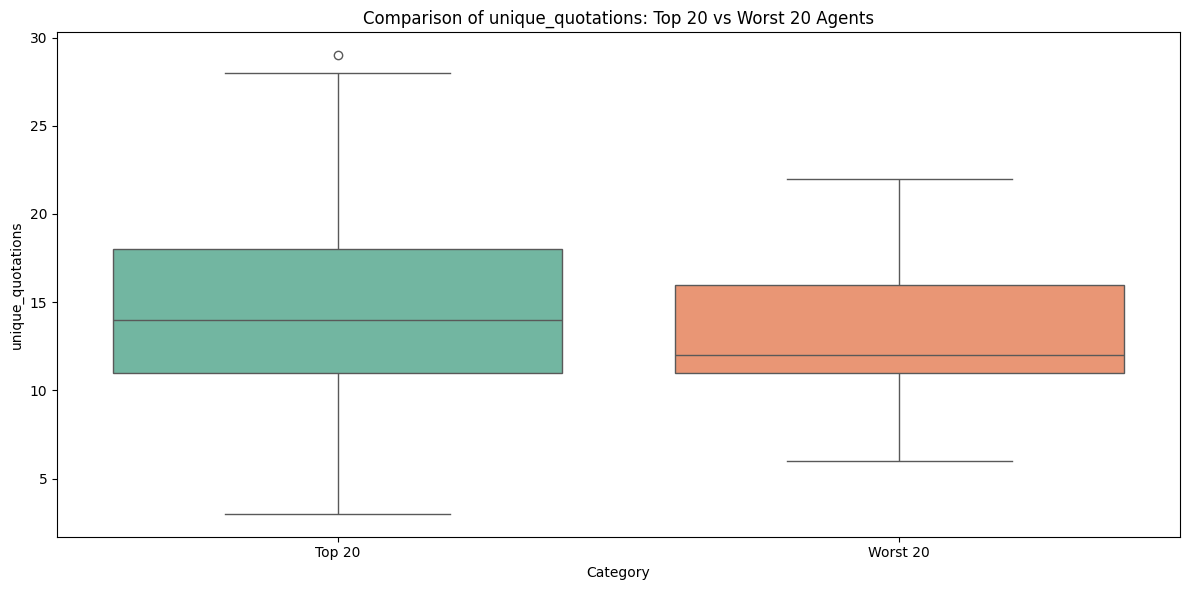

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


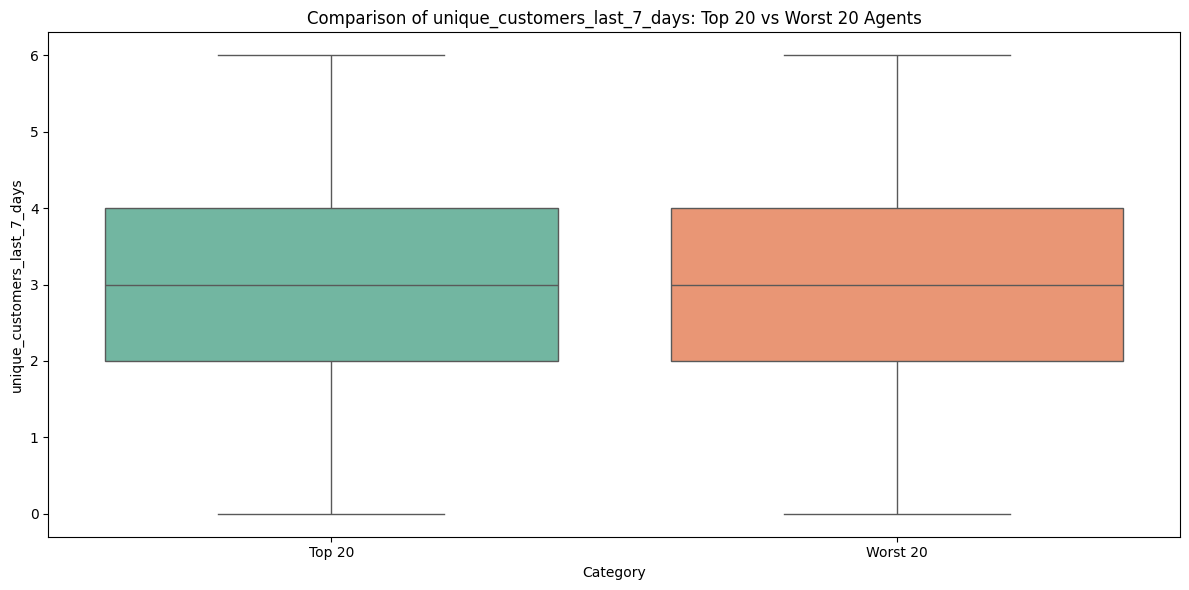

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


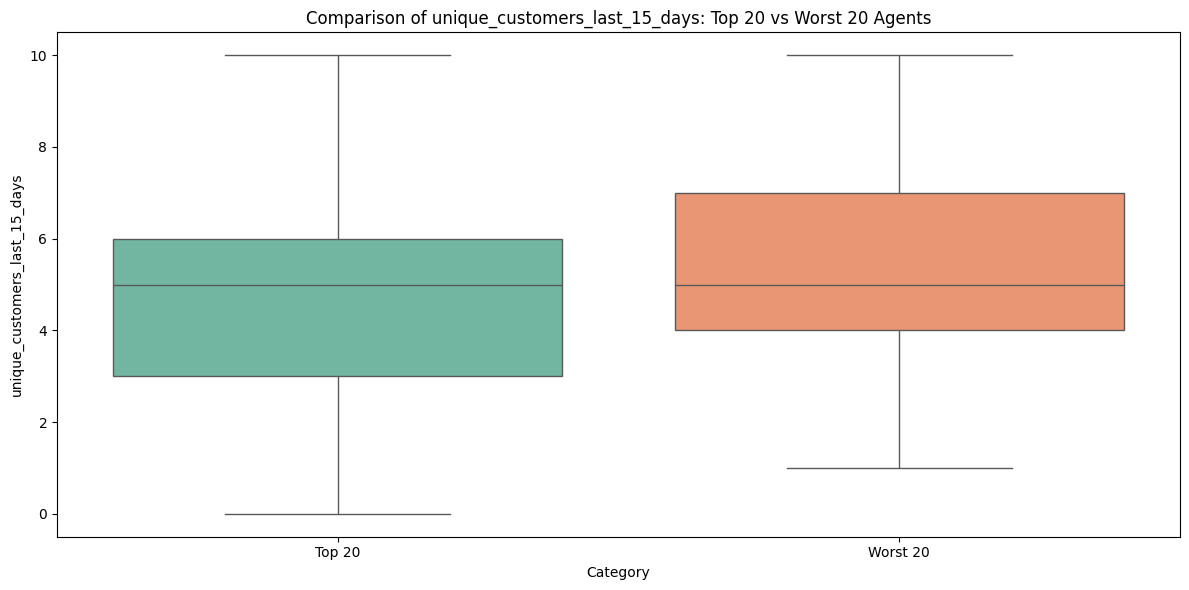

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


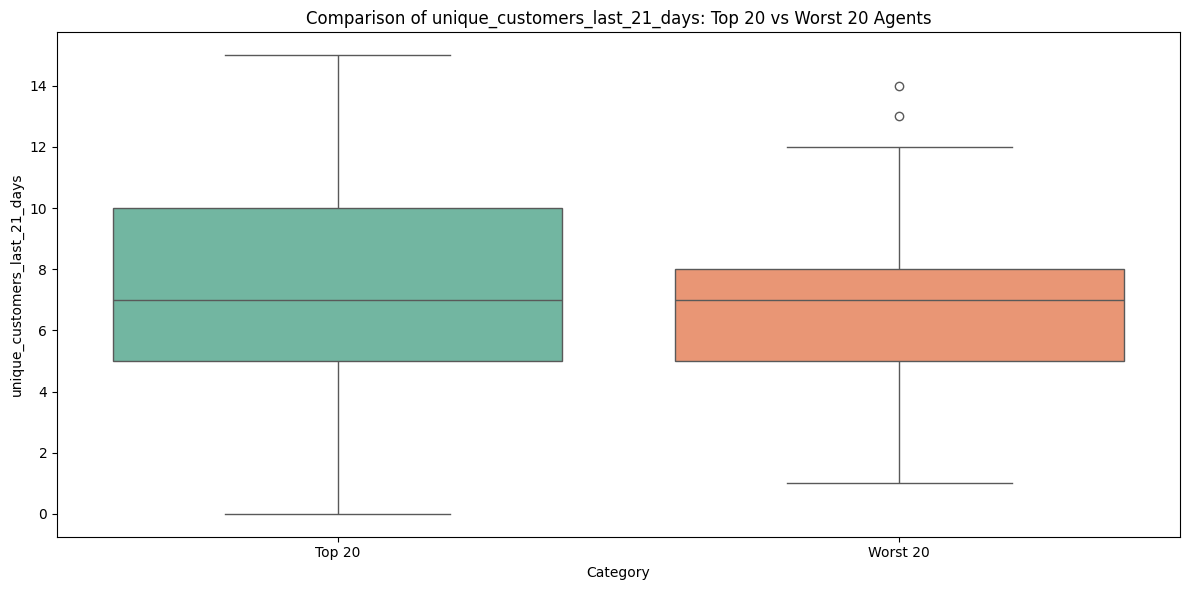

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


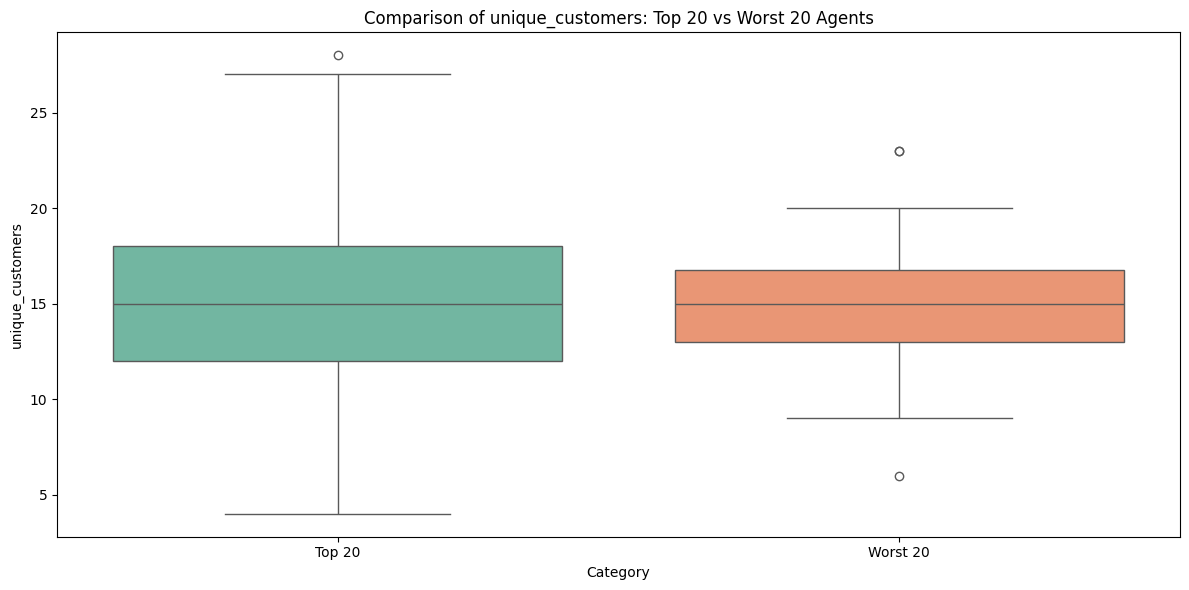

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


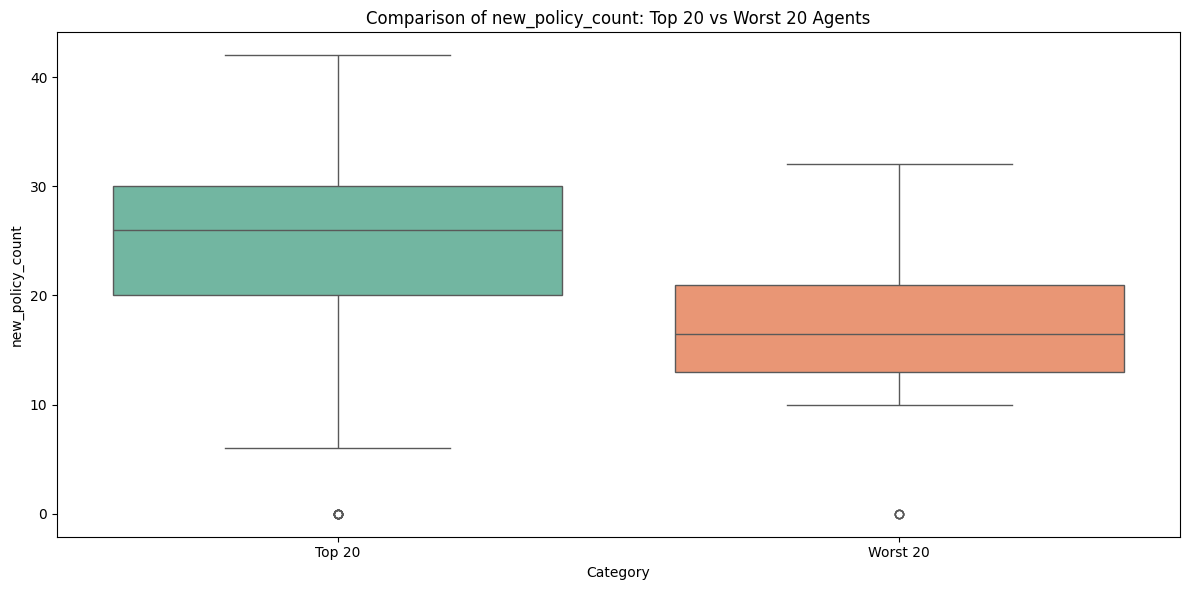

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


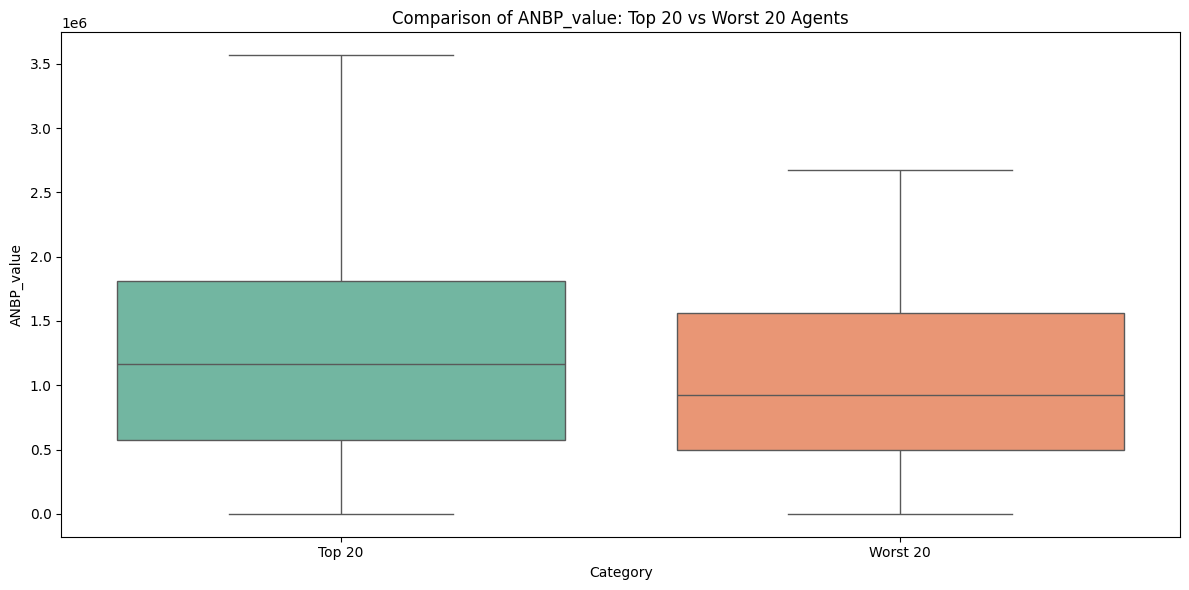

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


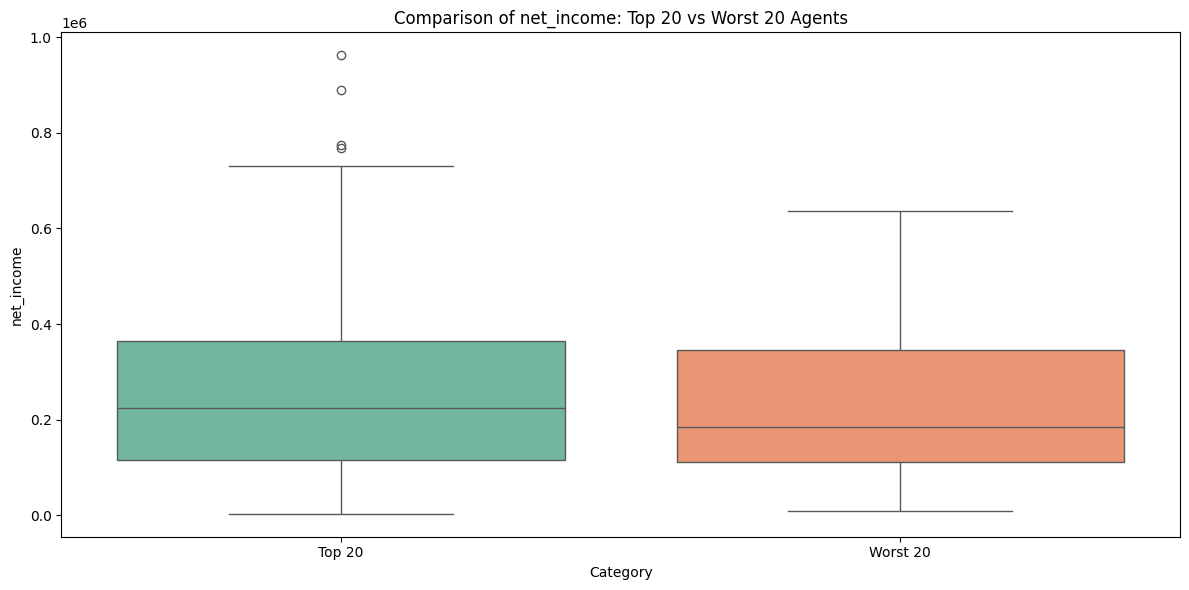

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


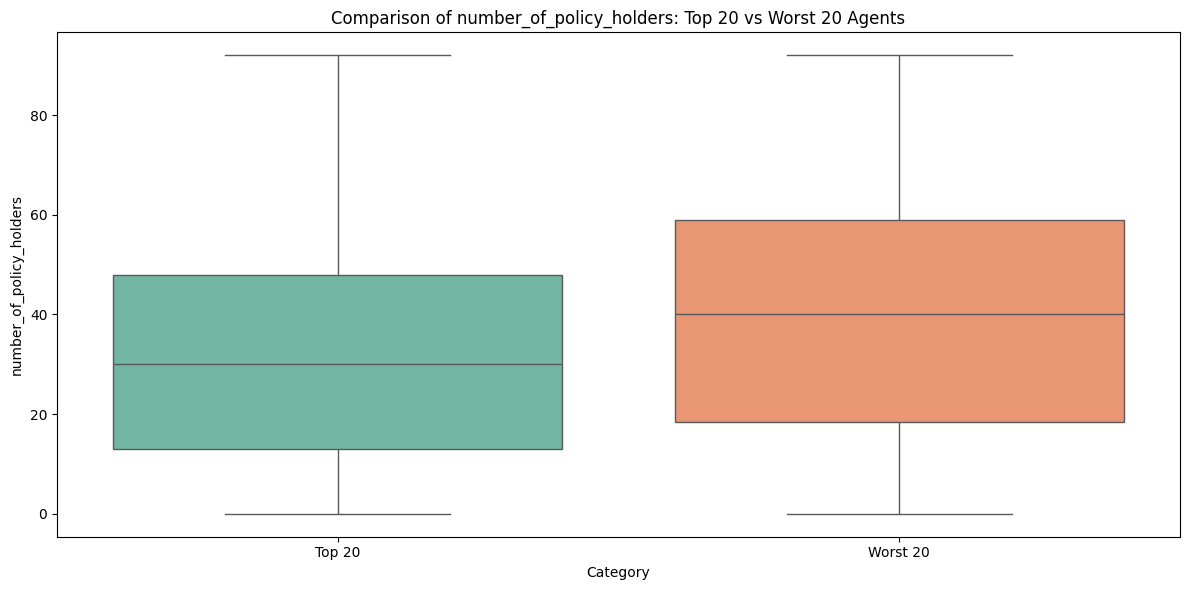

<ipython-input-624-05ff937a3397>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


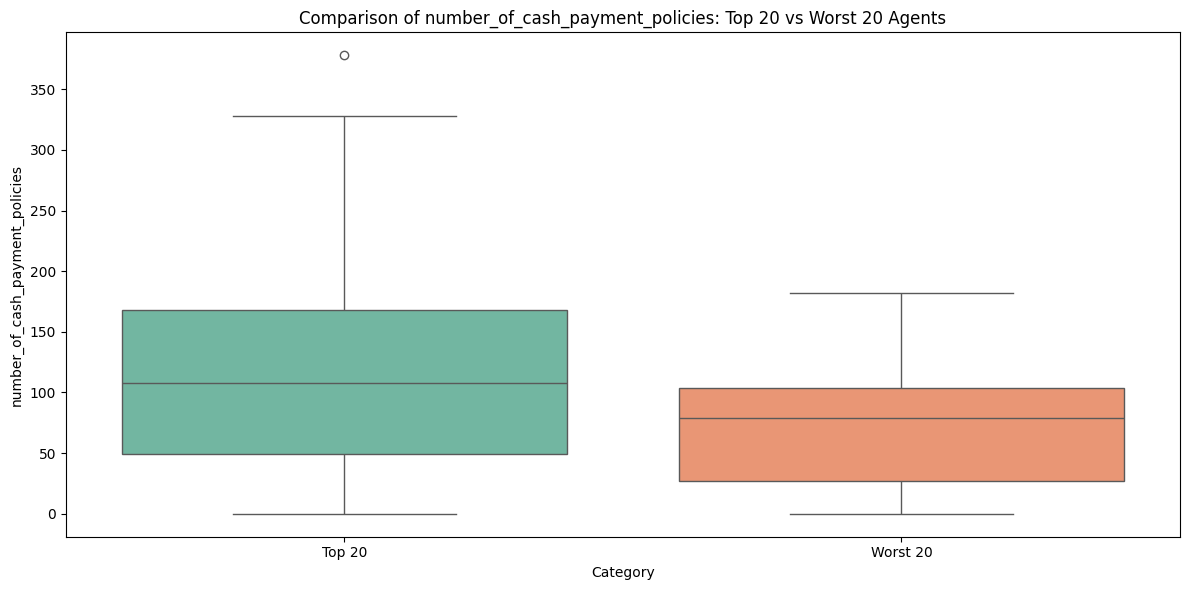

In [624]:
# Drop non-numeric or ID columns
exclude = ['row_id', 'agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month']
numerical_cols = [col for col in combined_agents.columns if combined_agents[col].dtype != 'object' and col not in exclude]

# Plot boxplots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')
    plt.title(f'Comparison of {col}: Top 20 vs Worst 20 Agents')
    plt.xlabel('Category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Comparison of Best and Worst agents on net_income.
Combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `net_income` between the top-performing and least-performing agents.

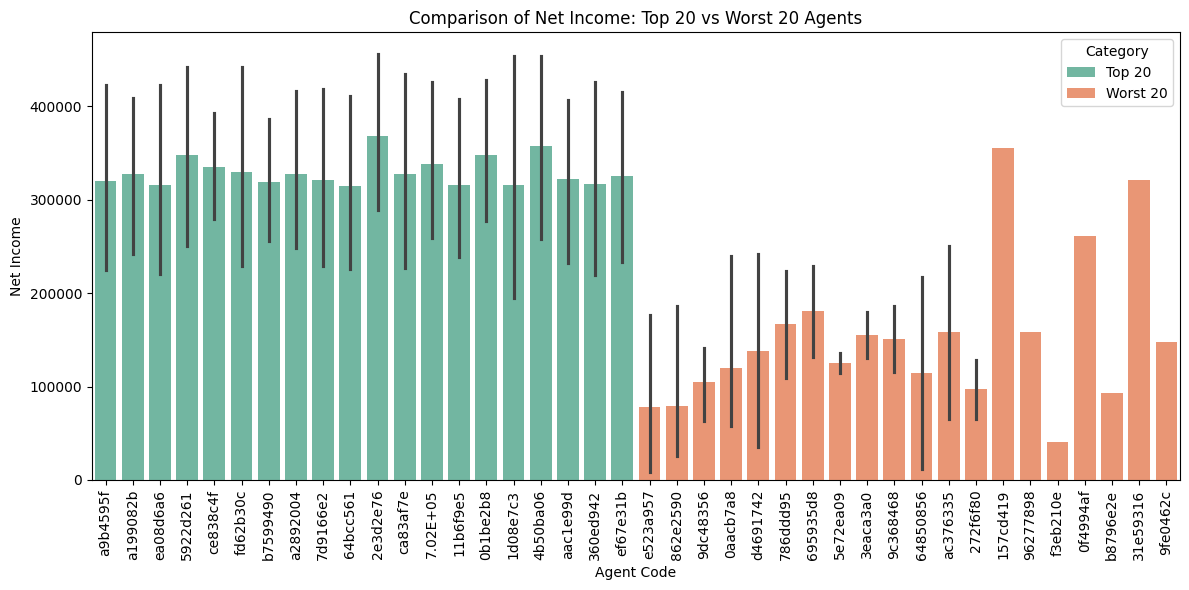

In [625]:
top_earning_agents = df.groupby('agent_code')['net_income'].sum().reset_index().sort_values(by='net_income', ascending=False).head(20)


worst_earning_agents = df.groupby('agent_code')['net_income'].sum().reset_index().sort_values(by='net_income', ascending=False).tail(20)

top_earning_agents = df[df['agent_code'].isin(top_earning_agents['agent_code'])]
worst_earning_agents = df[df['agent_code'].isin(worst_earning_agents['agent_code'])]


# Combine top 20 and worst 20 agents into one DataFrame
combined_agents_earning = pd.concat([top_earning_agents, worst_earning_agents])

# Add a label column to distinguish between top and worst agents
combined_agents_earning['Category'] = ['Top 20'] * len(top_earning_agents) + ['Worst 20'] * len(worst_earning_agents)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_code', y='net_income', hue='Category', data=combined_agents_earning, palette='Set2')
plt.title('Comparison of Net Income: Top 20 vs Worst 20 Agents')
plt.xlabel('Agent Code')
plt.ylabel('Net Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


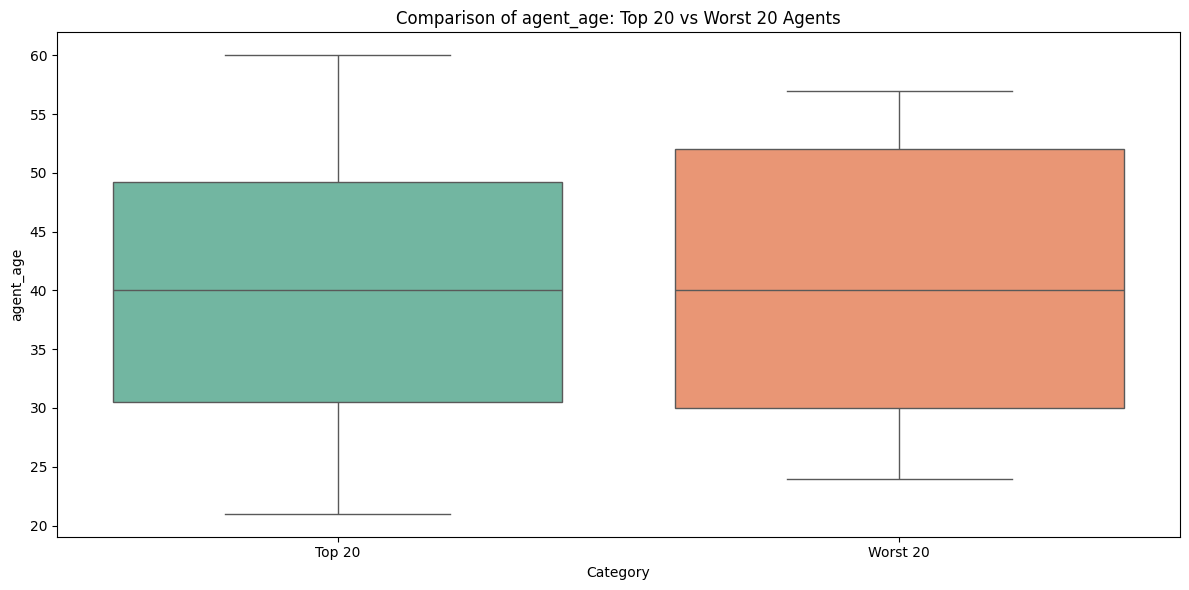

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


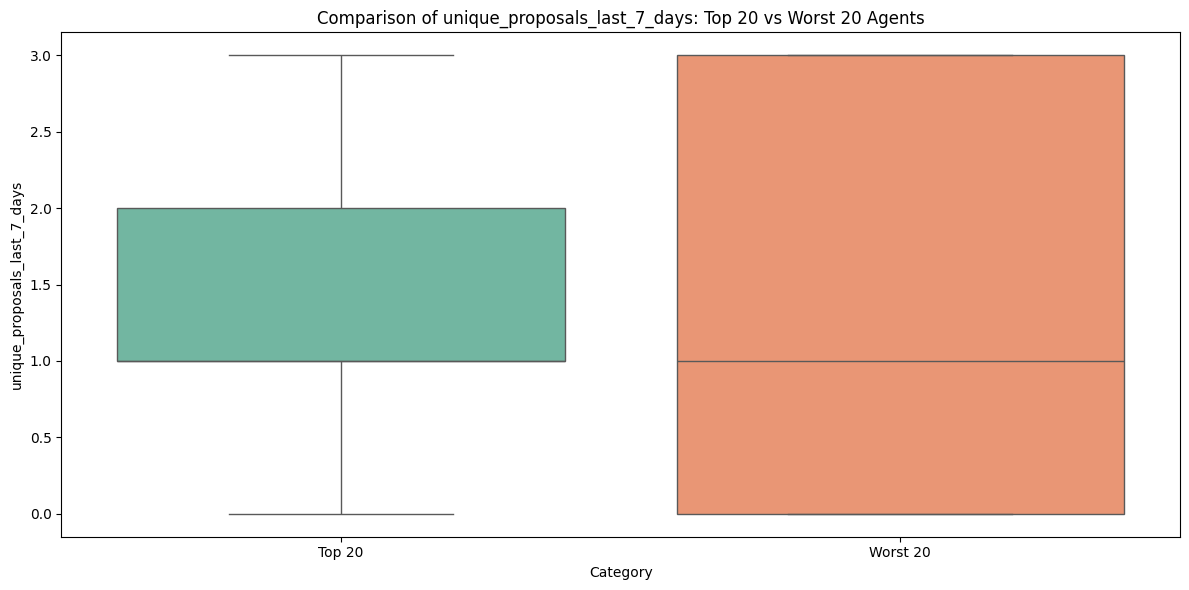

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


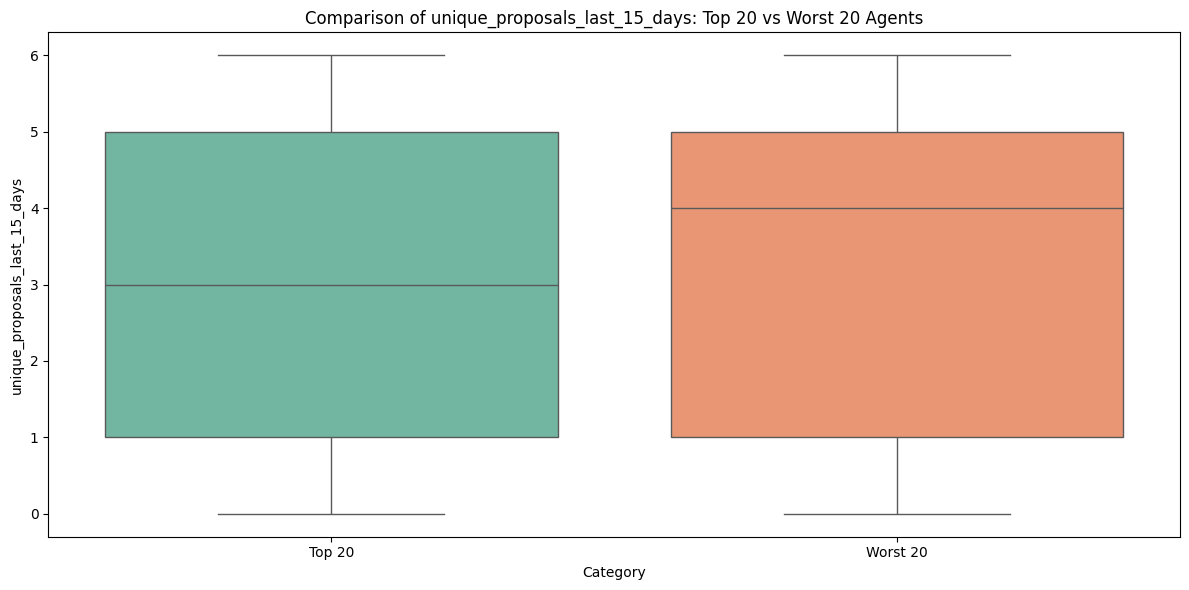

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


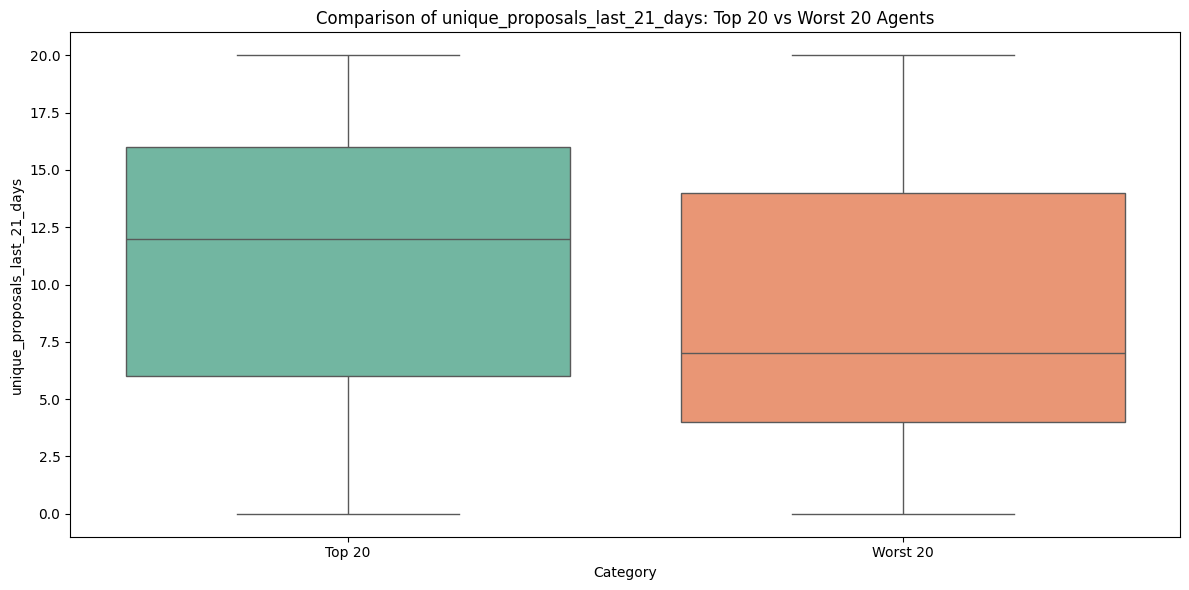

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


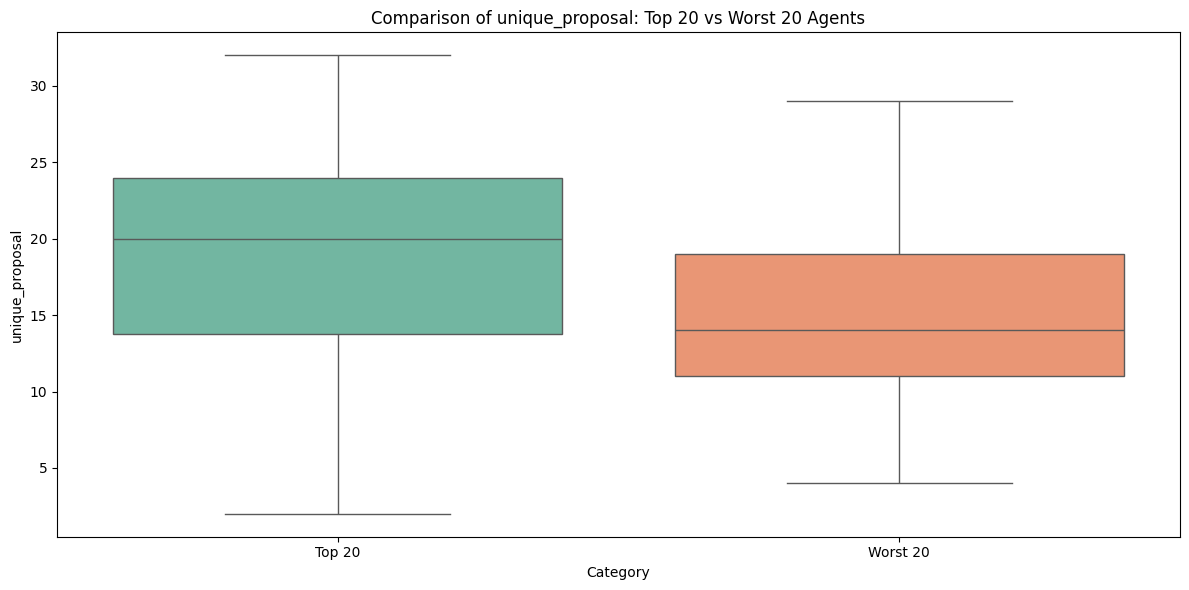

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


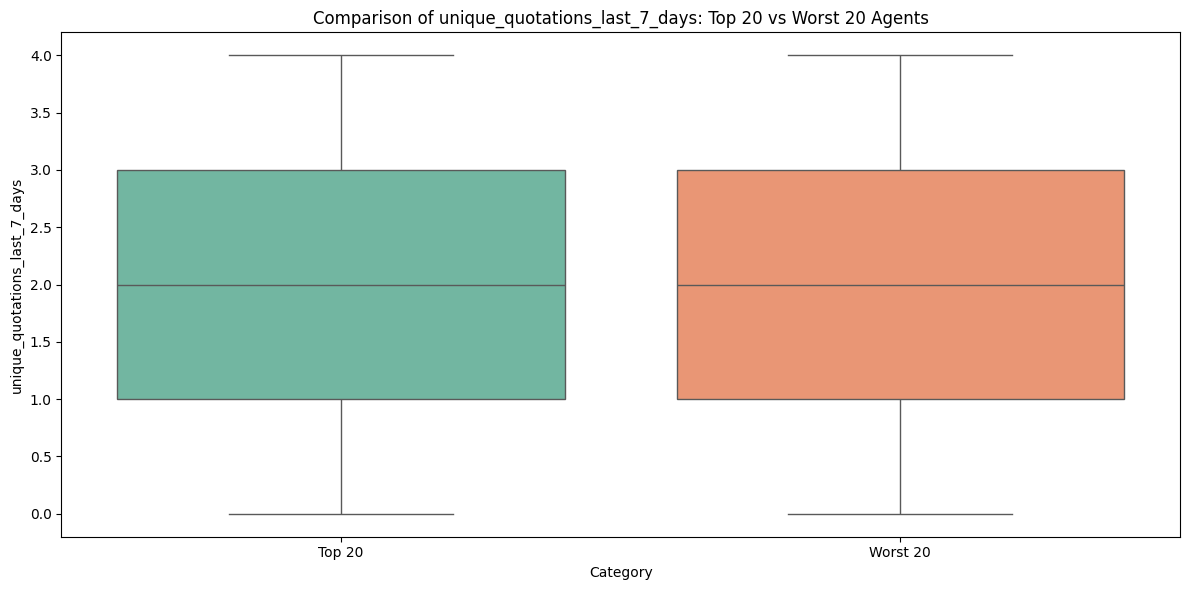

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


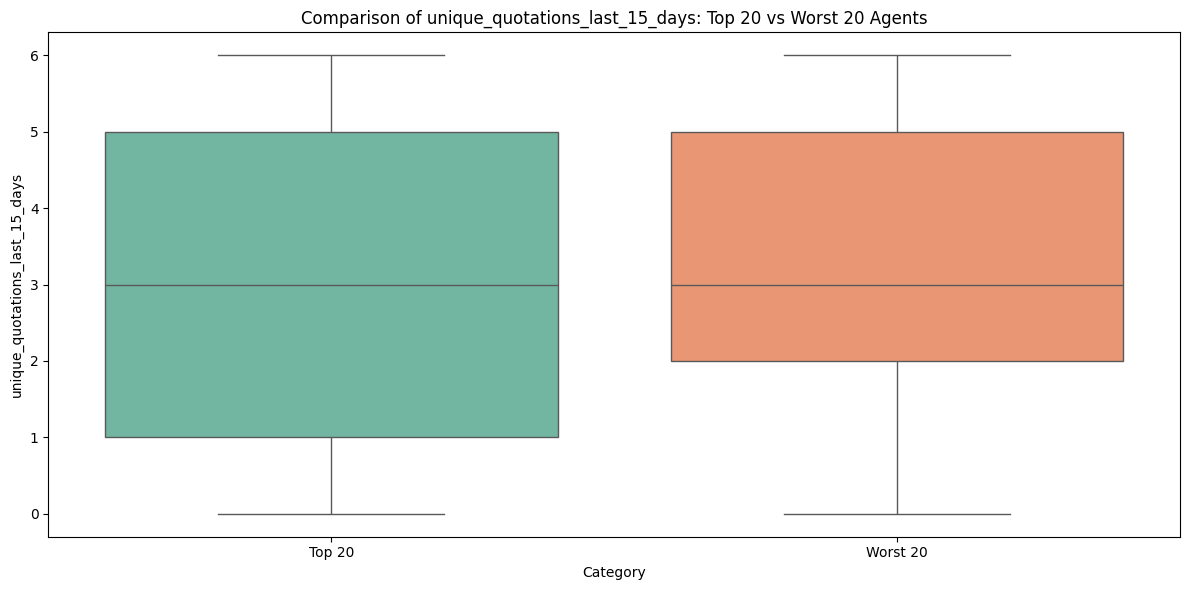

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


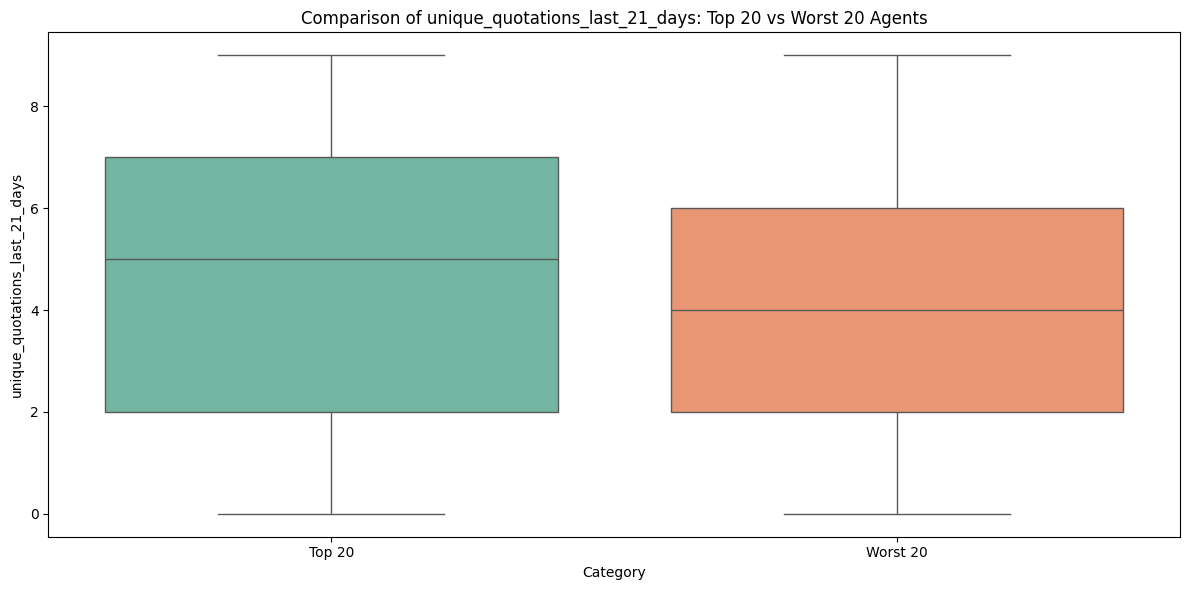

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


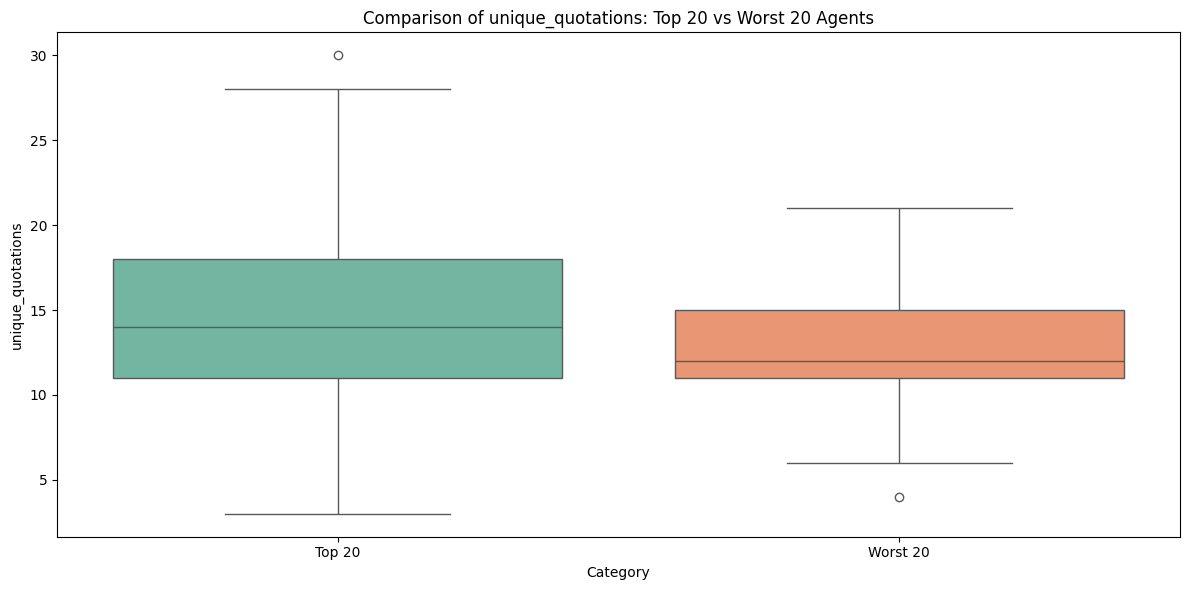

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


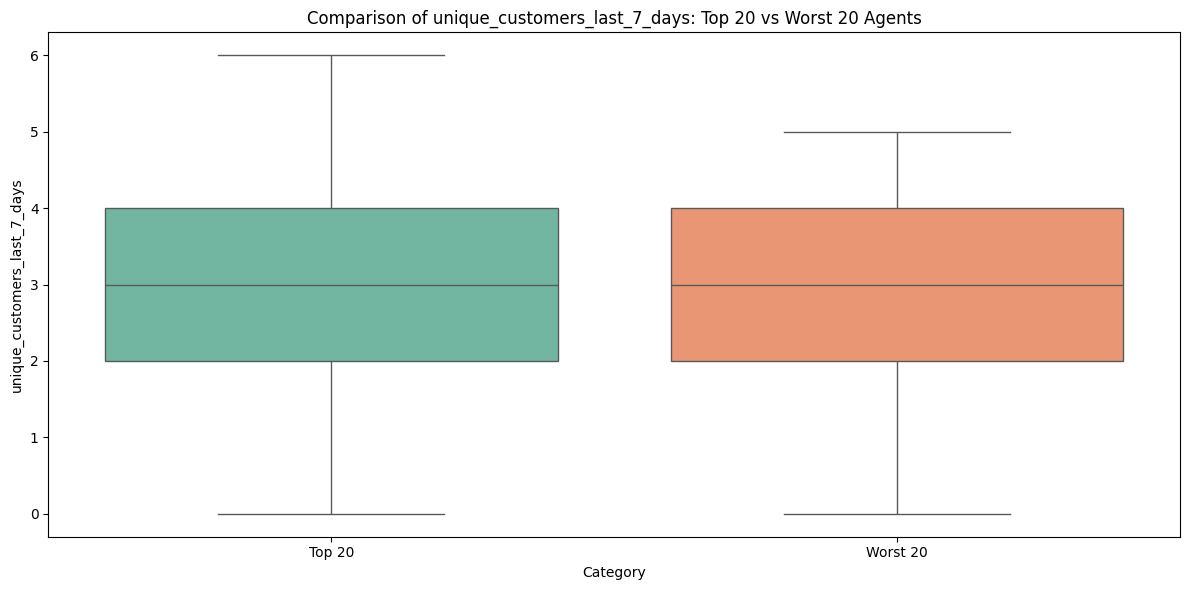

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


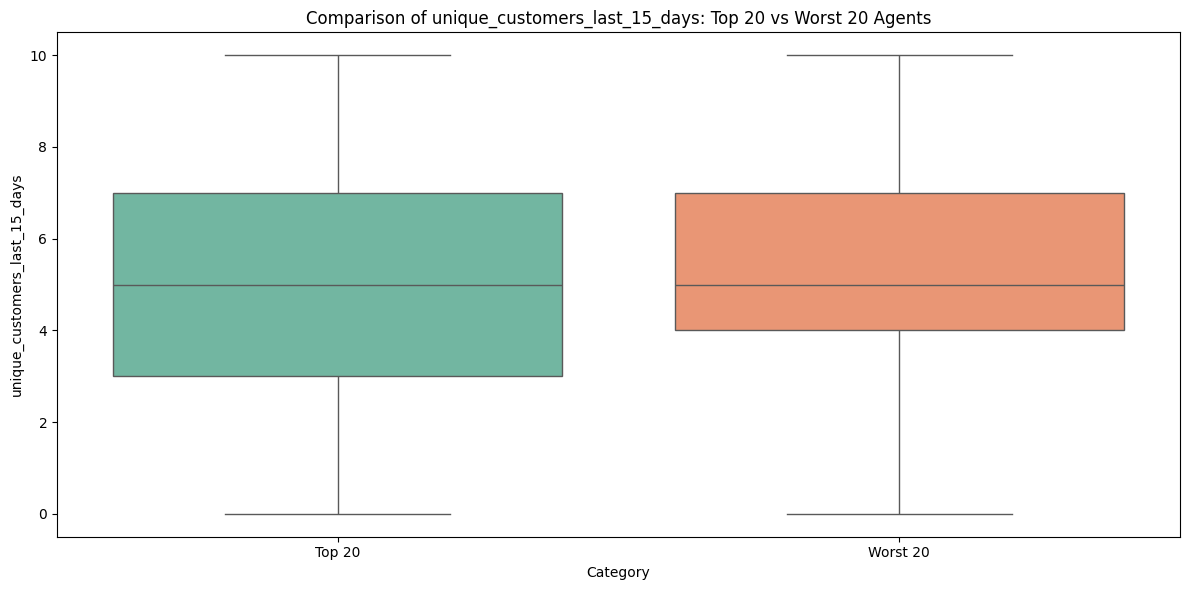

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


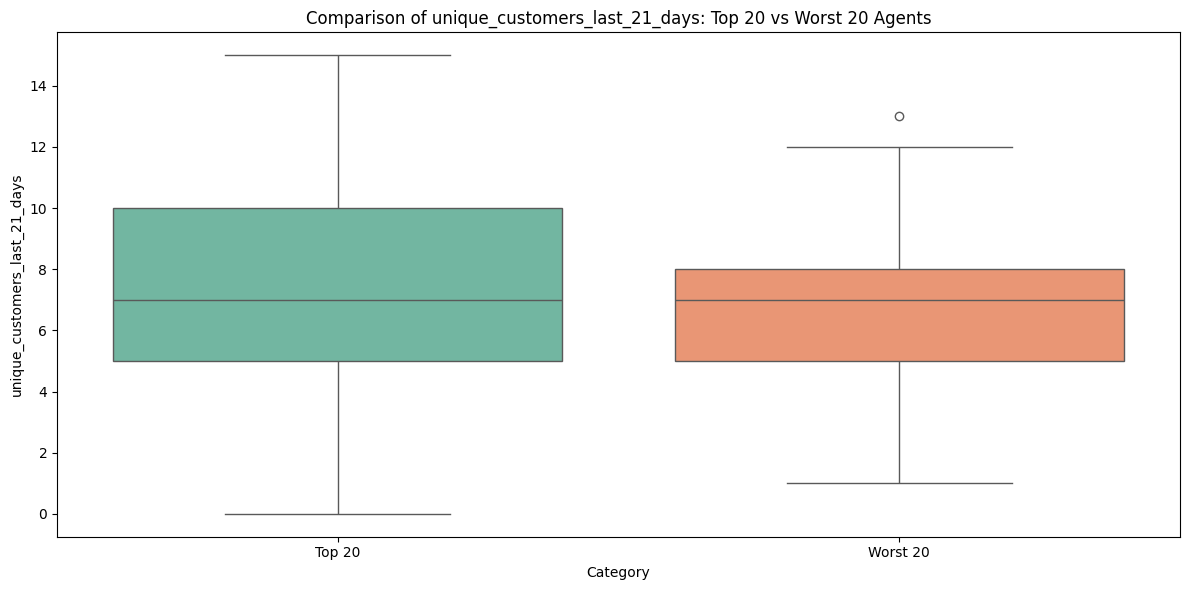

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


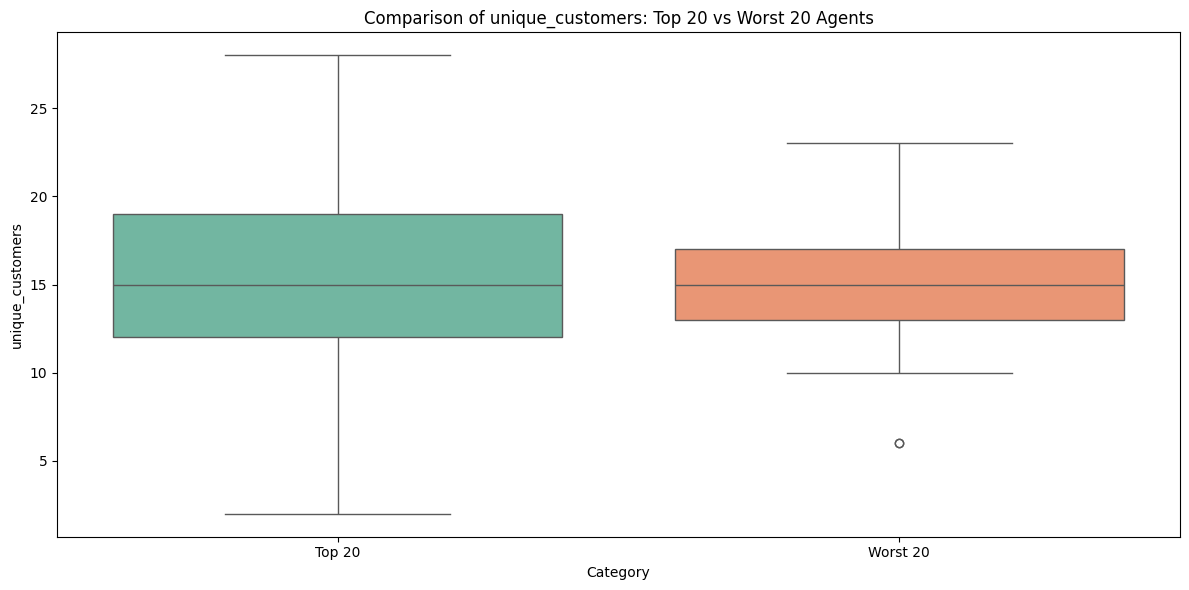

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


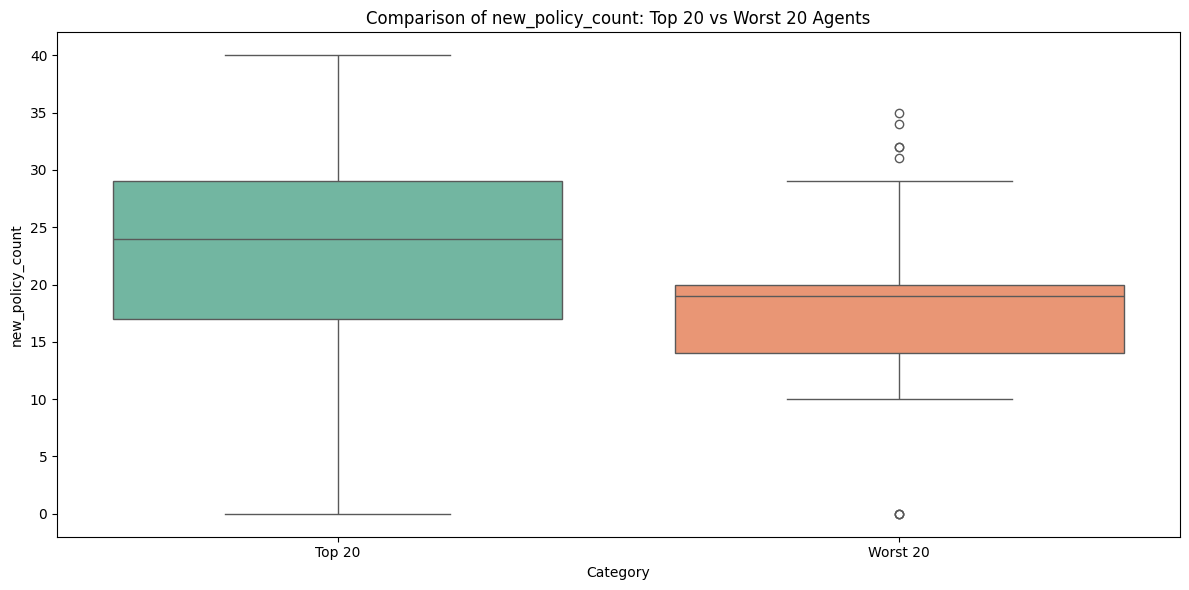

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


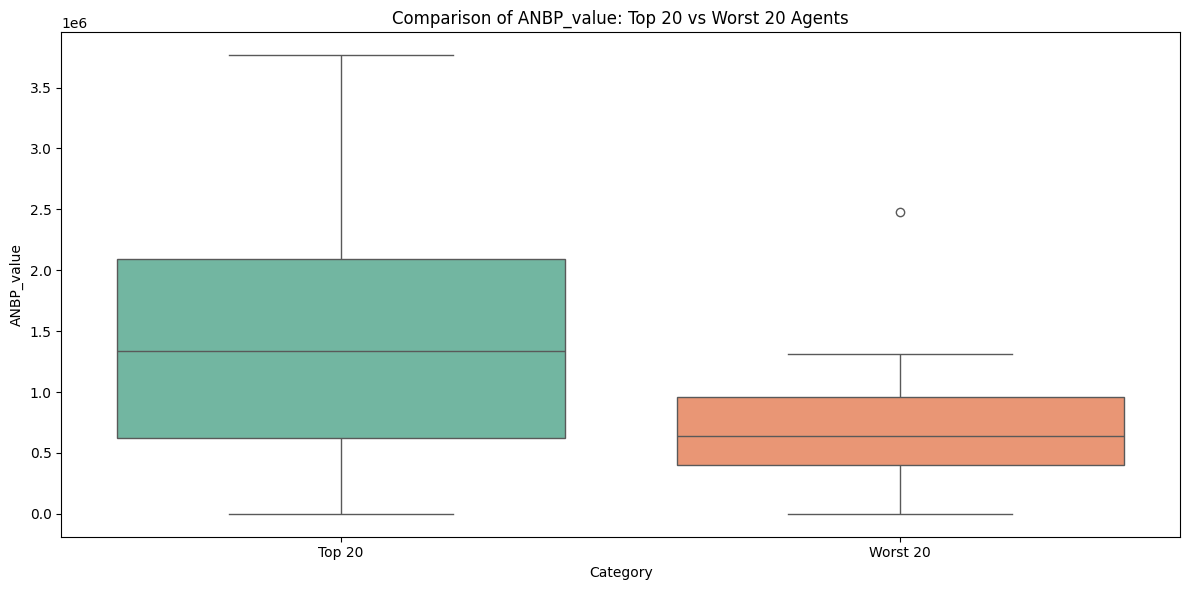

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


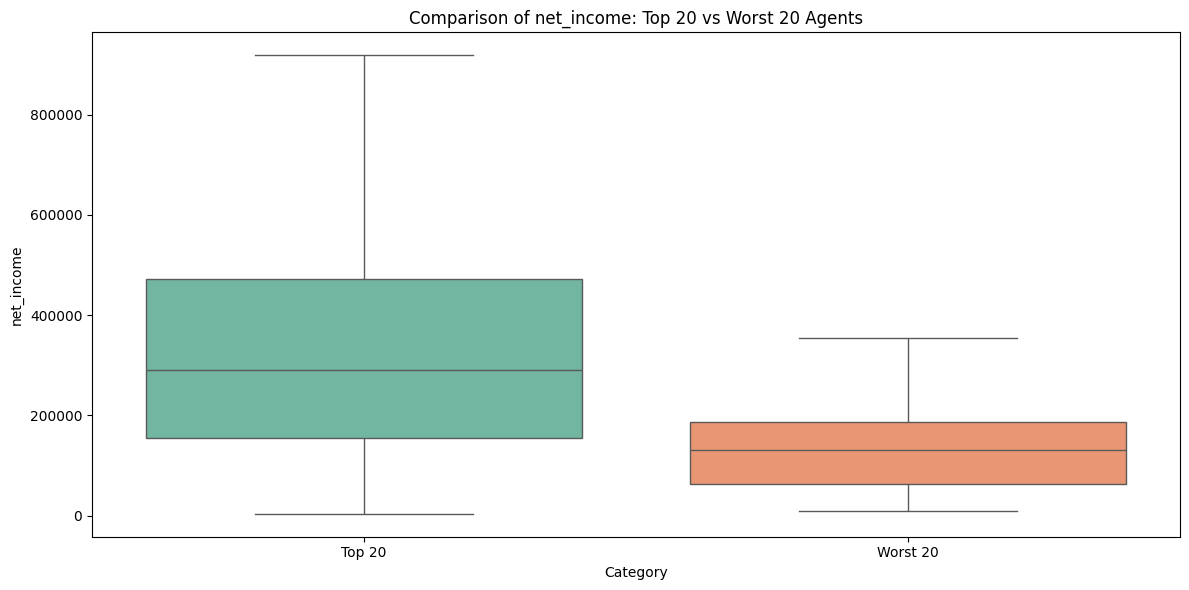

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


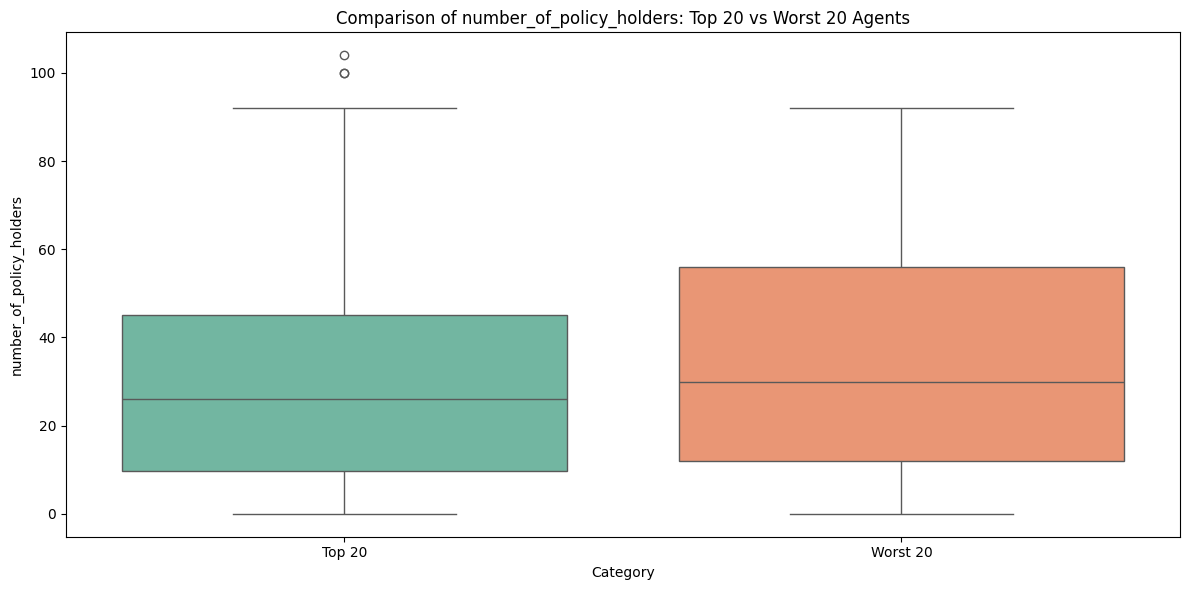

<ipython-input-626-38acf6cca557>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


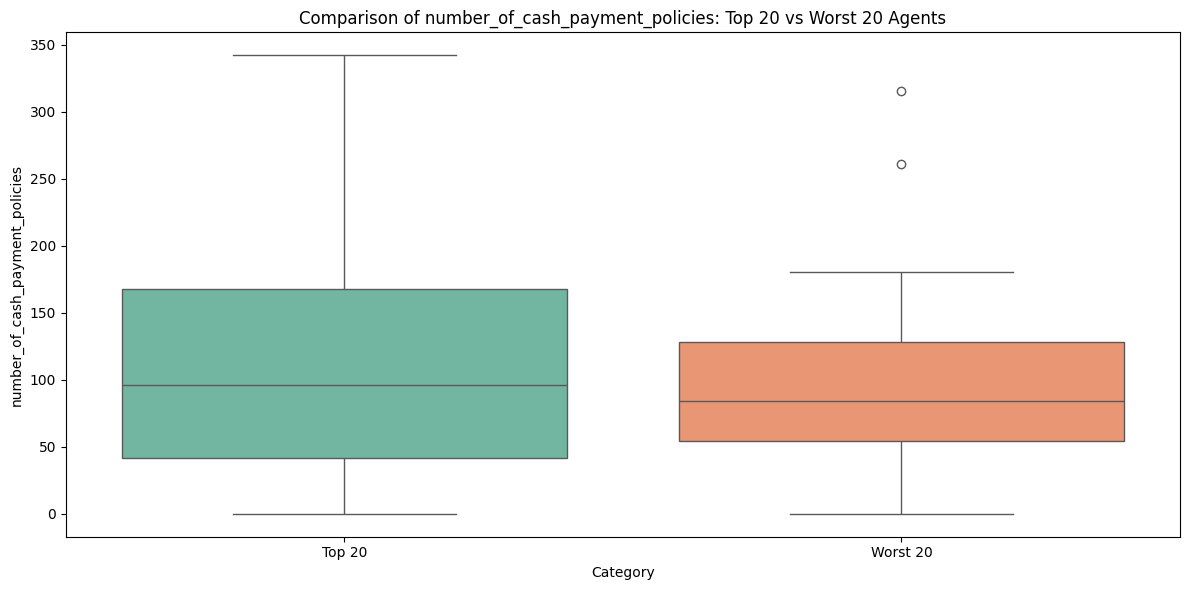

In [626]:
# Drop non-numeric or ID columns
exclude = ['row_id', 'agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month']
numerical_cols = [col for col in combined_agents_earning.columns if combined_agents_earning[col].dtype != 'object' and col not in exclude]

# Plot boxplots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')
    plt.title(f'Comparison of {col}: Top 20 vs Worst 20 Agents')
    plt.xlabel('Category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

From the above analysis:

combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `new_policy_count` between the top-performing and least-performing agents.

- **New Policy Count**:  
    There is a clear difference between the top agents and the worst agents, as observed in the visualization. The `new_policy_count` of top agents is significantly higher than that of the worst agents.

- **Agent Age**:  
    Age does not appear to play a significant role in the performance of agents.

- **Unique Proposals**:  
    Features such as `unique_proposals_last_7_days`, `unique_proposals_last_15_days`, and `unique_proposals_last_21_days` play a crucial role. Top agents have significantly higher values for these features compared to the worst agents.

- **Unique Quotations**:  
    The distribution of `unique_quotations_last_15_days` for top agents is noticeably larger than that of the worst agents. Similarly, `unique_quotations` also plays an important role.

- **ANBP Value**:  
    The `ANBP_value` has a small but noticeable impact on the performance of agents.

- **Number of Policy Holders**:  
    The distribution of `number_of_policy_holders` (mean) for top agents is lower than that of the worst agents.

- **Number of Cash Payment Policies**:  
    The `number_of_cash_payment_policies` is significantly higher for top agents compared to the worst agents.


Combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `net_income` between the top-performing and least-performing agents.

The comparison of `net_income` provides clear insights. From this analysis, we can derive actionable strategies for the worst-performing agents to improve their performance and income.

Key observations:

- **Age**: Agent age does not appear to have a significant impact on performance.
- **Unique Proposals**: The `unique_proposals_last_21_days` and overall `unique_proposals` are significantly higher for top-performing agents compared to the worst-performing agents.
- **Unique Quotations**: The distribution of `unique_quotations_last_15_days` and overall `unique_quotations` is higher for top-performing agents, both in terms of mean and distribution.
- **New Policy Count**: This metric plays a significant role, with top-performing agents having a much higher `new_policy_count` than the worst-performing agents.
- **ANBP Value**: The `ANBP_value` shows a higher distribution and mean for top-performing agents.
- **Number of Cash Payment Policies**: The distribution of `number_of_cash_payment_policies` is significantly higher for top-performing agents.

The term "distribution" here refers to the spread of values across the dataset.


# **Part 1 - Predict NILL Agents**

In [627]:
# ----------------------- 1. Imports -----------------------
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, classification_report
from lightgbm import LGBMClassifier

# optional: pip install category_encoders
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder

# ----------------------- 2. Load --------------------------
df = pd.read_csv("train_storming_round.csv")

# ----------------------- 3. Dates -------------------------
date_cols = ["agent_join_month", "first_policy_sold_month", "year_month"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format="%m/%d/%Y")

# Preprocessing data
# Outlier removal
# Remove outliers from all numeric columns
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the IQR for numeric columns only
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from all numeric columns
df = df[~((numeric_columns < (Q1 - 3 * IQR)) | (numeric_columns > (Q3 + 3 * IQR))).any(axis=1)]

# engineered durations
df["agent_tenure_months"] = (df["year_month"] - df["agent_join_month"]).dt.days // 30
df["months_since_first_sale"] = (
    df["year_month"] - df["first_policy_sold_month"]
).dt.days // 30
df["calendar_month"] = df["year_month"].dt.month
df["is_first_month"] = (df["agent_tenure_months"] == 0).astype(int)

# Drop raw index & raw date fields if you want
df = df.drop(columns=["row_id"])

# ----------------------- 4. Target Engineering (New) ------------------------
# Sort values to ensure correct shift operation within each agent's history
df.sort_values(by=["agent_code", "year_month"], inplace=True)

# Get the new_policy_count for the next month
df["new_policy_count_next_month"] = df.groupby("agent_code")["new_policy_count"].shift(
    -1
)

# Drop rows where next_month_new_policy_count is NaN (i.e., the last month for each agent)
# as we can't determine their NILL status for the subsequent month from historical data.
df.dropna(subset=["new_policy_count_next_month"], inplace=True)

# Define the target: 1 if NILL next month, 0 otherwise
df["one_month_nill"] = (df["new_policy_count_next_month"] == 0).astype(int)

# Clean up the helper column
df = df.drop(columns=["new_policy_count_next_month"])

# ----------------------- 4. Target ------------------------
TARGET = "one_month_nill"  # This now refers to the engineered target
y = df[TARGET]
X = df.drop(columns=[TARGET])

# ----------------------- 5. Column buckets ---------------
numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats = ["agent_code"]  # the only discreet string after drops

# ----------------------- 6. Transformers -----------------
numeric_pipe = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        ("scale", RobustScaler()),
    ]
)

# choose ONE of the following encoders
categorical_pipe = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("encode", TargetEncoder()),  # or OrdinalEncoder(...)
    ]
)

preprocess = ColumnTransformer(
    [
        ("num", numeric_pipe, numeric_feats),
        ("cat", categorical_pipe, categorical_feats),
    ],
    remainder="drop",
).set_output(
    transform="pandas"
)  # Added to output pandas DataFrame

# ----------------------- 7. Model ------------------------
# Calculate scale_pos_weight for class imbalance
# Using the counts from the previous run's log: positive: 1147, negative: 10375
# This calculation should ideally be done on y_train after the split,
# but for now, using the full dataset's approximate ratio.
# A more precise way would be to calculate it from y_train before fitting.
# For simplicity in this step, we'll use the approximate global ratio.
# scale_pos_weight_value = 10375 / 1147  # approx 9.045

# Let's calculate it from y_train for better accuracy in the training phase
# This part will be executed during the training step, so we define the model
# and then update scale_pos_weight before fitting.
# However, for simplicity of this edit, I will hardcode based on previous full dataset counts.
# A better approach would be to pass it dynamically or calculate after split.

model = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=-1,  # let it choose
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary",
    random_state=42,
    # scale_pos_weight=scale_pos_weight_value # Add this for imbalance
    # Dynamically calculating scale_pos_weight after split is better.
    # For now, let's adjust the fit call or use a placeholder that gets updated.
    # The simplest change for now is to hardcode it based on the full dataset's initial proportion.
    # A more robust solution would calculate this from y_train.
)

clf = Pipeline([("prep", preprocess), ("lgbm", model)])

# ----------------------- 8. Train / test -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Calculate scale_pos_weight using y_train
scale_pos_weight_value = (y_train.shape[0] - y_train.sum()) / y_train.sum()
clf.named_steps["lgbm"].set_params(scale_pos_weight=scale_pos_weight_value)

clf.fit(X_train, y_train)

# ----------------------- 9. Eval -------------------------
pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC‑AUC:", roc_auc_score(y_test, pred_proba).round(4))
print(classification_report(y_test, (pred_proba > 0.5).astype(int)))

# ----------------------- 10. Predict on Test Data & Create Submission File -----------------------
# Load test data
df_test = pd.read_csv("test_storming_round.csv")

# Store row_ids for submission
test_row_ids = df_test["row_id"]

# Preprocess test data (similar to training data)
for col in date_cols:  # date_cols defined in section 3
    df_test[col] = pd.to_datetime(df_test[col], format="%m/%d/%Y")

df_test["agent_tenure_months"] = (
    df_test["year_month"] - df_test["agent_join_month"]
).dt.days // 30
df_test["months_since_first_sale"] = (
    df_test["year_month"] - df_test["first_policy_sold_month"]
).dt.days // 30
df_test["calendar_month"] = df_test["year_month"].dt.month
df_test["is_first_month"] = (df_test["agent_tenure_months"] == 0).astype(int)

# The test data is for predicting the NILL status for the month *after* the last year_month in the test set.
# The features used for prediction should be those available up to the last year_month.
# No target engineering is needed for the test set as we are predicting the target.

X_submission = df_test.drop(columns=["row_id"])  # Drop row_id before prediction

# Ensure X_submission has the same columns in the same order as X_train (excluding the target)
# The ColumnTransformer will handle selection of numeric_feats and categorical_feats

# Predict probabilities on the test set
submission_pred_proba = clf.predict_proba(X_submission)[:, 1]

# Convert probabilities to binary predictions (0 or 1) using a 0.5 threshold
submission_pred_binary = (submission_pred_proba > 0.5).astype(int)

# Create submission DataFrame
submission_df = pd.DataFrame(
    {
        "row_id": test_row_ids,
        "target_column": submission_pred_binary,
    }  # Use binary predictions
)

# Save submission file
submission_df.to_csv("submission.csv", index=False)
print("\nSubmission file created: submission.csv")

[LightGBM] [Info] Number of positive: 1114, number of negative: 9968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 11082, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100523 -> initscore=-2.191423
[LightGBM] [Info] Start training from score -2.191423
ROC‑AUC: 0.4986
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2493
           1       0.08      0.03      0.04       278

    accuracy                           0.87      2771
   macro avg       0.49      0.50      0.49      2771
weighted avg       0.82      0.87      0.84      2771


Submission file created: submission.csv


# **Part 2 - Monitor and Improve Existing Agent Performance**

In [628]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13853 entries, 8 to 13905
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       13853 non-null  object        
 1   agent_age                        13853 non-null  int64         
 2   agent_join_month                 13853 non-null  datetime64[ns]
 3   first_policy_sold_month          13853 non-null  datetime64[ns]
 4   year_month                       13853 non-null  datetime64[ns]
 5   unique_proposals_last_7_days     13853 non-null  int64         
 6   unique_proposals_last_15_days    13853 non-null  int64         
 7   unique_proposals_last_21_days    13853 non-null  int64         
 8   unique_proposal                  13853 non-null  int64         
 9   unique_quotations_last_7_days    13853 non-null  int64         
 10  unique_quotations_last_15_days   13853 non-null  int64         

In [630]:
df.describe()

agent_age               agent_join_month  \
count  13853.000000                          13853   
mean      40.605789  2021-05-13 00:22:52.121562112   
min       20.000000            2019-04-01 00:00:00   
25%       31.000000            2020-03-01 00:00:00   
50%       42.000000            2021-04-01 00:00:00   
75%       51.000000            2022-06-01 00:00:00   
max       60.000000            2024-06-01 00:00:00   
std       11.697488                            NaN   

             first_policy_sold_month                     year_month  \
count                          13853                          13853   
mean   2023-04-20 13:29:20.629466368  2023-10-16 15:40:00.433119232   
min              2022-01-01 00:00:00            2023-01-01 00:00:00   
25%              2022-10-01 00:00:00            2023-06-01 00:00:00   
50%              2023-06-01 00:00:00            2023-11-01 00:00:00   
75%              2023-11-01 00:00:00            2024-03-01 00:00:00   
max              2024-04-01 00:00:00            2024-07-01 00:00:00   
std                              NaN                            NaN   

       unique_proposals_last_7_days  unique_proposals_last_15_days  \
count                  13853.000000                   13853.000000   
mean                       1.484227                       2.949397   
min                        0.000000                       0.000000   
25%                        0.000000                       1.000000   
50%                        1.000000                       3.000000   
75%                        2.000000                       5.000000   
max                        3.000000                       6.000000   
std                        1.118834                       2.001543   

       unique_proposals_last_21_days  unique_proposal  \
count                   13853.000000     13853.000000   
mean                        9.798166        17.201473   
min                         0.000000         1.000000   
25%                         5.000000        12.000000   
50%                        10.000000        17.000000   
75%                        15.000000        22.000000   
max                        20.000000        34.000000   
std                         5.962280         6.460741   

       unique_quotations_last_7_days  unique_quotations_last_15_days  ...  \
count                   13853.000000                    13853.000000  ...   
mean                        1.986645                        2.990616  ...   
min                         0.000000                        0.000000  ...   
25%                         1.000000                        1.000000  ...   
50%                         2.000000                        3.000000  ...   
75%                         3.000000                        5.000000  ...   
max                         4.000000                        6.000000  ...   
std                         1.423994                        1.997883  ...   

       new_policy_count    ANBP_value     net_income  \
count      13853.000000  1.385300e+04   13853.000000   
mean          19.907096  9.805555e+05  214527.436368   
min            0.000000  0.000000e+00    1160.000000   
25%           15.000000  3.372180e+05   91000.000000   
50%           21.000000  8.760450e+05  183957.000000   
75%           27.000000  1.504916e+06  309543.000000   
max           41.000000  3.372984e+06  665067.000000   
std            9.349077  7.565131e+05  153708.229863   

       number_of_policy_holders  number_of_cash_payment_policies  \
count              13853.000000                     13853.000000   
mean                  30.753483                        99.039197   
min                    0.000000                         0.000000   
25%                   12.000000                        38.000000   
50%                   28.000000                        88.000000   
75%                   48.000000                       150.000000   
max                  100.000000                       320.00000

In [631]:
data_test = pd.read_csv("test_storming_round.csv")
data_test.head()

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   de9a845f         43         6/1/2020                4/1/2022   
1       2   1450745b         32         5/1/2019                8/1/2022   
2       3   5c4dd08c         52         6/1/2019                6/1/2022   
3       4   3c7a8b50         21         5/1/2021                9/1/2023   
4       5   3dd0c2a1         33         9/1/2022               11/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   9/1/2024                             0                              2   
1   9/1/2024                             1                              3   
2   9/1/2024                             2                              6   
3   9/1/2024                             1                              6   
4   9/1/2024                             0                              4   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                             12               17  ...                 14   
1                              4               13  ...                 12   
2                             17               27  ...                 21   
3                             17               26  ...                 15   
4                              2                8  ...                 14   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             6                              9   
1                             2                              2   
2                             5                              6   
3                             3                              2   
4                             5                              4   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              5                20                24   
1                              5                 9                14   
2                             10                21                34   
3                             10                15                33   
4                              6                15                15   

   ANBP_value  net_income  number_of_policy_holders  \
0      511320       86955                         0   
1      296660       55062                         9   
2      833544      224429                         0   
3     2972409      439159                        15   
4      168150       18195                        60   

   number_of_cash_payment_policies  
0                               48  
1                               56  
2                               34  
3                               33  
4                               90  

[5 rows x 23 columns]

In [632]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           914 non-null    int64 
 1   agent_code                       914 non-null    object
 2   agent_age                        914 non-null    int64 
 3   agent_join_month                 914 non-null    object
 4   first_policy_sold_month          914 non-null    object
 5   year_month                       914 non-null    object
 6   unique_proposals_last_7_days     914 non-null    int64 
 7   unique_proposals_last_15_days    914 non-null    int64 
 8   unique_proposals_last_21_days    914 non-null    int64 
 9   unique_proposal                  914 non-null    int64 
 10  unique_quotations_last_7_days    914 non-null    int64 
 11  unique_quotations_last_15_days   914 non-null    int64 
 12  unique_quotations_last_21_days   914

In [633]:
data_test.describe()

row_id   agent_age  unique_proposals_last_7_days  \
count  914.000000  914.000000                    914.000000   
mean   457.500000   40.506565                      1.540481   
std    263.993371   11.698497                      1.120848   
min      1.000000   20.000000                      0.000000   
25%    229.250000   31.000000                      1.000000   
50%    457.500000   41.000000                      2.000000   
75%    685.750000   51.000000                      3.000000   
max    914.000000   60.000000                      3.000000   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                     914.000000                     914.000000   
mean                        2.903720                       9.798687   
std                         1.974517                       5.999722   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   

       unique_proposal  unique_quotations_last_7_days  \
count       914.000000                     914.000000   
mean         17.318381                       2.096280   
std           6.695894                       1.383492   
min           2.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          23.000000                       3.000000   
max          33.000000                       4.000000   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                      914.000000                      914.000000   
mean                         2.994530                        4.450766   
std                          1.995332                        2.911676   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   

       unique_quotations  unique_customers_last_7_days  \
count         914.000000                    914.000000   
mean           13.928884                      3.088621   
std             4.592290                      1.595387   
min             2.000000                      0.000000   
25%            11.000000                      2.000000   
50%            14.000000                      3.000000   
75%            17.000000                      4.000000   
max            30.000000                      6.000000   

       unique_customers_last_15_days  unique_customers_last_21_days  \
count                     914.000000                     914.000000   
mean                        5.025164                       7.405908   
std                         2.402632                       3.537997   
min                         0.000000                       0.000000   
25%                         3.000000                       5.000000   
50%                         5.000000                       7.000000   
75%                         7.000000                      10.000000   
max                        10.000000                      15.000000   

       unique_customers  new_policy_count    ANBP_value     net_income  \
count        914.000000        914.000000  9.140000e+02     914.000000   
mean          15.519694         20.114880  1.008371e+06  226420.912473   
std            4.767559          9.636944  8.221544e+05  175909.860712   
min            3.000000          0.000000  0.000000e+00    2396.000000   
25%           12.000000         14.250000  3.419635e+05   92338.750000   
50%           15.000000 

In [634]:
df['train_flag'] = 1
data_test['train_flag'] = 0
all_data = pd.concat([df,data_test], axis = 0)
all_data.head()

agent_code  agent_age     agent_join_month first_policy_sold_month  \
8      003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
958    003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
1761   003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
2577   003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
2708   003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   

               year_month  unique_proposals_last_7_days  \
8     2023-01-01 00:00:00                             2   
958   2023-02-01 00:00:00                             3   
1761  2023-03-01 00:00:00                             0   
2577  2023-04-01 00:00:00                             2   
2708  2023-05-01 00:00:00                             3   

      unique_proposals_last_15_days  unique_proposals_last_21_days  \
8                                 2                              0   
958                               2                             20   
1761                              2                             19   
2577                              6                             11   
2708                              3                              7   

      unique_proposal  unique_quotations_last_7_days  ...  net_income  \
8                   8                              0  ...      327407   
958                30                              0  ...      408662   
1761               23                              2  ...      287226   
2577               21                              3  ...      381203   
2708               15                              4  ...      471548   

      number_of_policy_holders  number_of_cash_payment_policies  \
8                            5                                0   
958                         57                              217   
1761                        20                              243   
2577                        60                              176   
2708                         0                              180   

      agent_tenure_months  months_since_first_sale  calendar_month  \
8                    29.0                      1.0             1.0   
958                  30.0                      2.0             2.0   
1761                 31.0                      3.0             3.0   
2577                 32.0                      4.0             4.0   
2708                 33.0                      5.0             5.0   

      is_first_month  one_month_nill  train_flag  row_id  
8                0.0             0.0           1     NaN  
958              0.0             0.0           1     NaN  
1761             0.0             0.0           1     NaN  
2577             0.0             0.0           1     NaN  
2708             0.0             1.0           1     NaN  

[5 rows x 29 columns]

In [635]:
all_data['year_month']

8       2023-01-01 00:00:00
958     2023-02-01 00:00:00
1761    2023-03-01 00:00:00
2577    2023-04-01 00:00:00
2708    2023-05-01 00:00:00
               ...         
909                9/1/2024
910                9/1/2024
911                9/1/2024
912                9/1/2024
913                9/1/2024
Name: year_month, Length: 14767, dtype: object

In [636]:
flag = all_data['train_flag']

In [637]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14767 entries, 8 to 913
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   agent_code                       14767 non-null  object 
 1   agent_age                        14767 non-null  int64  
 2   agent_join_month                 14767 non-null  object 
 3   first_policy_sold_month          14767 non-null  object 
 4   year_month                       14767 non-null  object 
 5   unique_proposals_last_7_days     14767 non-null  int64  
 6   unique_proposals_last_15_days    14767 non-null  int64  
 7   unique_proposals_last_21_days    14767 non-null  int64  
 8   unique_proposal                  14767 non-null  int64  
 9   unique_quotations_last_7_days    14767 non-null  int64  
 10  unique_quotations_last_15_days   14767 non-null  int64  
 11  unique_quotations_last_21_days   14767 non-null  int64  
 12  unique_quotations        

In [638]:
all_data.describe()

agent_age  unique_proposals_last_7_days  \
count  14767.000000                  14767.000000   
mean      40.599648                      1.487709   
std       11.697179                      1.119003   
min       20.000000                      0.000000   
25%       31.000000                      0.000000   
50%       41.000000                      1.000000   
75%       51.000000                      2.000000   
max       60.000000                      3.000000   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                   14767.000000                   14767.000000   
mean                        2.946570                       9.798199   
std                         1.999845                       5.964400   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   

       unique_proposal  unique_quotations_last_7_days  \
count     14767.000000                   14767.000000   
mean         17.208709                       1.993431   
std           6.475371                       1.421721   
min           1.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          22.000000                       3.000000   
max          34.000000                       4.000000   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                    14767.000000                    14767.000000   
mean                         2.990858                        4.461163   
std                          1.997658                        2.871338   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   

       unique_quotations  unique_customers_last_7_days  ...     net_income  \
count       14767.000000                  14767.000000  ...   14767.000000   
mean           13.744159                      2.997224  ...  215263.580280   
std             4.479364                      1.641656  ...  155194.453742   
min             2.000000                      0.000000  ...    1160.000000   
25%            11.000000                      2.000000  ...   91037.500000   
50%            13.000000                      3.000000  ...  184097.000000   
75%            17.000000                      4.000000  ...  309798.000000   
max            30.000000                      6.000000  ...  818544.000000   

       number_of_policy_holders  number_of_cash_payment_policies  \
count              14767.000000                     14767.000000   
mean                  30.764475                        99.246360   
std                   24.384537                        73.435903   
min                    0.000000                         0.000000   
25%                   12.000000                        38.000000   
50%                   28.000000                        88.000000   
75%                   48.000000                       150.000000   
max                  120.000000                       333.000000   

       agent_tenure_months  months_since_first_sale  calendar_month  \
count         13853.000000             13853.000000    13853.000000   
mean             29.129936                 5.648668        5.629250   
std              16.316711                 9.576519        3.216285   
min               0.000000               -16.000000        1.000000   
25%              15.000000                -1.0000

In [639]:
# Outlier Removal
# Ensure that only numeric columns are used for outlier detection
numeric_columns = all_data.select_dtypes(include=['number'])

# Calculate IQR for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Set a stricter threshold to detect outliers
outlier_threshold_lower = Q1 - 3 * IQR  # You can increase this factor to 3 or more for stricter removal
outlier_threshold_upper = Q3 + 3 * IQR

# Remove outliers from the dataframe
all_data = all_data[~((numeric_columns < outlier_threshold_lower) | (numeric_columns > outlier_threshold_upper)).any(axis=1)]

## **Key Perfomance Indicators(KPIs)**


* KPIs (Key Performance Indicators) are measurable values that helps to assess each agent’s performance.
* KPIs can be used to:
    * Classify agents (High / Medium / Low performers)
    * Track improvements over time
    * Identify what drives high performance
    * Tailor interventions for improvement


### 📌 Key Performance Indicators (KPIs) for Agent Categorization

| **KPI Name**                  | **Description**                              | **Why It's Important**                                      |
|------------------------------|----------------------------------------------|-------------------------------------------------------------|
| `new_policy_count`           | Number of new policies sold in a month       | Directly shows agent sales success                          |
| `ANBP_value`                 | Annualized New Business Premium              | Indicates the monetary value of business brought in         |
| `net_income`                 | Agent’s earned income                        | Reflects commission + performance                           |
| `unique_customers`           | Total customers engaged                      | Higher reach may indicate strong sales potential            |
| `number_of_policy_holders`   | Total policies currently maintained          | Shows client retention or long-term relationships           |


The number of proposals and quotations count as sales activity indicators

In [640]:
selected_kpis = [
    "new_policy_count",
    "ANBP_value",
    "net_income",
    "unique_customers",
    "number_of_policy_holders"
]
data_kpi = all_data[selected_kpis].copy()
#data_kpi['train_flag'] = flag # This is used only to identify the train and testing data. This is not a KPI.

In [641]:
data_kpi.head()

new_policy_count  ANBP_value  net_income  unique_customers  \
8                    0           0      327407                 5   
958                 31     2408297      408662                19   
1761                27     1901097      287226                20   
2577                22     1635788      381203                20   
3978                 0           0       44510                19   

      number_of_policy_holders  
8                            5  
958                         57  
1761                        20  
2577                        60  
3978                        38

In [642]:
data_kpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12437 entries, 8 to 13905
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   new_policy_count          12437 non-null  int64
 1   ANBP_value                12437 non-null  int64
 2   net_income                12437 non-null  int64
 3   unique_customers          12437 non-null  int64
 4   number_of_policy_holders  12437 non-null  int64
dtypes: int64(5)
memory usage: 583.0 KB


**Correlation Analysis to remove redundancy**

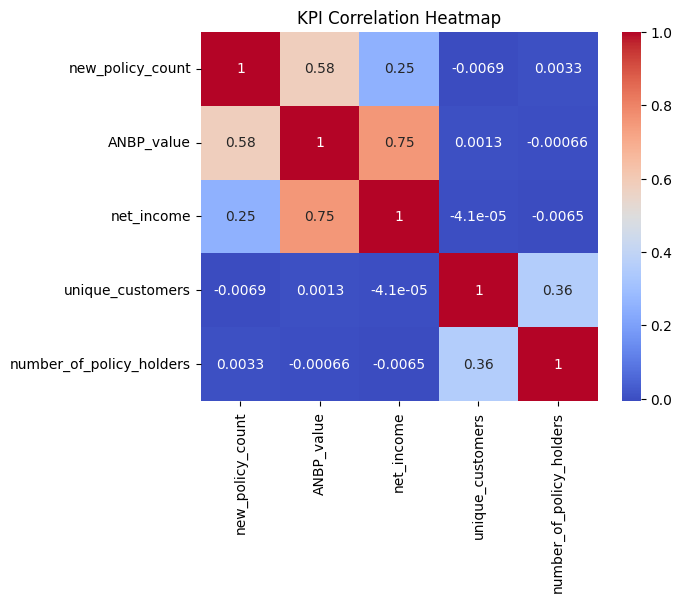

In [643]:
sns.heatmap(data_kpi[selected_kpis].corr(), annot=True, cmap="coolwarm")
plt.title("KPI Correlation Heatmap")
plt.show()

There is no strong correlation among the features

**Variance Check**

This is to make sure we are not including columns with very little variation because they won’t help differentiate agents.

In [644]:
data_kpi[selected_kpis].std().sort_values()


unique_customers                 4.515726
new_policy_count                 9.348015
number_of_policy_holders        24.313986
net_income                  153761.904416
ANBP_value                  756968.296752
dtype: float64

There is no columns with a near-zero standard derivation

**Data Preprocessing**

In [645]:
data_kpi_dropped = data_kpi.copy()

scaler = StandardScaler()
data_kpi_scaled = scaler.fit_transform(data_kpi_dropped)
data_kpi_scaled

array([[-2.13141474, -1.29626657,  0.73471442, -2.31662064, -1.0586218 ],
       [ 1.18493072,  1.88536446,  1.26318255,  0.78378099,  1.08015094],
       [ 0.75701518,  1.21529625,  0.47338431,  1.00523825, -0.44166813],
       ...,
       [ 0.54305741, -0.56027485, -0.73922747,  0.78378099,  1.08015094],
       [-2.13141474, -1.29626657, -0.62327081,  0.56232373,  0.95676021],
       [ 1.39888849, -1.14062632, -1.23355053, -0.98787709,  0.09302506]])

## **Clustering**

### Clustering Algorithm Comparison and Evaluation

In this section, we apply and evaluate four different clustering algorithms—KMeans, Agglomerative Clustering, DBSCAN, and Gaussian Mixture Models—on the scaled KPI data. Each model is assessed using two metrics:
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters (higher is better).
- **Davies-Bouldin Index**: Measures intra-cluster similarity and inter-cluster differences (lower is better).

The data is projected into two principal components using PCA for visualization. Clusters are plotted in 2D space, and centroids (or approximate cluster centers) are highlighted. This comparison helps in identifying the most suitable clustering approach for our agent performance segmentation task.



KMeans

Silhouette Score for KMeans: 0.236
Davies-Bouldin Score for KMeans: 1.417

Agglomerative Clustering

Silhouette Score for Agglomerative Clustering: 0.172
Davies-Bouldin Score for Agglomerative Clustering: 1.493

DBSCAN

Silhouette Score for DBSCAN: -0.226
Davies-Bouldin Score for DBSCAN: 1.273

Gaussian Mixture

Silhouette Score for Gaussian Mixture: 0.205
Davies-Bouldin Score for Gaussian Mixture: 1.519


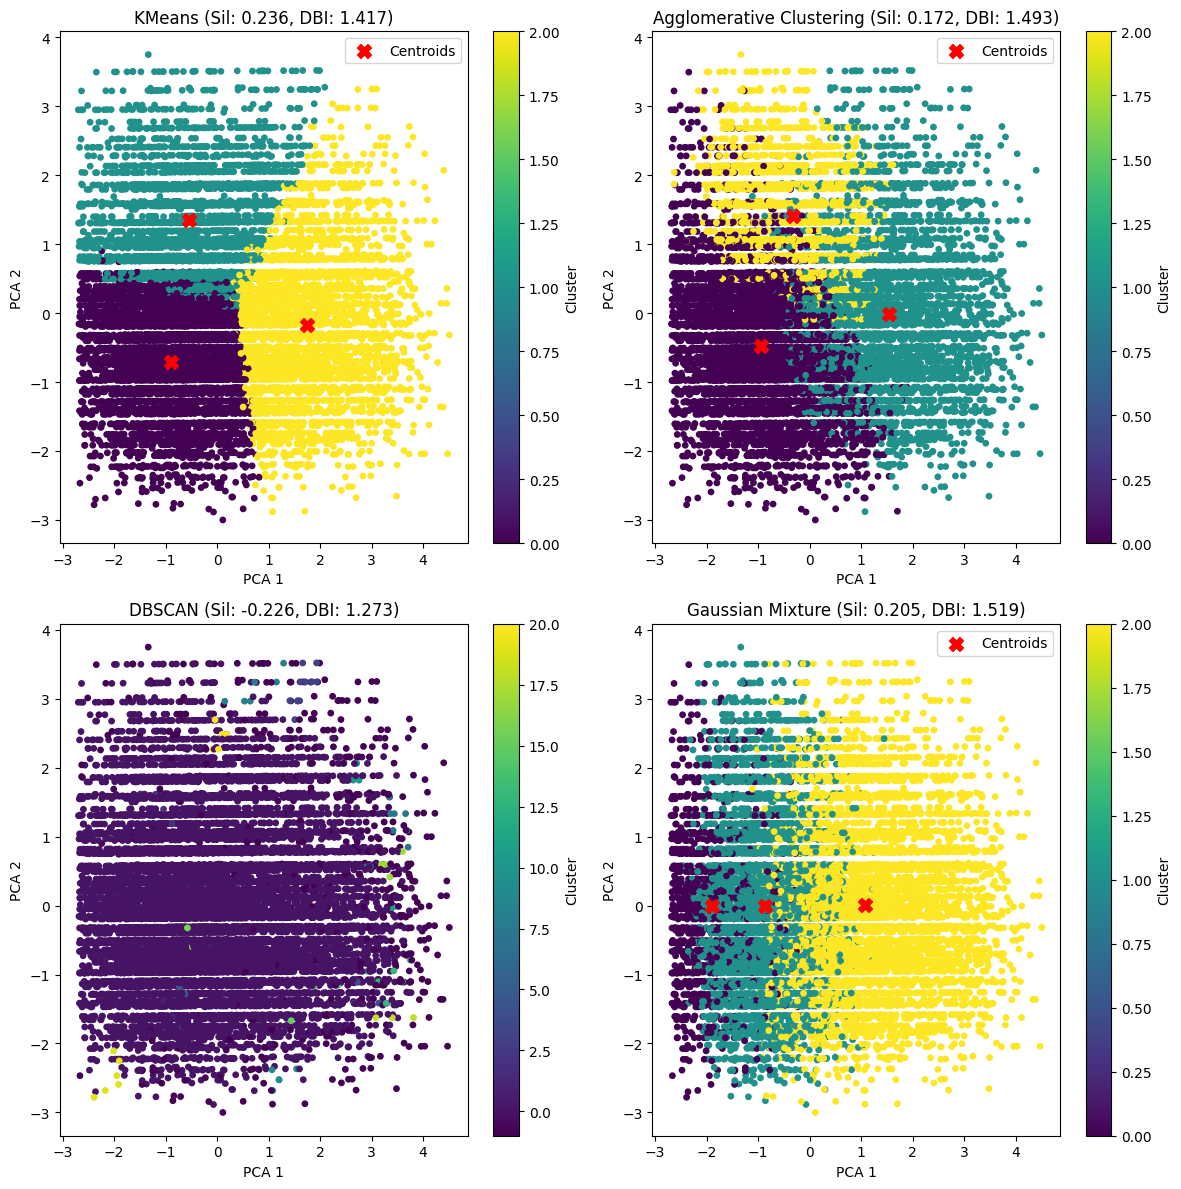

In [646]:
# List of clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),  # Adjust params as needed
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42)
}

# Setting up the plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterated through each model
for i, (name, model) in enumerate(clustering_algorithms.items()):
    print(f"\n{name}\n")

    # Fit the model and get the cluster labels
    if name == "Gaussian Mixture":
        model.fit(data_kpi_scaled)
        labels = model.predict(data_kpi_scaled)
    else:
        labels = model.fit_predict(data_kpi_scaled)

    # Calculated scores
    sil_score = silhouette_score(data_kpi_scaled, labels)
    db_score = davies_bouldin_score(data_kpi_scaled, labels)
    print(f"Silhouette Score for {name}: {sil_score:.3f}")
    print(f"Davies-Bouldin Score for {name}: {db_score:.3f}")

    # PCA transform
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data_kpi_scaled)

    # Got cluster centers and transform to PCA space
    if hasattr(model, 'cluster_centers_'):
        centers = model.cluster_centers_
    elif name == "Gaussian Mixture":
        centers = model.means_
    else:
        # For Agglomerative and DBSCAN, used mean of points per cluster as pseudo-centroids
        centers = np.array([data_kpi_scaled[labels == k].mean(axis=0) for k in np.unique(labels) if k != -1])

    if name != "DBSCAN":  # DBSCAN may contain noise (-1) with no centroids
        centers_pca = pca.transform(centers)

    # Plot
    ax = axes[i]
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=15)
    ax.set_title(f"{name} (Sil: {sil_score:.3f}, DBI: {db_score:.3f})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    plt.colorbar(scatter, ax=ax, label="Cluster")

    # Plot centroids
    if name != "DBSCAN":
        ax.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, marker='X', label='Centroids')
        ax.legend()

plt.tight_layout()
plt.show()


| Algorithm                | Silhouette Score ↑ | Davies-Bouldin Score ↓ |
| ------------------------ | ------------------ | ---------------------- |
| **KMeans**               | **0.238**          | **1.398**              |
| Agglomerative Clustering | 0.158              | 1.756                  |
| DBSCAN                   | -0.154             | 1.363                  |
| Gaussian Mixture         | 0.200              | 1.533                  |


Based on the comparison, **KMeans** demonstrates the most favorable performance on this dataset. It yields the highest Silhouette Score and the lowest Davies-Bouldin Index among the evaluated algorithms.


## **K-Means Clustering**

In [647]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_kpi_scaled)

In [648]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_kpis)
cluster_centers['cluster'] = cluster_centers.index
display(cluster_centers)

new_policy_count    ANBP_value     net_income  unique_customers  \
0         16.239805  5.173838e+05  131527.468575         13.520202   
1         18.387860  7.024332e+05  157315.220941         19.147800   
2         26.444942  1.876356e+06  380794.630927         14.993414   

   number_of_policy_holders  cluster  
0                 17.071642        0  
1                 57.211836        1  
2                 27.005796        2

According to the above results of k-Means,

* **Low performance** - **Cluster 0**
* **Mid performance** - **Cluster 1**
* **High performance** - **Cluster 2**


**Cluster Mapping**

In [649]:
def mapping(data):

    # Mapped clusters to human-readable labels
    cluster_map = {0: "Low", 1: "Mid", 2: "High"}

    data['performance_cluster'] = kmeans_labels
    data["performance_level"] = data["performance_cluster"].map(cluster_map)
    return data


In [650]:
all_data = mapping(all_data)
data_kpi = mapping(data_kpi)

In [651]:
all_data.head()

agent_code  agent_age     agent_join_month first_policy_sold_month  \
8      003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
958    003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
1761   003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
2577   003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   
3978   003c1999         35  2020-08-01 00:00:00     2022-12-01 00:00:00   

               year_month  unique_proposals_last_7_days  \
8     2023-01-01 00:00:00                             2   
958   2023-02-01 00:00:00                             3   
1761  2023-03-01 00:00:00                             0   
2577  2023-04-01 00:00:00                             2   
3978  2023-06-01 00:00:00                             0   

      unique_proposals_last_15_days  unique_proposals_last_21_days  \
8                                 2                              0   
958                               2                             20   
1761                              2                             19   
2577                              6                             11   
3978                              3                              4   

      unique_proposal  unique_quotations_last_7_days  ...  \
8                   8                              0  ...   
958                30                              0  ...   
1761               23                              2  ...   
2577               21                              3  ...   
3978               12                              2  ...   

      number_of_cash_payment_policies  agent_tenure_months  \
8                                   0                 29.0   
958                               217                 30.0   
1761                              243                 31.0   
2577                              176                 32.0   
3978                                0                 34.0   

      months_since_first_sale  calendar_month  is_first_month  one_month_nill  \
8                         1.0             1.0             0.0             0.0   
958                       2.0             2.0             0.0             0.0   
1761                      3.0             3.0             0.0             0.0   
2577                      4.0             4.0             0.0             0.0   
3978                      6.0             6.0             0.0             0.0   

      train_flag  row_id  performance_cluster  performance_level  
8              1     NaN                    0                Low  
958            1     NaN                    2               High  
1761           1     NaN                    2               High  
2577           1     NaN                    2               High  
3978           1     NaN                    1                Mid  

[5 rows x 31 columns]

In [652]:
data_kpi.head()

new_policy_count  ANBP_value  net_income  unique_customers  \
8                    0           0      327407                 5   
958                 31     2408297      408662                19   
1761                27     1901097      287226                20   
2577                22     1635788      381203                20   
3978                 0           0       44510                19   

      number_of_policy_holders  performance_cluster performance_level  
8                            5                    0               Low  
958                         57                    2              High  
1761                        20                    2              High  
2577                        60                    2              High  
3978                        38                    1               Mid

## **Cluster visualization and Analysis**

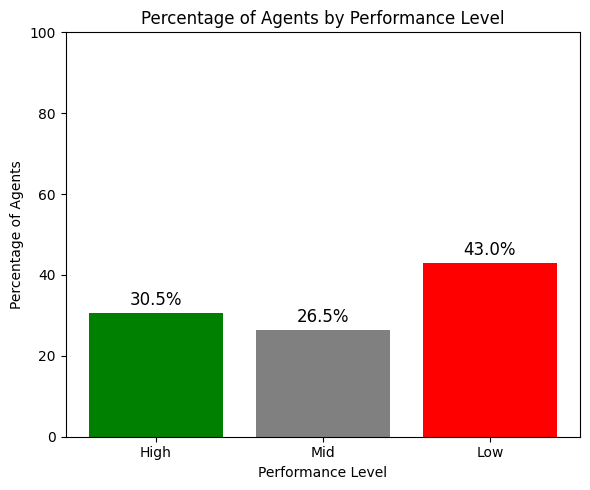

In [653]:
# Counted the number of agents in each performance level
level_counts = all_data['performance_level'].value_counts().reindex(['High', 'Mid', 'Low'], fill_value=0)

# Calculated percentages
total_agents = level_counts.sum()
level_percentages = (level_counts / total_agents) * 100

# Plot the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(level_percentages.index, level_percentages.values, color=['green', 'gray', 'red'])

# Annotated bars with percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=12)

# Formatting
plt.title('Percentage of Agents by Performance Level')
plt.ylabel('Percentage of Agents')
plt.xlabel('Performance Level')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


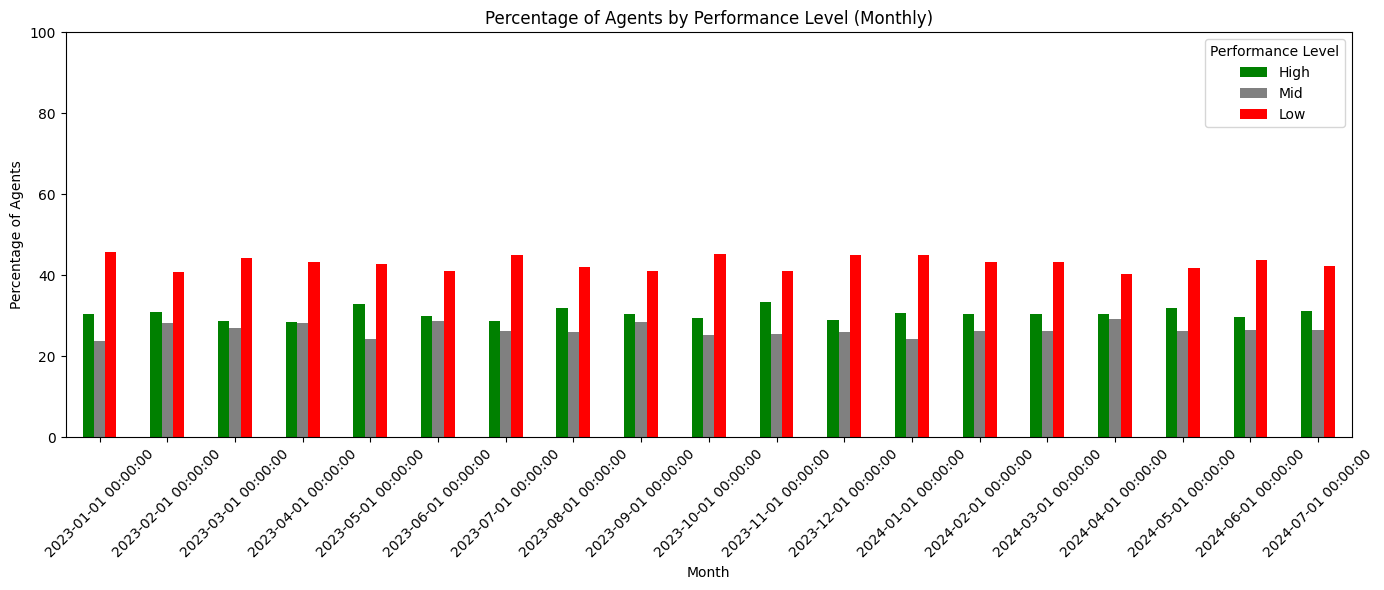

In [654]:
# Converted 'year_month' to datetime format
all_data['year_month'] = pd.to_datetime(all_data['year_month'])

# Count the number of agents in each performance level per month
monthly_level_counts = all_data.groupby(['year_month', 'performance_level']).size().unstack(fill_value=0)

# Sort by 'year_month' to ensure chronological order
monthly_level_counts = monthly_level_counts.sort_index()

# Calculate total agents per month
monthly_level_counts['Total'] = monthly_level_counts.sum(axis=1)

# Calculate percentage of agents per performance level for each month
monthly_percentage = (monthly_level_counts[['High', 'Mid', 'Low']].div(monthly_level_counts['Total'], axis=0)) * 100

# Plot the bar chart for each month
monthly_percentage.plot(kind='bar', stacked=False, figsize=(14, 6), color=['green', 'gray', 'red'])

# Formatting
plt.title('Percentage of Agents by Performance Level (Monthly)')
plt.ylabel('Percentage of Agents')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.legend(title="Performance Level")
plt.show()


In [655]:
data_kpi.groupby('performance_level').mean()

new_policy_count    ANBP_value     net_income  \
performance_level                                                  
High                      26.445205  1.876385e+06  380802.347208   
Low                       16.207928  5.164339e+05  131568.928197   
Mid                       18.440632  7.040550e+05  157254.655633   

                   unique_customers  number_of_policy_holders  \
performance_level                                               
High                      14.986828                 26.991043   
Low                       13.521877                 17.115557   
Mid                       19.156089                 57.181901   

                   performance_cluster  
performance_level                       
High                               2.0  
Low                                0.0  
Mid                                1.0

## **Tracking Progress Over Time**

**Monitoring monthly KPIs**

In [656]:
monthly_performance = all_data.groupby(['year_month', 'performance_level']).agg({
    'new_policy_count': 'mean',
    'ANBP_value': 'mean',
    'net_income': 'mean',
    'unique_customers': 'mean',
    'number_of_policy_holders': 'mean'
}).reset_index()
monthly_performance

year_month performance_level  new_policy_count    ANBP_value  \
0  2023-01-01              High         26.323864  1.872126e+06   
1  2023-01-01               Low         15.977358  5.403081e+05   
2  2023-01-01               Mid         18.891304  7.196064e+05   
3  2023-02-01              High         26.954802  1.846373e+06   
4  2023-02-01               Low         17.098291  5.124236e+05   
5  2023-02-01               Mid         18.378882  6.735757e+05   
6  2023-03-01              High         26.875776  1.894482e+06   
7  2023-03-01               Low         15.578947  5.251767e+05   
8  2023-03-01               Mid         18.708609  6.803092e+05   
9  2023-04-01              High         26.151515  1.849945e+06   
10 2023-04-01               Low         16.848000  5.304684e+05   
11 2023-04-01               Mid         17.453988  7.194158e+05   
12 2023-05-01              High         27.384615  1.946454e+06   
13 2023-05-01               Low         16.299213  4.975198e+05   
14 2023-05-01               Mid         19.236111  7.162263e+05   
15 2023-06-01              High         26.329670  1.825061e+06   
16 2023-06-01               Low         15.036145  4.711587e+05   
17 2023-06-01               Mid         18.224138  7.391189e+05   
18 2023-07-01              High         26.803371  1.834292e+06   
19 2023-07-01               Low         16.278571  5.345221e+05   
20 2023-07-01               Mid         18.591463  6.943222e+05   
21 2023-08-01              High         26.965174  1.870957e+06   
22 2023-08-01               Low         15.729323  4.754661e+05   
23 2023-08-01               Mid         19.103659  7.136017e+05   
24 2023-09-01              High         25.911330  1.863241e+06   
25 2023-09-01               Low         15.556777  4.801629e+05   
26 2023-09-01               Mid         19.465608  7.679699e+05   
27 2023-10-01              High         25.927461  1.868619e+06   
28 2023-10-01               Low         16.855219  5.698038e+05   
29 2023-10-01               Mid         19.066667  7.441123e+05   
30 2023-11-01              High         26.531818  1.856994e+06   
31 2023-11-01               Low         16.503704  5.098932e+05   
32 2023-11-01               Mid         19.245509  6.519177e+05   
33 2023-12-01              High         25.921875  1.819980e+06   
34 2023-12-01               Low         15.929530  4.832935e+05   
35 2023-12-01               Mid         18.883721  7.159643e+05   
36 2024-01-01              High         26.256158  1.919916e+06   
37 2024-01-01               Low         16.341216  5.076885e+05   
38 2024-01-01               Mid         17.737500  6.828670e+05   
39 2024-02-01              High         26.644860  1.894132e+06   
40 2024-02-01               Low         15.419672  4.823282e+05   
41 2024-02-01               Mid         17.614130  6.701764e+05   
42 2024-03-01              High         26.309859  1.897294e+06   
43 2024-03-01               Low         15.990099  5.333693e+05   
44 2024-03-01               Mid         18.353261  7.182792e+05   
45 2024-04-01              High         26.391892  1.886064e+06   
46 2024-04-01               Low         16.286689  5.099719e+05   
47 2024-04-01               Mid         17.740566  6.889533e+05   
48 2024-05-01              High         26.602510  1.886151e+06   
49 2024-05-01               Low         16.423077  5.328738e+05   
50 2024-05-01               Mid         18.101523  7.355504e+05   
51 2024-06-01              High         26.052174  1.901218e+06   
52 2024-06-01               Low         16.794118  5.522678e+05   
53 2024-06-01               Mid         17.296117  6.748034e+05   
54 2024-07-01              High         26.267241  1.892566e+06   
55 2024-07-01               Low         16.810127  5.448734e+05   
56 2024-07-01               Mid         18.853535  6.738432e+05   

       net_income  unique_customers  number_of_policy_holders  
0   391514.965909         15.147727                 

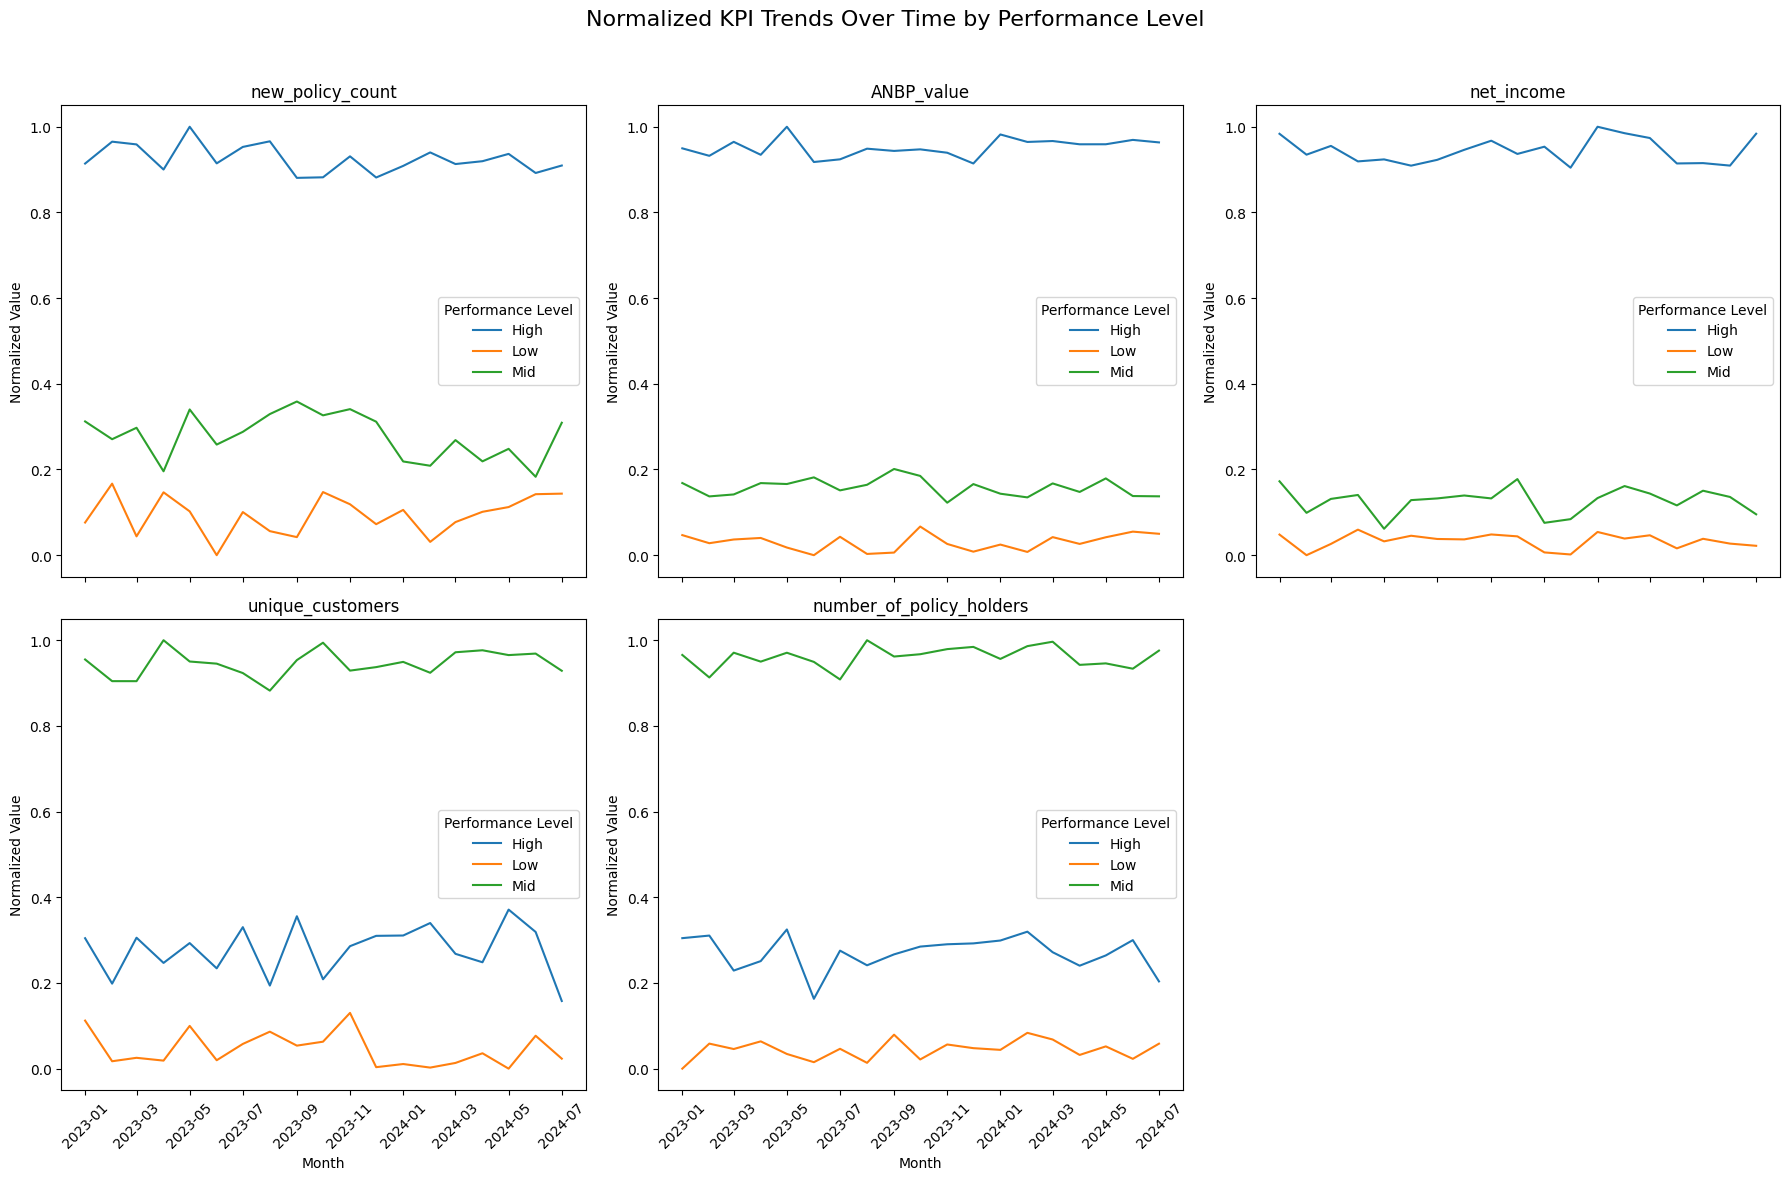

In [657]:
# KPIs to track
kpis = ['new_policy_count', 'ANBP_value', 'net_income', 'unique_customers', 'number_of_policy_holders']

# Normalized the KPIs
normalized_df = monthly_performance.copy()
normalized_df[kpis] = normalized_df[kpis].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

melted = normalized_df.melt(
    id_vars=['year_month', 'performance_level'],
    value_vars=kpis,
    var_name='KPI',
    value_name='Normalized Value'
)

# Plot setup
num_kpis = len(kpis)
cols = 3
rows = (num_kpis + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

for i, kpi in enumerate(kpis):
    ax = axes[i]
    subset = melted[melted['KPI'] == kpi]
    sns.lineplot(data=subset, x='year_month', y='Normalized Value', hue='performance_level', ax=ax)
    ax.set_title(kpi)
    ax.set_xlabel("Month")
    ax.set_ylabel("Normalized Value")
    ax.legend(title='Performance Level')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Normalized KPI Trends Over Time by Performance Level", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


* Agents categorized as high performers tend to exhibit higher values in `new_policy_count`, `ANBP_value`, and `net_income`, indicating stronger business acquisition and revenue generation.
* Mid-level performers generally have higher counts of `unique_customers` and `number_of_policy_holders`, suggesting a broader customer base and policy engagement without necessarily high revenue metrics.
* Agents classified as low performers generally exhibit lower values across all key performance indicators, indicating potential areas for improvement in both customer engagement and revenue generation.



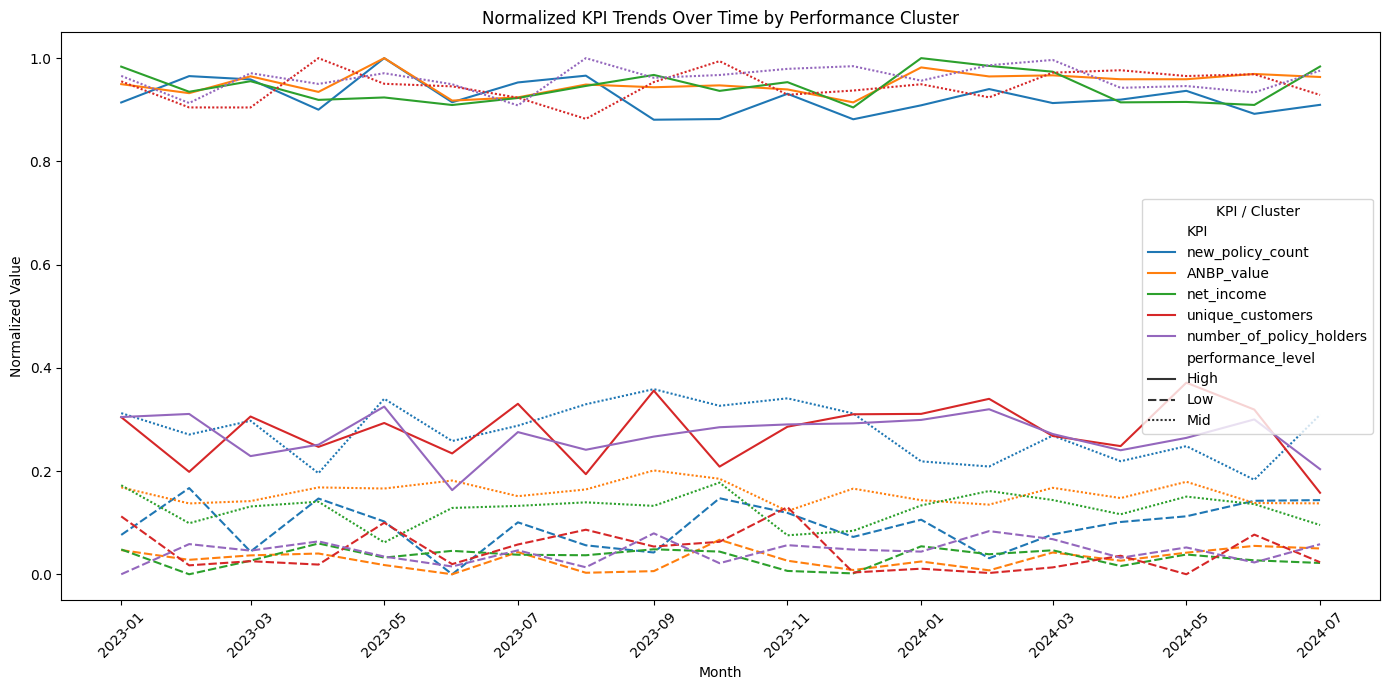

In [658]:
normalized_df = monthly_performance.copy()
normalized_df[kpis] = normalized_df[kpis].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

melted = normalized_df.melt(
    id_vars=['year_month', 'performance_level'],
    value_vars=kpis,
    var_name='KPI',
    value_name='Normalized Value'
)

# Plot all KPIs in one graph
plt.figure(figsize=(14, 7))
sns.lineplot(data=melted, x='year_month', y='Normalized Value', hue='KPI', style='performance_level')
plt.title('Normalized KPI Trends Over Time by Performance Cluster')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.legend(title='KPI / Cluster')
plt.tight_layout()
plt.show()


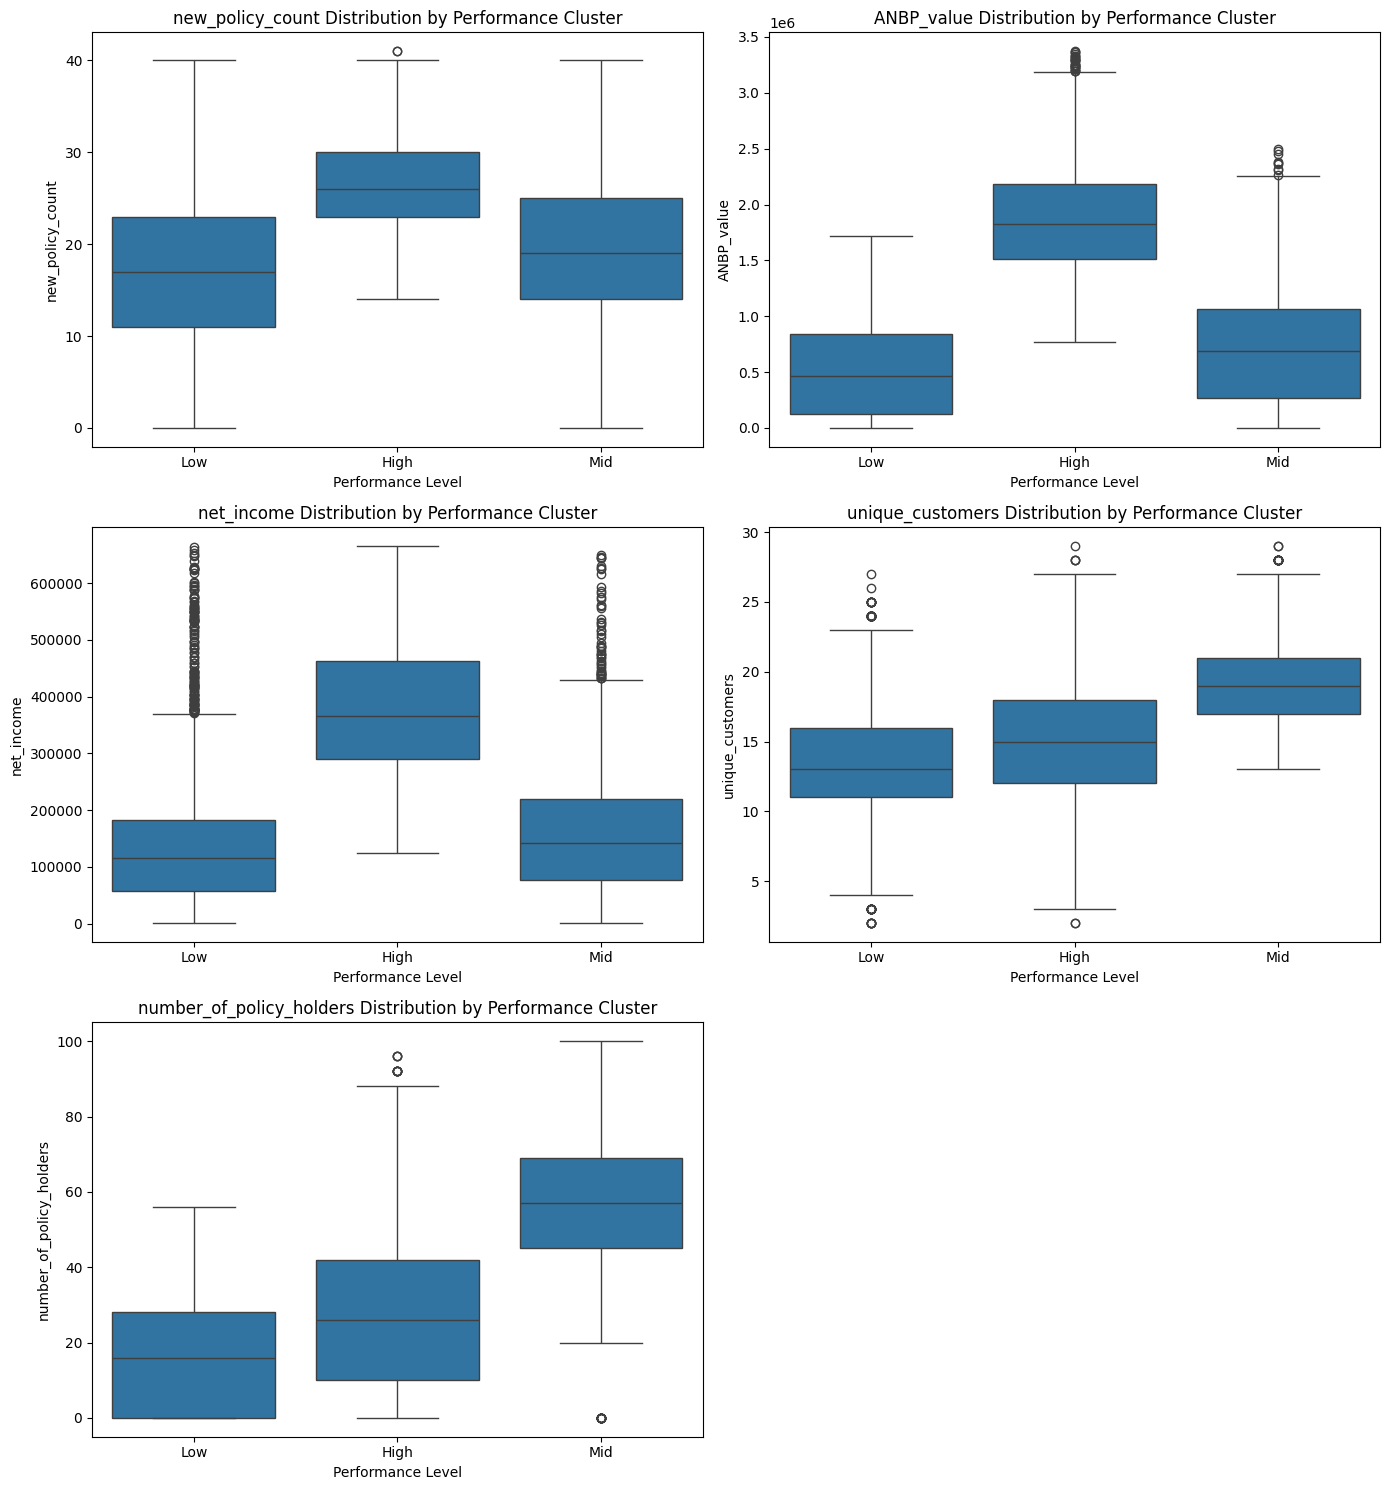

In [659]:
# Set up the subplot grid
n_kpis = len(kpis)
cols = 2
rows = (n_kpis + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Plot each KPI in its subplot
for i, kpi in enumerate(kpis):
    sns.boxplot(data=all_data, x='performance_level', y=kpi, ax=axes[i])
    axes[i].set_title(f'{kpi} Distribution by Performance Cluster')
    axes[i].set_xlabel('Performance Level')
    axes[i].set_ylabel(kpi)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Agent Performance Trends Analysis (Historical vs Current Data)

This section analyzes trends in agent performance by comparing historical and current data. The objective is to understand how agent performance levels (High, Mid, Low) have evolved over time, identify consistent patterns and detect any shifts in behavior or outcomes.

In [660]:
df_sorted = all_data.sort_values(by=['agent_code', 'year_month'])

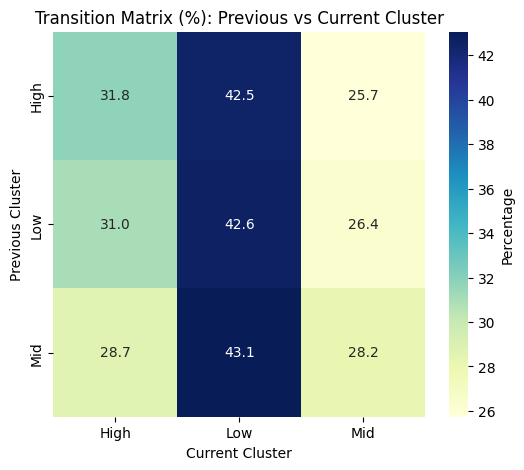

In [661]:
df_sorted['previous_level'] = df_sorted.groupby('agent_code')['performance_level'].shift(1)

# Created the raw transition matrix
transition_matrix = pd.crosstab(df_sorted['previous_level'], df_sorted['performance_level'])

# Normalize by row (previous cluster) to get row-wise percentages
transition_percent = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100

# Plot as heatmap with percentages
plt.figure(figsize=(6, 5))
sns.heatmap(transition_percent, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title("Transition Matrix (%): Previous vs Current Cluster")
plt.xlabel("Current Cluster")
plt.ylabel("Previous Cluster")
plt.show()


<ipython-input-662-449ecd636d26>:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=transition_percent.applymap(lambda v: f"{v:.1f}%"),


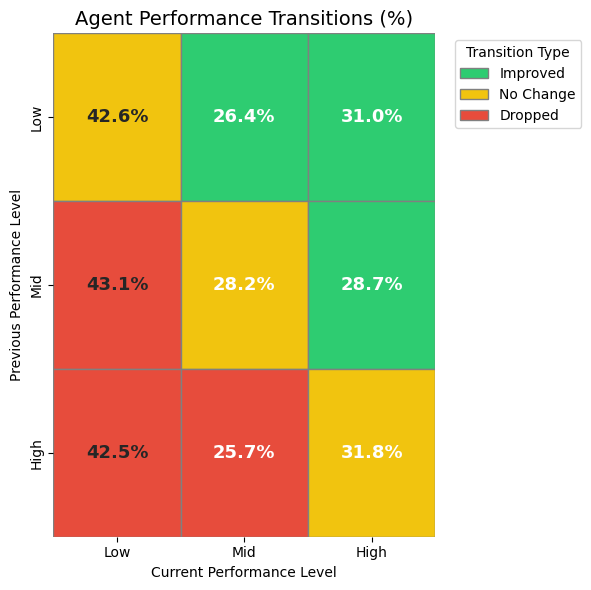

In [662]:
# Step 1: Generate the transition matrix (counts)
transition_matrix = pd.crosstab(df_sorted['previous_level'], df_sorted['performance_level'])

# Step 2: Normalize row-wise to get percentages
transition_percent = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100

# Step 3: Ensure order of levels
order = ['Low', 'Mid', 'High']
transition_percent = transition_percent.reindex(index=order, columns=order)

# Step 4: Build color matrix based on movement direction
level_to_index = {'Low': 0, 'Mid': 1, 'High': 2}
color_matrix = np.zeros_like(transition_percent.values, dtype=int)

for i, row_label in enumerate(order):
    for j, col_label in enumerate(order):
        color_matrix[i, j] = np.sign(level_to_index[col_label] - level_to_index[row_label])

# Step 5: Map direction values to color hex codes
cmap_dict = {-1: "#e74c3c", 0: "#f1c40f", 1: "#2ecc71"}  # red, yellow, green
custom_colors = np.vectorize(cmap_dict.get)(color_matrix)

# Step 6: Plot base heatmap with transparent facecolors
fig, ax = plt.subplots(figsize=(6.5, 6))

sns.heatmap(
    transition_percent,
    annot=transition_percent.applymap(lambda v: f"{v:.1f}%"),
    fmt='',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    xticklabels=order,
    yticklabels=order,
    ax=ax,
    annot_kws={"size": 13, "weight": "bold"},
    mask=np.full_like(transition_percent, False, dtype=bool)
)

# Step 7: Overlay custom color patches
for i in range(color_matrix.shape[0]):
    for j in range(color_matrix.shape[1]):
        rect = plt.Rectangle((j, i), 1, 1, facecolor=cmap_dict[color_matrix[i, j]], edgecolor='gray')
        ax.add_patch(rect)

# Step 8: Add legend
legend_elements = [
    Patch(facecolor="#2ecc71", edgecolor='gray', label='Improved'),
    Patch(facecolor="#f1c40f", edgecolor='gray', label='No Change'),
    Patch(facecolor="#e74c3c", edgecolor='gray', label='Dropped')
]
ax.legend(handles=legend_elements, title='Transition Type', loc='upper right', bbox_to_anchor=(1.4, 1))

# Step 9: Labels and title
ax.set_title("Agent Performance Transitions (%)", fontsize=14)
ax.set_xlabel("Current Performance Level")
ax.set_ylabel("Previous Performance Level")
plt.tight_layout()
plt.show()


### Performance Transition Insights

- A significant proportion of agents who were previously low performers have remained in the low performance category.
- There is also a notable number of agents who transitioned from mid to low performance over time.
- In contrast, only a small fraction of past low performers have improved to reach high performance levels.

These patterns suggest that once agents fall into the low-performing category, it is challenging for them to recover without targeted support or intervention.


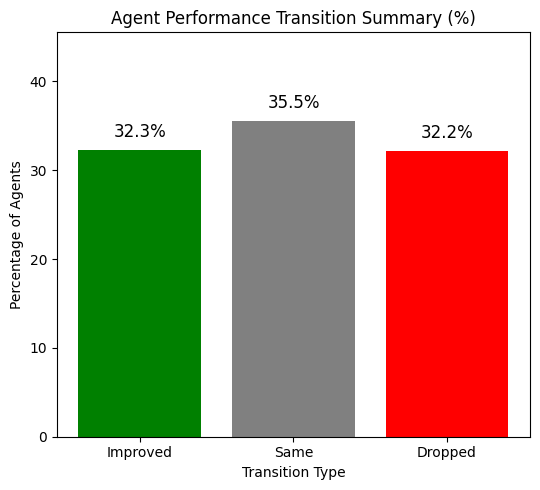

In [663]:
# Define order for performance levels
order = ['Low', 'Mid', 'High']
level_to_index = {'Low': 0, 'Mid': 1, 'High': 2}

# Map levels to index values
df_sorted['previous_index'] = df_sorted['previous_level'].map(level_to_index)
df_sorted['current_index'] = df_sorted['performance_level'].map(level_to_index)

# Compute transition direction: +1 (improve), -1 (drop), 0 (same)
df_sorted['transition_direction'] = df_sorted['current_index'] - df_sorted['previous_index']

# Filter only rows where we have a previous cluster
transitions = df_sorted.dropna(subset=['previous_level'])

# Count transitions
transition_counts = transitions['transition_direction'].value_counts().to_dict()
improved = transition_counts.get(1, 0) + transition_counts.get(2, 0)
same = transition_counts.get(0, 0)
dropped = transition_counts.get(-1, 0) + transition_counts.get(-2, 0)

# Total agents considered
total_agents = improved + same + dropped

# Data for plotting in percentages
transition_summary_pct = {
    'Improved': (improved / total_agents) * 100,
    'Same': (same / total_agents) * 100,
    'Dropped': (dropped / total_agents) * 100
}

plt.figure(figsize=(5.5, 5))
bars = plt.bar(transition_summary_pct.keys(), transition_summary_pct.values(), color=['green', 'gray', 'red'])

# Annotated bars with %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=12)

# Formatting
plt.title("Agent Performance Transition Summary (%)")
plt.ylabel("Percentage of Agents")
plt.xlabel("Transition Type")
plt.ylim(0, max(transition_summary_pct.values()) + 10)
plt.tight_layout()
plt.show()


### Overall Performance Transition Insights

- A significant portion of agents in the overall dataset show no change in their performance level, indicating stability or stagnation in performance.
- The number of agents who have improved is notably smaller than those who have dropped in performance, highlighting that a larger proportion of agents are facing challenges in maintaining or improving their performance.


## Monthly Performance Tracking

In [664]:
# Sort by agent and time
df_sorted = df_sorted.sort_values(by=['agent_code', 'year_month'])

# Create shifted previous cluster column
df_sorted['previous_cluster'] = df_sorted.groupby('agent_code')['performance_cluster'].shift(1)

# Define movement status
def categorize_movement(row):
    if pd.isna(row['previous_cluster']):
        return 'First Month'
    elif row['performance_cluster'] > row['previous_cluster']:
        return 'Improved'
    elif row['performance_cluster'] < row['previous_cluster']:
        return 'Dropped'
    else:
        return 'Same'

df_sorted['movement'] = df_sorted.apply(categorize_movement, axis=1)


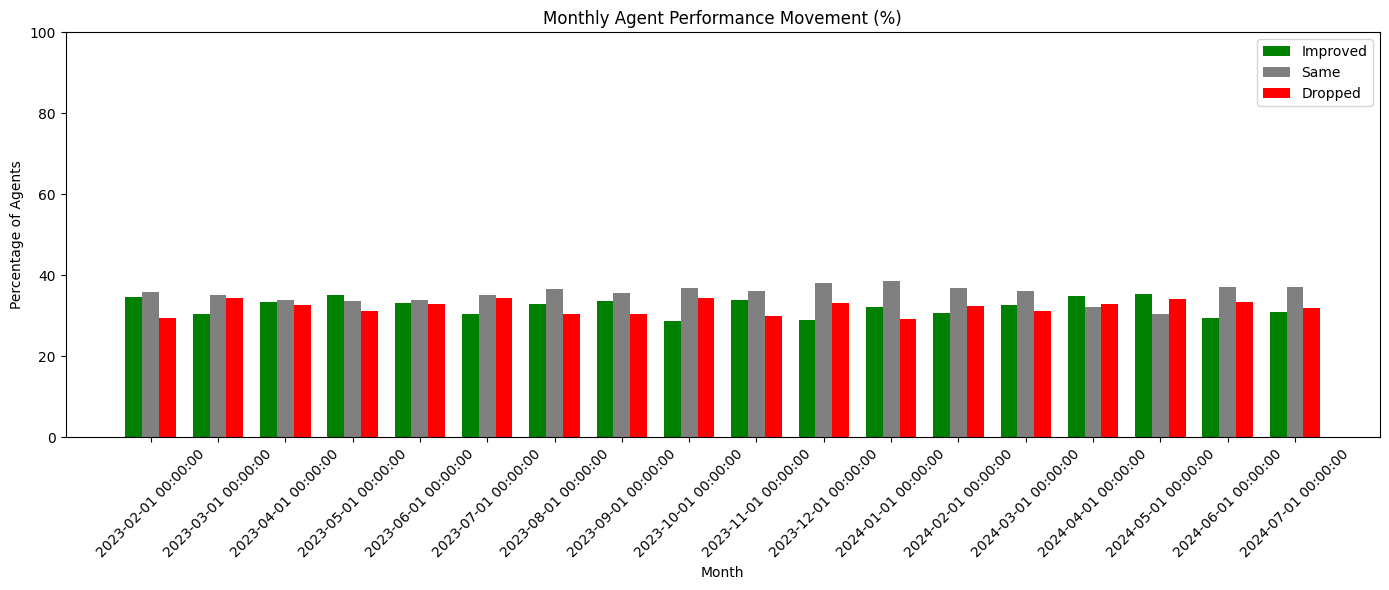

In [665]:
# Group again to ensure consistency
monthly_transitions = df_sorted[df_sorted['movement'] != 'First Month'] \
    .groupby(['year_month', 'movement']) \
    .size().unstack(fill_value=0)

# Sort months
monthly_transitions = monthly_transitions.sort_index()

# Convert counts to percentages row-wise
monthly_transitions_pct = monthly_transitions.div(monthly_transitions.sum(axis=1), axis=0) * 100

# Extract values
months = monthly_transitions_pct.index.tolist()
categories = ['Improved', 'Same', 'Dropped']
values = [monthly_transitions_pct.get(col, pd.Series([0]*len(months))) for col in categories]

# Set positions
x = np.arange(len(months))  # label locations
width = 0.25                # width of the bars

# Create figure and plot
fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, values[0], width, label='Improved', color='green')
bars2 = ax.bar(x, values[1], width, label='Same', color='gray')
bars3 = ax.bar(x + width, values[2], width, label='Dropped', color='red')

# Set labels and formatting
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Agents')
ax.set_title('Monthly Agent Performance Movement (%)')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.set_ylim(0, 100)
ax.legend()

plt.tight_layout()
plt.show()


* Across each month, the majority of agents remained in the same performance level.
* It indicates a **high degree of consistency or lack of movement in performance classifications over time.**


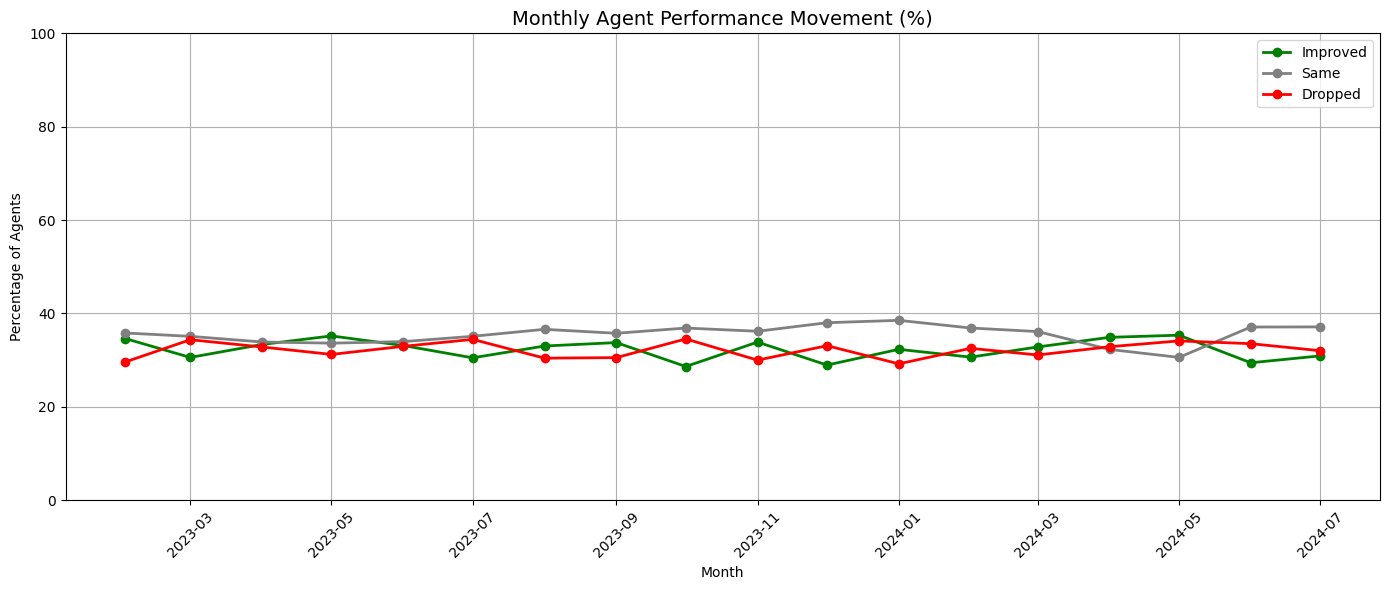

In [666]:
# Group and normalize to get monthly transition percentages
monthly_transitions = df_sorted[df_sorted['movement'] != 'First Month'] \
    .groupby(['year_month', 'movement']) \
    .size().unstack(fill_value=0)

monthly_transitions = monthly_transitions.sort_index()
monthly_transitions_pct = monthly_transitions.div(monthly_transitions.sum(axis=1), axis=0) * 100

# Plot line chart
plt.figure(figsize=(14, 6))

for category, color in zip(['Improved', 'Same', 'Dropped'], ['green', 'gray', 'red']):
    if category in monthly_transitions_pct.columns:
        plt.plot(monthly_transitions_pct.index, monthly_transitions_pct[category],
                 label=category, color=color, linewidth=2, marker='o')

plt.title("Monthly Agent Performance Movement (%)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Percentage of Agents")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-667-d6b926ebd675>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(monthly_counts.index.astype(str), rotation=45)
<ipython-input-667-d6b926ebd675>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(monthly_counts.index.astype(str), rotation=45)


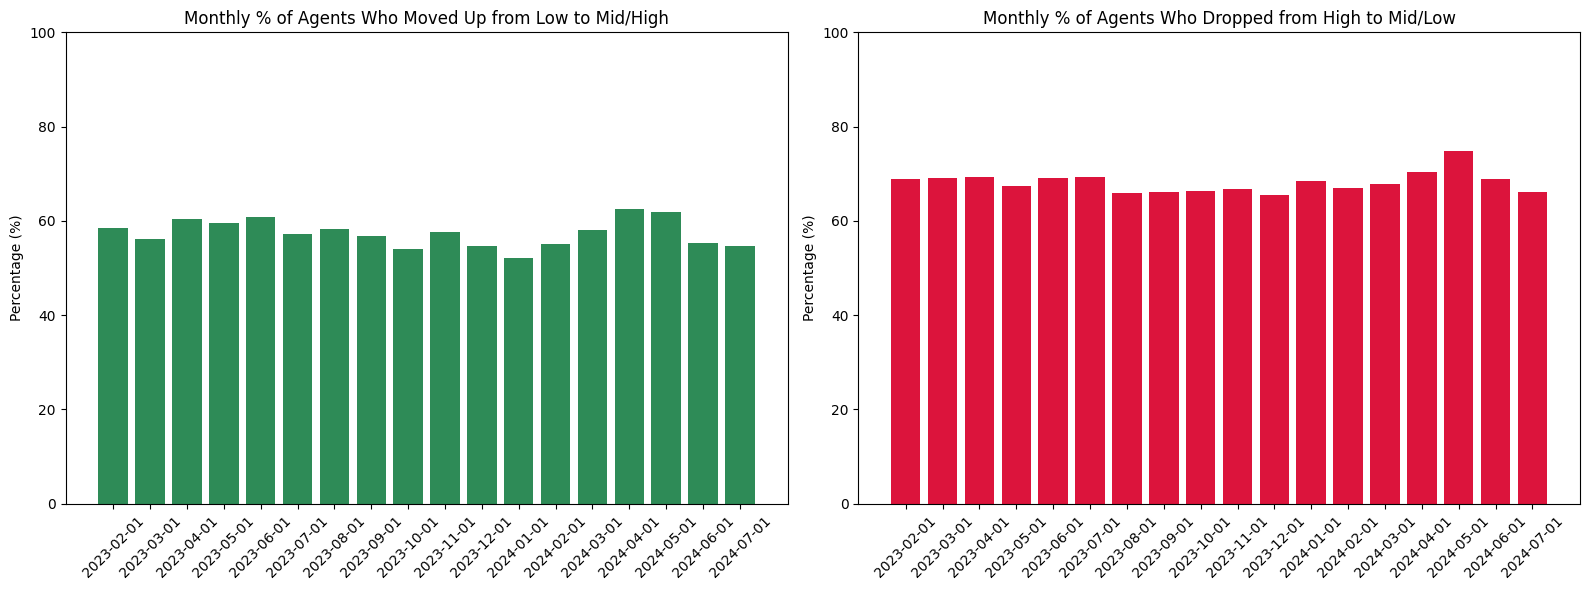

In [667]:
# Filter out 'First Month' entries
movement_data = df_sorted[df_sorted['movement'] != 'First Month']

# Group by month and movement type
monthly_counts = movement_data.groupby(['year_month', 'movement']).size().unstack(fill_value=0)

# Calculate total agents each month
monthly_counts['Total'] = monthly_counts.sum(axis=1)

# Calculate percentage of agents who stayed in the same cluster
monthly_counts['Same_pct'] = (monthly_counts['Same'] / monthly_counts['Total']) * 100

# Filter rows where the previous level was 'Low'
low_prev = df_sorted[df_sorted['previous_level'] == 'Low']

# Among them, find those who moved to Mid or High
low_to_up = low_prev[low_prev['performance_level'].isin(['Mid', 'High'])]

# Count per month
monthly_low_total = low_prev.groupby('year_month')['agent_code'].nunique()
monthly_low_to_up = low_to_up.groupby('year_month')['agent_code'].nunique()

# Compute percentage
monthly_percentage = (monthly_low_to_up / monthly_low_total * 100).fillna(0)
monthly_percentage = monthly_percentage.sort_index()

# Filter rows where the previous level was 'High'
high_prev = df_sorted[df_sorted['previous_level'] == 'High']

# From those, find agents who dropped to Mid or Low
high_to_down = high_prev[high_prev['performance_level'].isin(['Mid', 'Low'])]

# Count per month
monthly_high_total = high_prev.groupby('year_month')['agent_code'].nunique()
monthly_high_to_down = high_to_down.groupby('year_month')['agent_code'].nunique()

# Compute percentage
monthly_high_drop_pct = (monthly_high_to_down / monthly_high_total * 100).fillna(0)
monthly_high_drop_pct = monthly_high_drop_pct.sort_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low → Up (Mid/High)
axes[0].bar(monthly_counts.index.astype(str), monthly_percentage.values, color='seagreen')
axes[0].set_xticklabels(monthly_counts.index.astype(str), rotation=45)
axes[0].set_ylabel('Percentage (%)')
axes[0].set_title('Monthly % of Agents Who Moved Up from Low to Mid/High')
axes[0].set_ylim(0, 100)

# Plot for High → Down (Mid/Low)
axes[1].bar(monthly_counts.index.astype(str), monthly_high_drop_pct.values, color='crimson')
axes[1].set_xticklabels(monthly_counts.index.astype(str), rotation=45)
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Monthly % of Agents Who Dropped from High to Mid/Low')
axes[1].set_ylim(0, 100)

# Layout adjustments
plt.tight_layout()
plt.show()


* For each month, the percentage of agents who experienced a drop in their performance level is consistently higher than the percentage of agents who showed improvement.
* This trend highlights the need for targeted interventions to prevent performance decline.


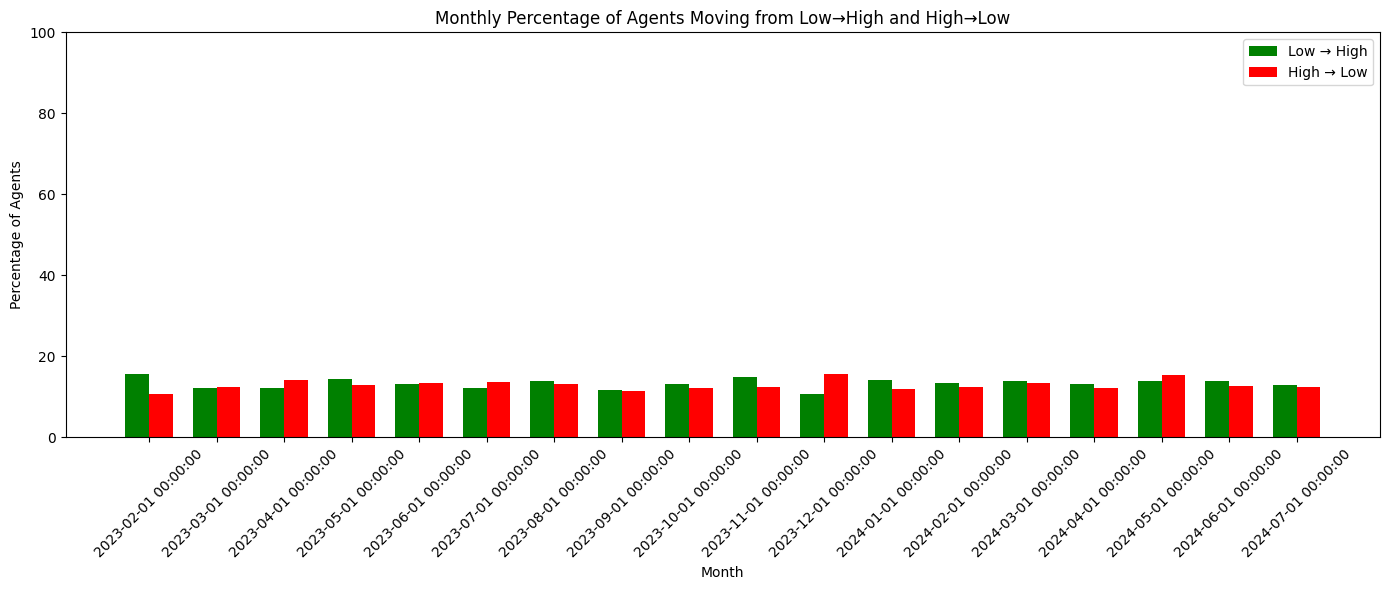

In [668]:
# Filtered out "First Month" entries
df_trans = df_sorted[df_sorted['movement'] != 'First Month'].copy()

# Define level order
order = ['Low', 'Mid', 'High']
level_to_index = {'Low': 0, 'Mid': 1, 'High': 2}

# Convert levels to numeric indices
df_trans['prev_index'] = df_trans['previous_level'].map(level_to_index)
df_trans['curr_index'] = df_trans['performance_level'].map(level_to_index)

# Calculate movement direction
df_trans['level_shift'] = df_trans['curr_index'] - df_trans['prev_index']

# Add a "shift_type" label
df_trans['shift_type'] = df_trans.apply(
    lambda row: 'Low→High' if row['previous_level'] == 'Low' and row['performance_level'] == 'High'
    else ('High→Low' if row['previous_level'] == 'High' and row['performance_level'] == 'Low' else None),
    axis=1
)

# Group by month and shift type
shift_counts = df_trans[df_trans['shift_type'].notnull()] \
    .groupby(['year_month', 'shift_type']) \
    .size().unstack(fill_value=0)

# Compute total transitions per month
monthly_totals = df_trans.groupby('year_month').size()

# Calculate percentage
shift_pct = (shift_counts.T / monthly_totals).T * 100

# Ensure all months are present
all_months = sorted(df_trans['year_month'].unique())
low_to_high = shift_pct.get('Low→High', pd.Series([0]*len(all_months), index=all_months))
high_to_low = shift_pct.get('High→Low', pd.Series([0]*len(all_months), index=all_months))

# Bar chart positions
x = np.arange(len(all_months))
width = 0.35

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, low_to_high.values, width, label='Low → High', color='green')
plt.bar(x + width/2, high_to_low.values, width, label='High → Low', color='red')

plt.xticks(x, all_months, rotation=45)
plt.ylabel("Percentage of Agents")
plt.xlabel("Month")
plt.title("Monthly Percentage of Agents Moving from Low→High and High→Low")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()


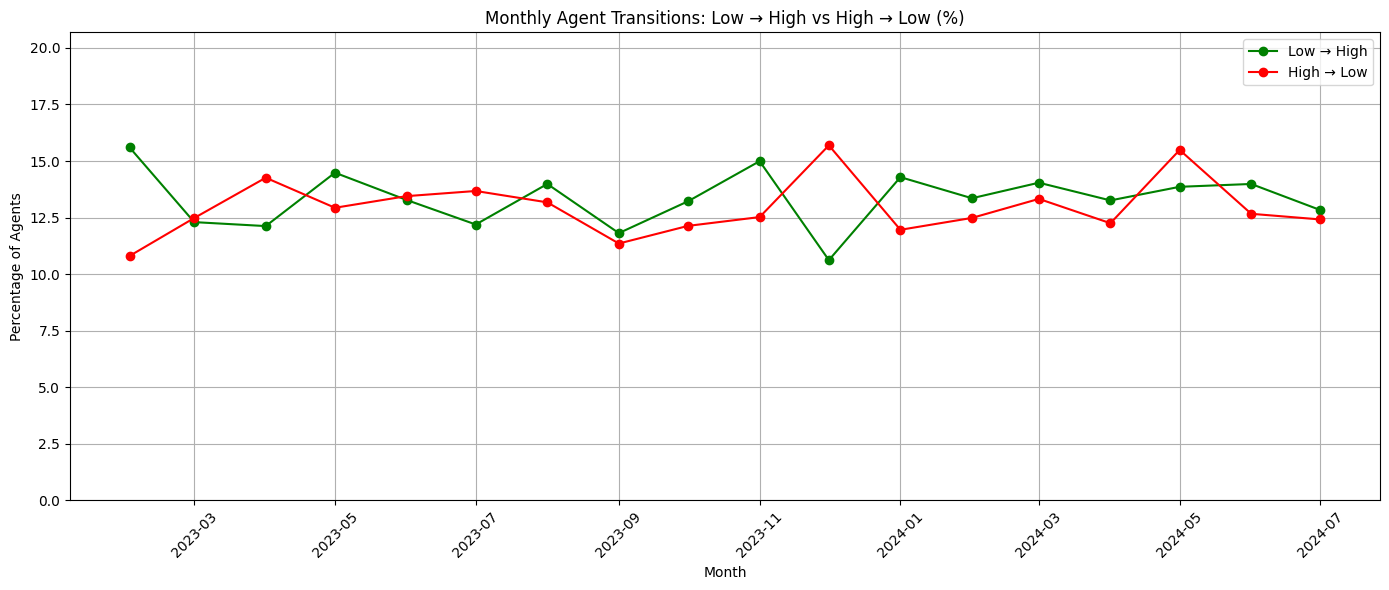

In [669]:
# Ensure all months are sorted
all_months = sorted(df_trans['year_month'].unique())

# Use same shift_pct as before
low_to_high = shift_pct.get('Low→High', pd.Series([0]*len(all_months), index=all_months))
high_to_low = shift_pct.get('High→Low', pd.Series([0]*len(all_months), index=all_months))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(all_months, low_to_high.values, marker='o', color='green', label='Low → High')
plt.plot(all_months, high_to_low.values, marker='o', color='red', label='High → Low')

plt.xticks(rotation=45)
plt.ylabel("Percentage of Agents")
plt.xlabel("Month")
plt.title("Monthly Agent Transitions: Low → High vs High → Low (%)")
plt.ylim(0, max(low_to_high.max(), high_to_low.max()) + 5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Performance Transition Highlights

* A common pattern observed in many agents’ first active months is a transition from high to low performance levels.
* Notably, in December 2023, there was a significant drop in performance from high to low.
* However, this trend reversed as the new year began—transitioning from December 2023 to January 2024, a considerable number of agents showed a marked improvement, moving from low to high performance levels.


**Analysis of agents who stayed in the same performance level**

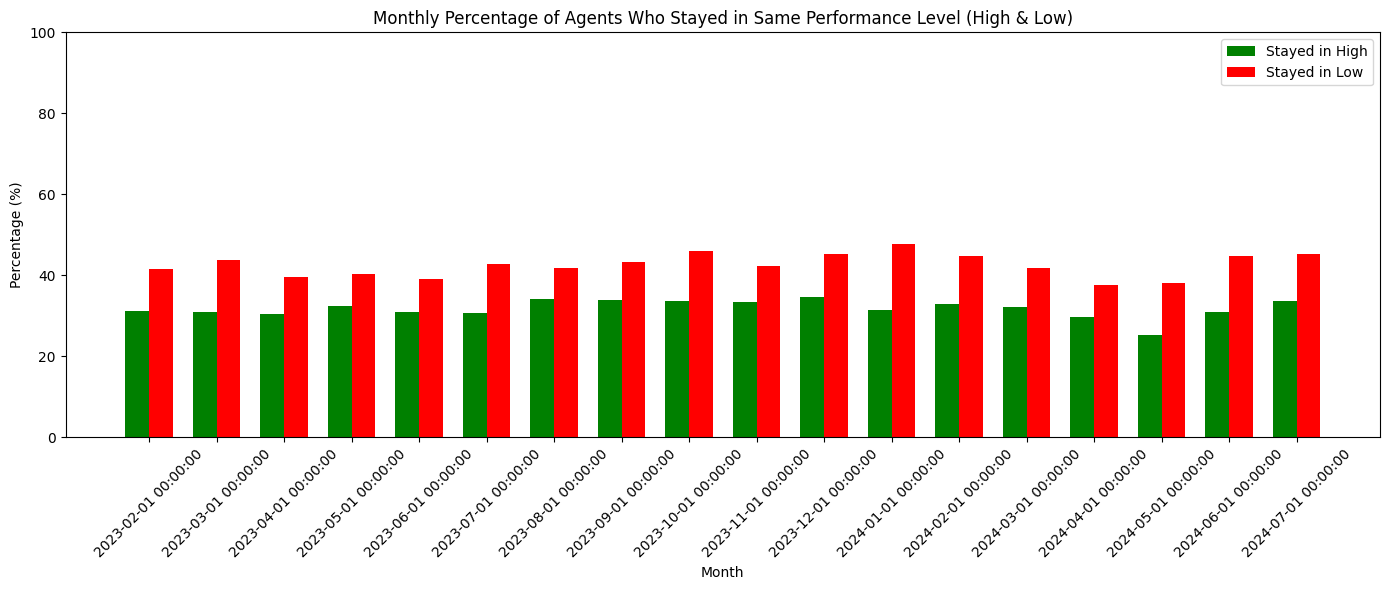

In [670]:
# Filter for agents who stayed in High
same_high = df_sorted[
    (df_sorted['previous_level'] == 'High') &
    (df_sorted['performance_level'] == 'High')
]
total_prev_high = df_sorted[df_sorted['previous_level'] == 'High']

# Filter for agents who stayed in Low
same_low = df_sorted[
    (df_sorted['previous_level'] == 'Low') &
    (df_sorted['performance_level'] == 'Low')
]
total_prev_low = df_sorted[df_sorted['previous_level'] == 'Low']

# Group and compute percentages
same_high_pct = (same_high.groupby('year_month').size() / total_prev_high.groupby('year_month').size()) * 100
same_low_pct = (same_low.groupby('year_month').size() / total_prev_low.groupby('year_month').size()) * 100

# Filled missing with 0
same_high_pct = same_high_pct.fillna(0).sort_index()
same_low_pct = same_low_pct.fillna(0).sort_index()

# Align both series to same x-axis
all_months = sorted(set(same_high_pct.index).union(set(same_low_pct.index)))
high_vals = [same_high_pct.get(month, 0) for month in all_months]
low_vals = [same_low_pct.get(month, 0) for month in all_months]

# X locations
x = np.arange(len(all_months))
width = 0.35

# Plot
plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width/2, high_vals, width, label='Stayed in High', color='green')
bars2 = plt.bar(x + width/2, low_vals, width, label='Stayed in Low', color='red')

plt.xticks(x, all_months, rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Month")
plt.title("Monthly Percentage of Agents Who Stayed in Same Performance Level (High & Low)")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()


### Monthly Retention in Performance Levels

* For each month, the percentage of agents who remained in the **low** performance level is consistently higher than the percentage of agents who stayed in the **high** performance level.
* This suggests a stronger persistence among low-performing agents compared to those performing at a high level, indicating a potential need for targeted interventions to uplift and transition them to higher performance tiers.


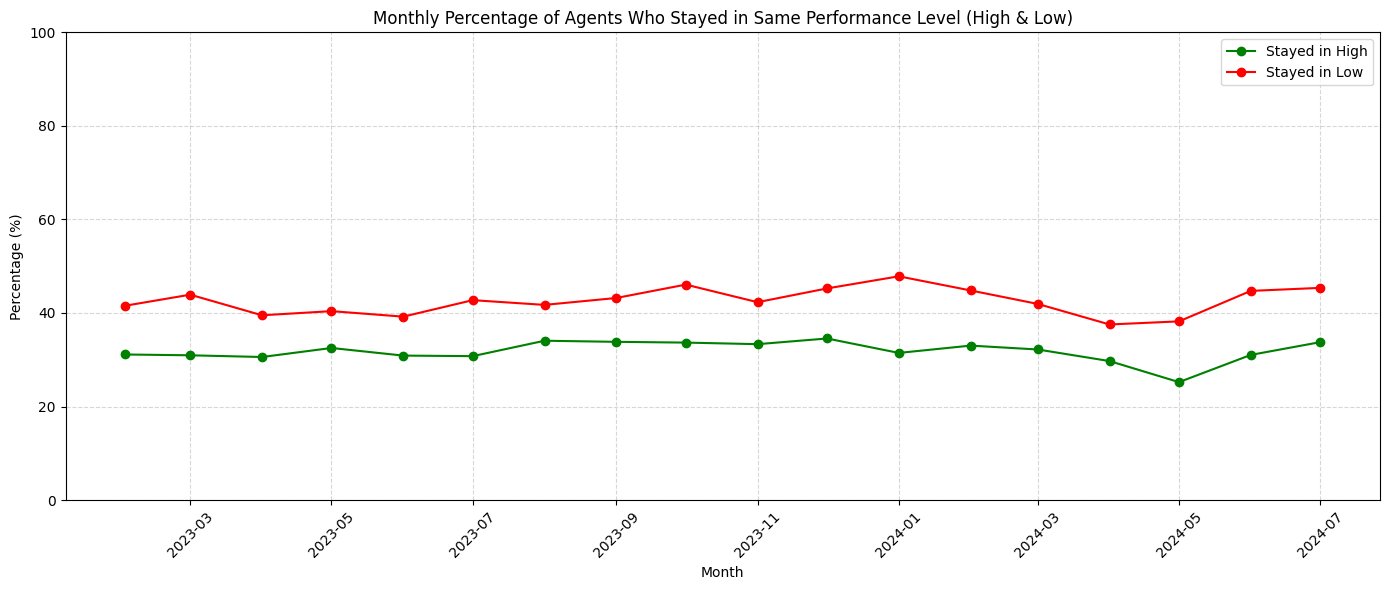

In [671]:
# Plot line graph
plt.figure(figsize=(14, 6))

plt.plot(all_months, high_vals, marker='o', color='green', label='Stayed in High')
plt.plot(all_months, low_vals, marker='o', color='red', label='Stayed in Low')

plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Month")
plt.title("Monthly Percentage of Agents Who Stayed in Same Performance Level (High & Low)")
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Calculating the average duration an agent stays in each performance level

Average Duration per Performance Level (in months):
performance_level
High    1.161517
Low     1.158585
Mid     1.160042
Name: duration_in_months, dtype: float64


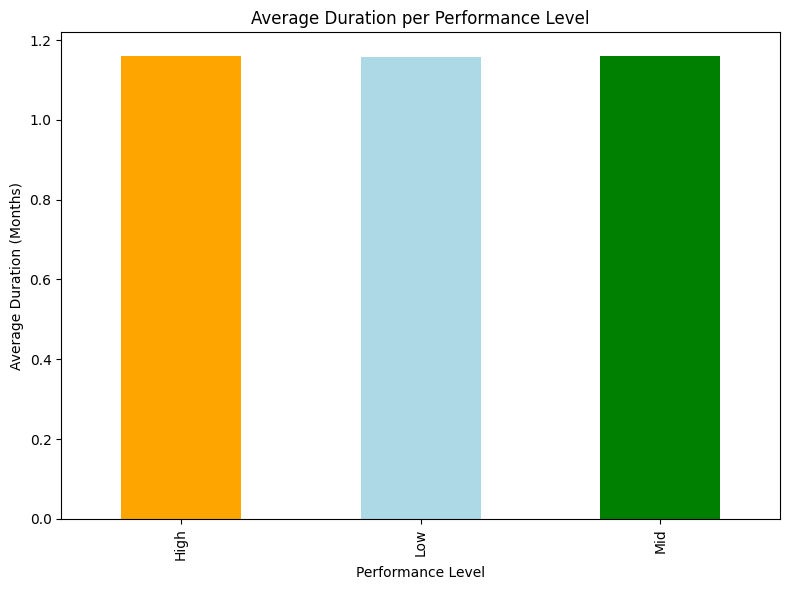

In [672]:
# Calculated the time difference between consecutive months for each agent
df_sorted['next_month'] = df_sorted.groupby('agent_code')['year_month'].shift(-1)
df_sorted['duration_in_months'] = (df_sorted['next_month'] - df_sorted['year_month']).dt.days / 30  # convert days to months

# Filter out rows with no transition (e.g., the last month for each agent)
df_sorted = df_sorted.dropna(subset=['duration_in_months'])

# Calculate the average duration for each performance level
avg_duration_per_level = df_sorted.groupby('performance_level')['duration_in_months'].mean()

# Display the result
print("Average Duration per Performance Level (in months):")
print(avg_duration_per_level)

# Plotting the average duration for each performance level
plt.figure(figsize=(8, 6))
avg_duration_per_level.plot(kind='bar', color=['orange', 'lightblue', 'green'])

# Adding labels and title
plt.xlabel('Performance Level')
plt.ylabel('Average Duration (Months)')
plt.title('Average Duration per Performance Level')

# Display the plot
plt.tight_layout()
plt.show()

* On average, each agent has spent approximately **one month** in each performance level.
* However, agents in the **low** performance category have tended to remain there for a **longer duration** compared to those in the **mid** and **high** performance levels.
* This indicates a need for more effective support strategies to help low-performing agents transition to higher levels.


### Calculating the most common performance level for newly joined agents

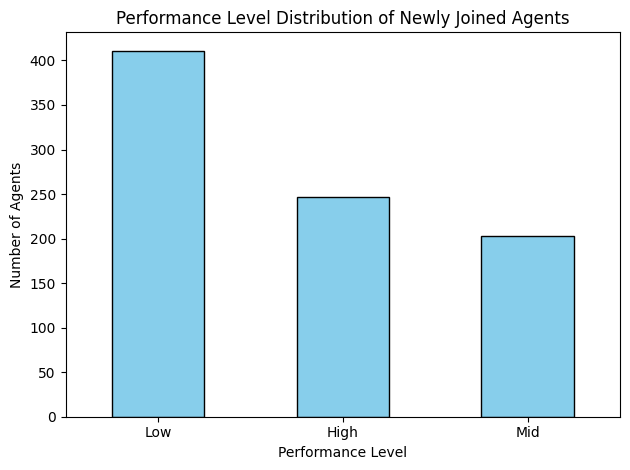

In [673]:
# Filter only newly joined agents
new_agents = df_sorted[df_sorted['movement'] == 'First Month']

# Count the occurrences of each performance level
performance_counts = new_agents['performance_level'].value_counts()

# Display the most common performance level
most_common_level = performance_counts.idxmax()
count = performance_counts.max()

performance_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Performance Level Distribution of Newly Joined Agents')
plt.xlabel('Performance Level')
plt.ylabel('Number of Agents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Initial Performance Level of Newly Joined Agents

* The most common performance level among **newly joined agents** is the **low** category.
* This suggests that most agents begin their performance journey at a lower tier, emphasizing the importance of early-stage training and onboarding programs to accelerate their progression.


## Custom Intervention Strategies for Each Performance Category

Based on the analysis, here are **custom intervention strategies** for each performance category, aligned with the insights we discovered:

---

### 🔴 **Low Performers**

**Insights:**

- Most new agents begin here.
- Highest percentage of agents remain in this level.
- Longest average duration spent in this level.
- Significant number transition from mid to low and from high to low.

**Recommended Interventions:**

- **Structured Onboarding:** Implement targeted training in the first month focusing on core KPIs.
- **Mentorship Program:** Pair new and low-performing agents with high performers.
- **KPI-based Coaching:** Use individual KPI metrics (like low `new_policy_count`, `net_income`) to deliver personalized coaching.
- **Incentives for Improvement:** Set up small, progressive goals with incentives to motivate upward movement.
- **Regular Feedback:** Weekly performance check-ins to keep agents aligned and accountable.

---

### ⚪ **Mid Performers**

**Insights:**

- Often transition down to low.
- Better at handling customer base metrics (e.g., `unique_customers`, `number_of_policy_holders`).
- Less likely to improve to high.

**Recommended Interventions:**

- **Skill Bridging:** Focused workshops to convert strong customer management into sales or revenue performance.
- **Peer Learning:** Learning sessions with high performers to understand high-level strategies.
- **Performance Review:** Use dashboards to identify stagnation early and apply timely nudges.
- **Recognition Programs:** Motivate and retain mid-performers by rewarding consistency and incremental improvements.

---

### 🟢 **High Performers**

**Insights:**

- Frequently drop to mid or low.
- Rare for low performers to reach this level.
- Strong in high-value KPIs like `ANBP`, `net_income`.

**Recommended Interventions:**

- **Sustainment Strategy:** Offer advanced skill training and leadership grooming to keep them challenged.
- **Performance Monitoring:** Closely monitor for early signs of decline and intervene quickly.
- **Retention Plan:** Provide career growth paths, bonuses, or role enhancements to maintain motivation.
- **Share Best Practices:** Encourage knowledge sharing to lift other performance levels.

---
